# How Have Economic Growth and Urbanization Affected Housing Prices in California? 

<u> INTRODUCTION <u>

California is known to have one of the most expensive beautiful and expensive lands with a lavish lifestyle. One of the most notorious characteristics it has is its houses, as the coastal line borders, weather conditions, and job opportunity to have one of the most demanded and expensive housing markets. Over the past half-century, the state has provided diverse forms of incentives and opportunities for individuals to reallocate to California, especially individuals with substantially high income and/or wealth$^1$. This has resulted in the state becoming a global economic powerhouse if California would become a sovereign nation, it would be the 5th largest economy in the world$^2$ which highlights the resources and power it holds. However, most of the production and economic growth in California’s economy stems from a few areas in the state that has the resources and capacity to take on such large scales of production. These areas are usually denoted as the urban counties within California. 

Be as it may, urban counties' resources and land have limited California production growth, as there are only a few counties with the capacity to produce such capacity. Hence, to continue the economic progress in the state, the governing state of California first introduced its intentions in promoting urbanization across California in a 1973 policy report, and later first introduced its first actions into urbanization in its proposed budget report in 1978$^3$.  The state provided positive steps to transform some rural counties into urban counties and revitalize urban counties and suburbs. Due to its high standard of living and a housing market with high demand. A study conducted that analyzes a similar topic investigated the situation of urbanization and urban housing growth since the mid-1990s in China where they calculated a new measurement for levels of urbanization in each province in the country, by taking unique characteristics of China’s urban and rural compositions into account$^4$. The research results suggested that there still exist high urbanization levels and have pushed for commodity housing prices in urban areas. This has benefited urbanized provinces while existing urban provinces have incurred a cost as their housing market has experienced a rapid increase in prices$^4$. According to York University, an urban area consists of “densely-settled places, built-up settlements with bricks-and-mortar continuity”$^5$ as well as other factors. This implies that urban areas consist of housing conditions and are heavily influenced by the housing market, which raises the question, how have economic growth and urbanization affected housing prices in California? This paper will argue the effects of economic growth through urbanization and California states policies on housing prices.

The findings of this paper will contribute to the arguments from Inclusionary zoning in the housing market in California research where they found that zoning that family house prices increased throughout the state while sizes of family decreased from 1988 to 2005 $^6$. The papr also found that in cities adopted inclusionary zoning more slowly as family sizes did not have a significant change but the starting housing prices for multifamily houses did increase as the results are consistent with economic theories and the policy comes at a cost. Upon the findings of the effects of urbanization in the housing market in China urban and the California state stimulating urban growth in rural counties, this paper will find the effects of a more specific inclusionary zoning policies in each California county and how these policies have affected the housing market in the state.

This project uses the data set of California median house prices derived from the 1990 census, sourced by Kaggle which was extracted from the second chapter of the book 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by  Aurélien Géron $^7$. The data groups the houses by blocks and then calculates different variables from each block that are believed to be factors that affect the value of a house. The dataset includes the location of each block (latitude, longitude, and ocean proximity), housing median age, total rooms and bedrooms, population, number of houses in each block, as well as median income (in tens of thousands) and median house value in the block. We will evaluate the change in housing quality and economic activity in Califonia. These are primary data used by planners to understand the economic and demographic conditions from the housing prices in California and how different factors and shifts in variables that are not directly involved in the house quality can still affect the value of housing. 

In [5]:
import numpy as np
import pandas as pd
import math
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import os
from shapely.geometry import Point

In [524]:
path = os.getcwd() + '/Data/housing.csv'
housing = pd.read_csv(path)
housing.index.name = "Block Index"

actual_income = (pd.DataFrame(housing.median_income.mul(10000))).rename(columns = {'median_income': 'actual_median_income'})
housing = pd.concat([housing, actual_income], axis=1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,actual_median_income
Block Index,,,,,,,,,,,
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,83252.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,83014.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,72574.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,56431.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,38462.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,15603.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,25568.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,17000.0


The dataset was imported to the program, had python read it, and converted the dataset into a data frame. We've also set the index to block index since the dataset is separated into blocks. Since income is in tens of thousand, we added a new column called actual_median_income to show the actual value of median income per block and concatenated the actual_median_income to the data frame in which we called housing. The columns actual_median_income and median_income have the same values, the difference is that median_income is in ten of thousands while actual median income is median income multiplied by 10,000 to show the actual value of income. To avoid confusion, Median Age is in years and median_income, actual_media_income, and median_house_value columns are all in terms of United States Dollars (USD). The index is called Block index as a source to locate a specific block we might want to extract or analyze. We should note that the data frame has 20640 rows and 11 rows, which means there is a total of 206400 data elements (since the first row is just the index, we don't count it as a data element), so to make the data frame more easily readable, we are going to segregate the data frame into the columns that we are going to focus on. 

In [430]:
display(housing.isnull().any(axis=0))

longitude               False
latitude                False
housing_median_age      False
total_rooms             False
total_bedrooms           True
population              False
households              False
median_income           False
median_house_value      False
ocean_proximity         False
actual_median_income    False
dtype: bool

Above we are checking if any columns from the housing data frame have any empty/null cells. Since our project is currently focused on the columns population, housing median age, actual_median income, median income, and  median_housing prices, the only column that has any missing data is total_bedroom we don't have to fill in those missing cells from the total_bedroom column. 

In [525]:
pai = housing[['housing_median_age', 'population', 'actual_median_income', 'households', 'median_house_value']]
housing_pai = pai.rename(columns = {'housing_median_age': 'Median Age',
                                               'population': 'Population',
                                               'actual_median_income': 'Median Income',
                                   'households': 'Households',
                                   'median_house_value': 'Median House Value'})
display(housing_pai)
display(housing_pai.dtypes)

,Median Age,Population,Median Income,Households,Median House Value
Block Index,,,,,
0,41.0,322.0,83252.0,126.0,452600.0
1,21.0,2401.0,83014.0,1138.0,358500.0
2,52.0,496.0,72574.0,177.0,352100.0
3,52.0,558.0,56431.0,219.0,341300.0
4,52.0,565.0,38462.0,259.0,342200.0
...,...,...,...,...,...
20635,25.0,845.0,15603.0,330.0,78100.0
20636,18.0,356.0,25568.0,114.0,77100.0
20637,17.0,1007.0,17000.0,433.0,92300.0


Median Age            float64
Population            float64
Median Income         float64
Households            float64
Median House Value    float64
dtype: object

We created a new data frame called housing_pai which stands for housing population, age and income since they are the variables that will be assesed. The column actual_median_income was selected to represent median income instead of median_income column, this is because eventhough they give the same numerical values once you adjust them, the actual_median_column will be easier to interpret since it gives the real numerical value and we do not have to convert the values. The column names have also been renamed by removing the underscore character to make it look better and easier to reference to the data frame. We also checked for the types of elements that are in each column, and all of the variables in housing_pai are floats, which means that we dont need to change any column to a different type to be able to compare and asses them.

<u> STATISTICAL SUMMARY <u>

In [526]:
summary = housing_pai.describe()
lst = []
for i in list(housing_pai.keys()):
    lst.append(housing_pai[i].mode().iat[0])
mode = pd.DataFrame(lst)
variables = list(housing_pai.keys())
mode.index = variables
mode.rename(columns= {0: 'Mode'}, inplace=True)
mode = mode.transpose()

stat_summ = pd.concat([mode, summary])
stat_summ

,Median Age,Population,Median Income,Households,Median House Value
Mode,52.000000,891.000000,31250.000000,306.000000,500001.000000
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,38706.710029,499.539680,206855.816909
std,12.585558,1132.462122,18998.217179,382.329753,115395.615874
min,1.000000,3.000000,4999.000000,1.000000,14999.000000
25%,18.000000,787.000000,25634.000000,280.000000,119600.000000
50%,29.000000,1166.000000,35348.000000,409.000000,179700.000000
75%,37.000000,1725.000000,47432.500000,605.000000,264725.000000
max,52.000000,35682.000000,150001.000000,6082.000000,500001.000000


Above is displayed the statistical summary of each column. This is based on the data frame housing_pai since it reduces focuses on the columns/variables of interest. Since the describe function does not include mode, we had to separately calculate the mode and then we attached the mode into the describe function of the data frame housing_pai to create a new data frame called stat_summ that includes all relevant and necessary statistical summary of the variables at focus. Displayed on the data frame are for each column/variable: the number of blocks (called count), mean, standard deviation, median, mode, minimum and maximum values, and percentiles values every 25 percentile.

In [527]:
gb_mhv = housing_pai.groupby(pd.Grouper(key= 'Median House Value'))
count = list(gb_mhv['Households'].count())
gb_mean = gb_mhv.mean()
count = list(gb_mhv['Households'].count())
gb_mean.insert(0, 'Count', count) 
gb_mean = (gb_mean.reset_index()).sort_values('Median House Value')
display(gb_mean)

,Median House Value,Count,Median Age,Population,Median Income,Households
1558,14999.0,4,30.750000,305.25000,21224.750000,108.750000
2537,17500.0,1,39.000000,259.00000,23667.000000,138.000000
1265,22500.0,4,36.250000,2112.00000,18180.750000,482.500000
1609,25000.0,1,21.000000,64.00000,8571.000000,27.000000
1678,26600.0,1,34.000000,808.00000,23013.000000,294.000000
...,...,...,...,...,...,...
3735,498800.0,1,29.000000,826.00000,82480.000000,275.000000
1168,499000.0,1,18.000000,1634.00000,81489.000000,734.000000
3280,499100.0,1,28.000000,617.00000,67861.000000,274.000000
2244,500000.0,27,38.000000,1036.00000,38995.814815,496.481481


Here we grouped the blocks by Median House Value, which means that blocks with the same median income value would be grouped together. We then counted the number of block accounted for each Median House Value, and calculated the mean of; median age, population, households and median income. This will help us condense our dataset into more relevant dataframes and easier to analyze, as well as it will allow us to plot graphs with higher focus on the relations of our variables with the Median Hosuing prices.

<u> WHY THE DATASET MUST BE SUMMARIZED <u>

However, the data frame is yet too large as if we'd plot a scatter plot for a single variable relationship with Median House Value, we'd see that the graph would be too ambiguous. For example, below we plotted a scatter plot with the relation Median Income to Median House Value using the gb_mean data frame. As we can see we can suggest there is some sort of positive relationship between both variables. However, the plot expands very widely and has too many plots to be able to state that there is a positive relation, making the graph is too ambiguous to bring actual conclusions to the findings in this plot. This means to be able to assess the relations of the variables to the Median House Value, we would have to summarize and group by even further to be able to graph a more reliable and accurate graph. 

As we can see, the red line indicated the predicted values for this data. We notice that there is a signfiicant distance between the red line and the dotted points which indicate there is a lot of error. This further evidence of how the scatter plot is yet still too ambigous

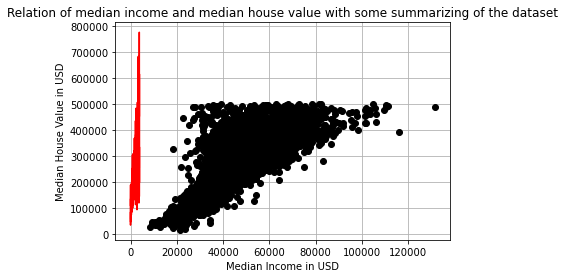

In [716]:
X = gb_mean['Median Income']
Y = gb_mean['Median House Value']

results = sm.OLS(Y,sm.add_constant(X)).fit()
pred = results.predict()

plt.plot(gb_mean['Median Income'], gb_mean['Median House Value'], 'o', color= 'black')
plt.plot(pred, '-', color= 'red')
plt.title('Relation of median income and median house value with some summarizing of the dataset')
plt.ylabel('Median House Value in USD')
plt.xlabel('Median Income in USD')
plt.grid()

<u> GROUPING AND SUMMARIZING DATA <u>

In [534]:
grouped_mean_count = housing_pai.groupby(pd.cut(housing_pai['Median House Value'], np.arange(14998.9, 1.0+500001.0, 10000.0))).sum()
display(grouped_mean_count.head())

,Median Age,Population,Median Income,Households,Median House Value
Median House Value,,,,,
"(14998.9, 24998.9]",307.0,9928.0,181289.0,2503.0,167496.0
"(24998.9, 34998.9]",435.0,20119.0,309059.0,5633.0,493600.0
"(34998.9, 44998.9]",2111.0,77429.0,1170517.0,22386.0,2839900.0
"(44998.9, 54998.9]",9069.0,358816.0,5348125.0,107254.0,15427500.0
"(54998.9, 64998.9]",16174.0,641123.0,10934602.0,202963.0,32910200.0


To further summarize and collect the data in the data set, we grouped the data frame by Median House Value, and by collecting Median House Values into unique rows, we were then able to solve the issue of having too many rows in the data frame and having plots that would be too ambiguous to interpret. The data frame was named grouped_mean_count. We collected the data frame and sorted them by the range of median house, with a range of $10000 per row. This reduces the rows to 48 entries/ rows of the data frame. However, by combining rows into ranges, their values in each column variable have been summed up. So we need to calculate the average between each range for each variable.

In [529]:
gb_mean_count = gb_mean.groupby(pd.cut(gb_mean['Median House Value'], np.arange(14998.9, 1.0+500001.0, 10000.0))).sum()
range_count = pd.DataFrame(gb_mean_count['Count'])

Here we counted the number of times every Median House Value is founded in the original Dataframe, and then created a seperate Dataframe called range_count were we stored the count. 

In [717]:
range_summ = pd.concat([grouped_mean_count, range_count], axis=1)
range_summ = range_summ.drop('Median House Value', axis=1)
ranges = range_summ.reset_index()
for index in ranges.index:
    row = ranges.iloc[[index]]
    n = float(row['Count'])
    avg_age = float(row['Median Age']) / n
    tot_age = float(ranges.iloc[[index]]['Median Age'])
    ranges.loc[ranges['Median Age']== tot_age, 'Median Age'] = avg_age 
    avg_popu = float(row['Population']) / n
    tot_popu = float(ranges.iloc[[index]]['Population'])
    ranges.loc[ranges['Population']== tot_popu, 'Population'] = avg_popu 
    avg_inc = float(row['Median Income']) / n
    tot_inc = float(ranges.iloc[[index]]['Median Income'])
    ranges.loc[ranges['Median Income']== tot_inc, 'Median Income'] = avg_inc 
    avg_hou = float(row['Households']) / n
    tot_hou = float(ranges.iloc[[index]]['Households'])
    ranges.loc[ranges['Households']== tot_hou, 'Households'] = avg_hou 
ranges.rename(columns={'Count': 'Total Blocks'}, inplace=True)
ranges.index.name = 'ID'
display(ranges.head(5))

,Median House Value,Median Age,Population,Median Income,Households,Total Blocks
ID,,,,,,
0,"(14998.9, 24998.9]",34.111111,1103.111111,20143.222222,278.111111,9
1,"(24998.9, 34998.9]",27.187500,1257.437500,19316.187500,352.062500,16
2,"(34998.9, 44998.9]",31.044118,1138.661765,17213.485294,329.205882,68
3,"(44998.9, 54998.9]",29.930693,1184.211221,17650.577558,353.973597,303
4,"(54998.9, 64998.9]",29.353902,1163.562613,19845.012704,368.353902,551


We then calculated the average of each variable (median age and income, households, and population) and replaced the values with the data frame. This new data frame called ranges is the result from concat(concatenating) the data frames grouped_mean_count and range_count. However, we then replaced the values of grouped_mean_count by dividing all their values by the range_count value in the same row/ value range. This resulted in the mean for all variables in the median housing range. Ranges also include the total blocks that are in the range of house values.

<u> SCATTER PLOTS AND LINE GRAPH TO SHOW RELATIONSHIP BETWEEN HOUSE VALUE AND DIFFERENT VARIABLES <u>

array([34.11111111, 27.1875    , 31.04411765, 29.93069307, 29.353902  ,
       29.16951567, 27.68067227, 27.98893805, 28.29368932, 27.86407767,
       26.37276479, 26.42091153, 26.30462863, 27.15338164, 27.87174721,
       27.88121212, 28.26474128, 27.95365854, 28.02065404, 28.31348511,
       28.31948882, 29.01157742, 28.78880866, 28.96976242, 28.51543943,
       28.63919822, 27.63840399, 27.34730539, 27.95708155, 28.66079295,
       30.01315789, 30.26335878, 29.31178707, 31.02068966, 30.3019802 ,
       31.28571429, 30.31788079, 29.21428571, 32.30833333, 33.46846847,
       32.13978495, 31.82978723, 32.9       , 30.08080808, 33.49180328,
       34.52830189, 29.90566038, 35.3255814 ])

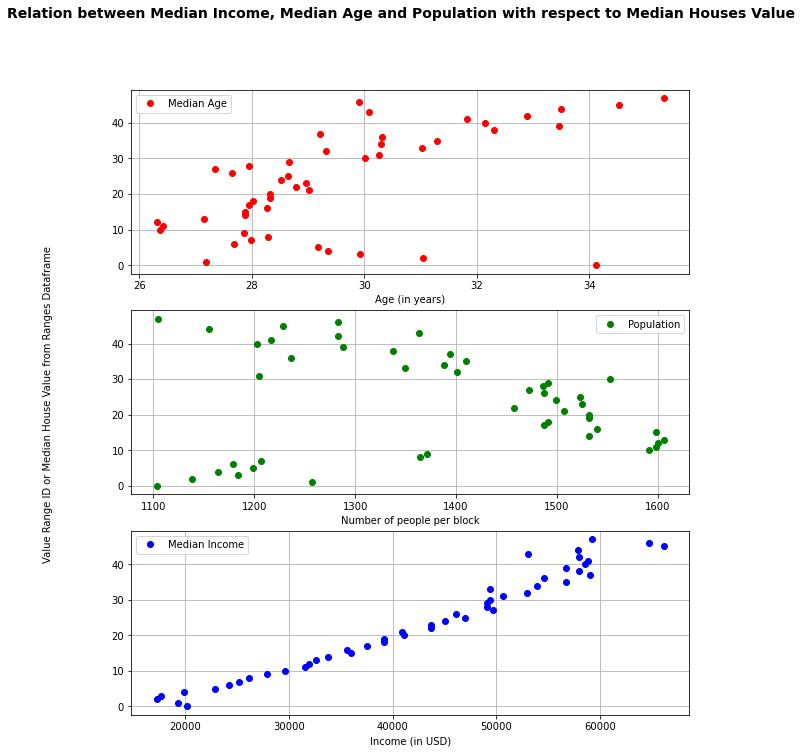

In [731]:
figure, axs = plt.subplots(3, figsize=(10,11.5), sharey= True)
figure.suptitle('Relation between Median Income, Median Age and Population with respect to Median Houses Value', fontsize= 14, fontweight= 'bold')
figure.text(0.01, 0.5, 'Value Range ID or Median House Value from Ranges Dataframe', ha='center', va='center', rotation='vertical')


axs[0].plot(ranges['Median Age'], ranges.index, 'o', color= 'red', label= 'Median Age')
axs[0].grid()
axs[0].legend()
axs[0].set_xlabel('Age (in years)')


axs[1].plot(ranges['Population'], ranges.index, 'o', color= 'g', label= 'Population')
axs[1].grid()
axs[1].set_xlabel('Number of people per block')
axs[1].legend()

axs[2].plot(ranges['Median Income'], ranges.index, 'o', color= 'b', label= 'Median Income' )
axs[2].set_xlabel('Income (in USD)')
axs[2].grid()
axs[2].legend()

import warnings
warnings.filterwarnings('ignore')
figure.show()

Above are three scatterplots, which represent each variable that we are focusing on in this project (median age, median income, and population) and see if there is any correlation between each variable with Median House Value. We used the ID of the intervals on the y-axis to be more clear in our graph, where all three graphs share the same y-axis. Although the IDs don't show the exact range of House Value, we can find the ID of any plot and then find the exact values and the intervals in the ranges data frame. Plus, since the graphs are ranges data frame plots, we know that as the IDs increase, so does the interval range of median house value. 

On that basis, we can argue that there is a weak positive correlation between Age and Median House Value. So we can state in California in the '90s that the older population tends to have the more valuable houses. However, there are a significant amount of outliers which makes the relation between Age and House Value ambiguous.
We can also infer a weak negative correlation between population and Median house value. Although it may be argued that as the population within a block decreases, House values decrease, there are still a significant amount of outliers, making the findings unclear. However, since the population relation is slightly stronger than the Age relation (both with respect to Median house value), the finding is less ambiguous and the statement on the relation of the population holds stronger ground than the age statement.
However, Median Income seems to have a high medium/ low strong correlation with Median House Value. With few outliers, we can state with affirmation and evidence that as people in California tended to have a higher income, they also had a higher-valued home. The findings are not ambiguous.

<u> HISTOGRAM <u>

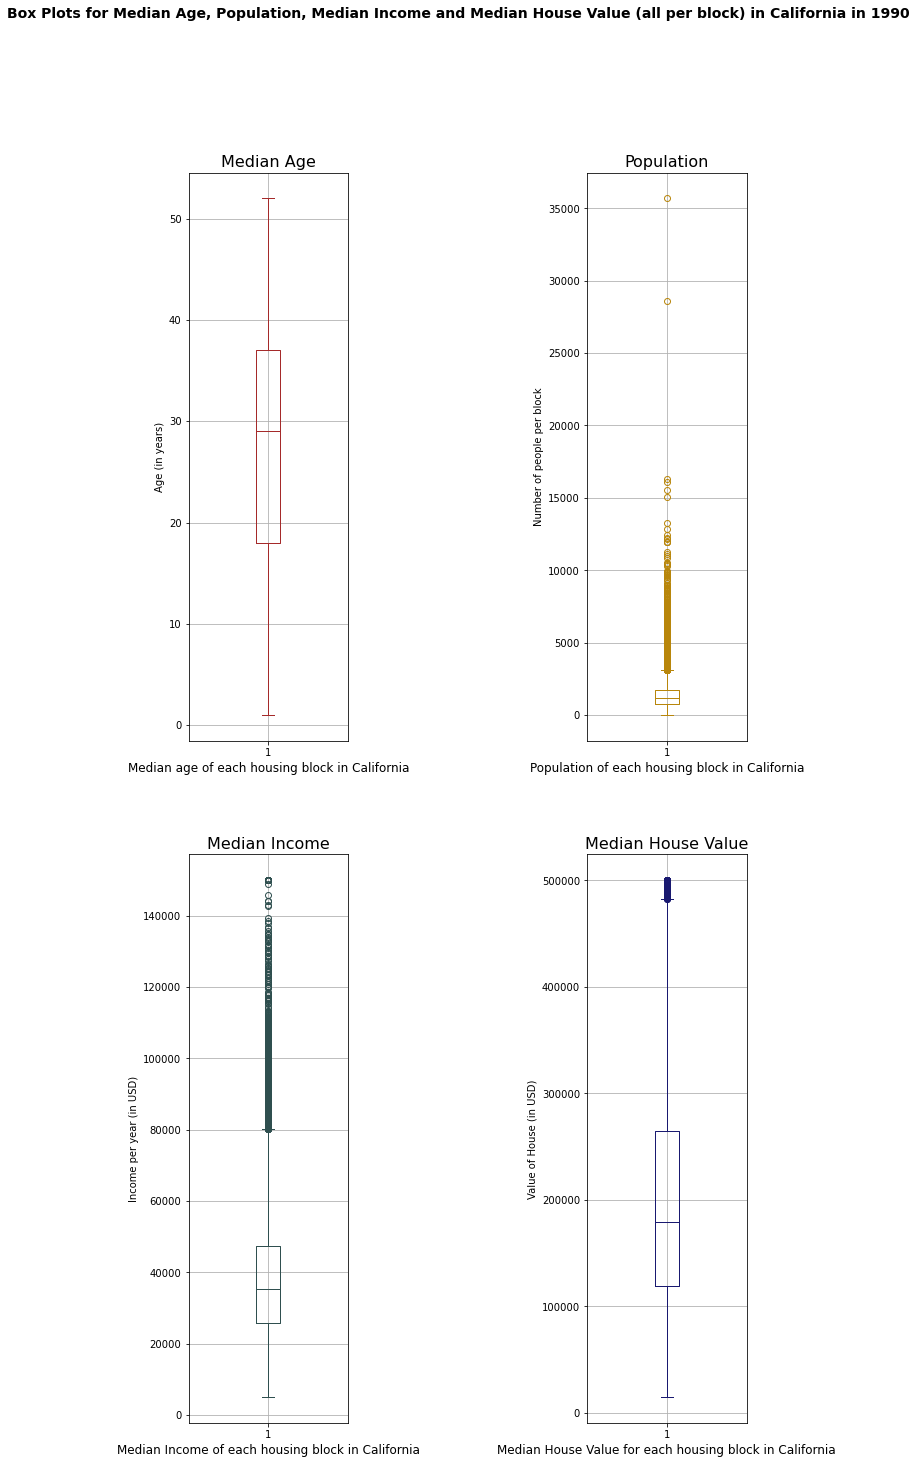

In [732]:
fig_box, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10,23))
fig_box.suptitle('Box Plots for Median Age, Population, Median Income and Median House Value (all per block) in California in 1990', fontsize=14, fontweight='bold')

c = 'brown'
ax1.boxplot(housing_pai['Median Age'], boxprops=dict(color = c), capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color='red', markeredgecolor=c),
            medianprops=dict(color=c))
ax1.set_title('Median Age', fontsize=16)
ax1.set_xlabel('Median age of each housing block in California', fontsize=12)
ax1.set_ylabel('Age (in years)')
ax1.grid()

c = 'darkgoldenrod'
ax2.boxplot(housing_pai['Population'], boxprops=dict(color = c), capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color='red', markeredgecolor=c),
            medianprops=dict(color=c))
ax2.set_title('Population', fontsize=16)
ax2.set_xlabel('Population of each housing block in California', fontsize=12)
ax2.set_ylabel('Number of people per block')
ax2.grid()

c = 'darkslategrey'
ax3.boxplot(housing_pai['Median Income'], boxprops=dict(color = c), capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color='red', markeredgecolor=c),
            medianprops=dict(color=c))
ax3.set_title('Median Income', fontsize=16)
ax3.set_xlabel('Median Income of each housing block in California', fontsize=12)
ax3.set_ylabel('Income per year (in USD)')
ax3.grid()

c= 'midnightblue'
ax4.boxplot(housing_pai['Median House Value'], boxprops=dict(color = c), capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color='red', markeredgecolor=c),
            medianprops=dict(color=c))
ax4.set_title('Median House Value', fontsize=16)
ax4.set_xlabel('Median House Value for each housing block in California', fontsize=12)
ax4.set_ylabel('Value of House (in USD)')
ax4.grid()


fig_box.subplots_adjust(wspace = 1.5)

Above we plotted a line graph for each of the variables we are focusing on. As opposed to the scatterplot above, the three graphs have a different y-axis. Instead of having the interval ranges of the median house value, we have the actual value of the house in the y-axis. However, since we've grouped the values into ranges of $10,000, we graphed two line graphs, the red one being the upper bound of the interval of each Median house range, and similarly, the blue line being the lower bound of the same interval. This was to visualize the actual values of the house, rather than the ideas. Even though we grouped the dataset into ranges of median house value and therefore not as precise and accurate as we'd hope, it gives us a good estimation of how different values of our variables vary for different house values. 

These graphs are useful to see how our variables of interest increase, how median house values change within a range. Since both upper and lower bound lines of the three graphs follow similar trends, we can also conclude the relation of the variable with median house value. From the Median Income graph, we can see a similar correlation to the scatter plot, we see a strong positive correlation between median income and median house value in California in 1990. For the relation between Median Age and Median House value, we can see that there is no relation between the two. The line graphs vary a lot and we see no real trend, so based on this graph we can say that age does not affect the house value in California, which is a slightly different statement than the scattergraph, however, the scatter graph there was a weak correlation and could be argued that there could be no correlation. Lastly, the population relation to median house value seems to have a weak symmetrical curve around the median house value. SUch that the most expensive houses and the least expensive houses have the least population, while the middle house values tend to have the highest population. A different finding than what we found in the scatter graph, although we didn't mention in the scatter graph there seemed to be a few outliers in the graph, which in the line graph we could see was from the bell curve shape of the relation. 

Plotting boxplots is useful to assess the validity of our findings and see how our variables change as well as find outliers in our data. Box plots of the variables of interest (population, median income, and age) have been plotted above, as well as the outcome we are assessing from, median house value. The median age boxplot shows the boxplot has no outliers, which means that all of the datasets of median age are valid since there are no unusual values, hence the max and min of median age shown above in the statistical summary is the same. However, the rest of the boxplots do not have the same boxplots with no outliers. 

In the population boxplot, we can see that their interquartile range is fairly small, as well as their maximum and minimum value that are not outliers. Hence we see a great number of outliers, all above the maximum significant value. This suggests that the dataset has a lot of insignificant values which shouldn't be taken into account, and which are tampered with by the scatter and line graph when assessing the relation between population and Median house value. 

In the Median income dataset, we see a similar box plot to the population, with a significant amount of outliers. Although the boxplot does have a wider/larger interquartile range as well as significant min and max values, all outliers are above the maximum significant value. Since we took the outliers into account when assessing income relation to house value, the relation is tampered with and not accurate since outlying values have skewed with the plots and lines. 

In the median house value, we see a far larger interquartile range and range of min and max significant values, similar to the median age boxplot. Yet the boxplot has outliers, all located above but close to the maximum significant value. This means that not only have the population and line graph variables been skewed due to its outliers, but the outcome as well compromises the accuracy of the median age relation with median house value, as well as making the population and income relations less accurate. 

Even though we did not filter the outliers, we could still draw some sort of conclusions ton our results. Since Median age has no outliers and median house value has all its outliers very close to the max significant value, the likelihood of a relation between them both is weak to no relation at all. Hence we can suggest that age has little to no effect on house value. We could also say that since median income and the median house value have a strong relation (when taking outliers into account), we'd probably see a similar trend if we'd filter the outliers. The relation between house value and the population is very ambiguous since the relation without filtering the outliers was still ambiguous since even with the outliers, we found two different trends with the scatterplot and the line graph, hence we can't make any conclusions from those findings due to the ambiguity of the findings as well as they were tampered by the outliers. 

<u>ADJUSTING DATA VALUES<u>

In this section, we'll adjust our dataset to only take into account significant values and not take into account any anomolies or outliers that may skew our graphs and caluclations.

In [544]:
col_a = list(housing_pai.columns)
col_a.insert(0, 'Ranges')
r = {'Ranges': ['Q1 (25%)', 'Q3 (75%)', 'IQR', 'Lower Fence', 'Upper Fence']}
sig_data = pd.DataFrame(r)
for i in list(housing_pai.columns):
    sig_data[i]= np.nan

for c in list(housing_pai.columns):
    q1 = housing_pai[c].quantile(0.25)
    sig_data[c].iloc[0] = q1
    q3 = housing_pai[c].quantile(0.75)
    sig_data[c].iloc[1] = q3
    iqr = q3 - q1
    sig_data[c].iloc[2] = iqr
    l_f = q1 - (1.5*iqr)
    sig_data[c].iloc[3] = l_f
    u_f = q3 - (1.5*iqr)
    sig_data[c].iloc[4] = u_f

sig_data = sig_data.set_index('Ranges')
t_sig_data = sig_data
a_sig_data = sig_data
a_sig_data.iloc[3] = 0
t_sig_data = t_sig_data.style.set_caption('True ranges of the significant values of housing_pai').set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'dimgray'),
        ('font-size', '16px')
    ]
}])
a_sig_data = a_sig_data.style.set_caption('Adjusted ranges of the significant values of housing_pai').set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'dimgray'),
        ('font-size', '16px')
    ]
}])
warnings.filterwarnings('ignore')
display(t_sig_data)
display(a_sig_data)

,Median Age,Population,Median Income,Households,Median House Value
Ranges,,,,,
Q1 (25%),18.000000,787.000000,25634.000000,280.000000,119600.000000
Q3 (75%),37.000000,1725.000000,47432.500000,605.000000,264725.000000
IQR,19.000000,938.000000,21798.500000,325.000000,145125.000000
Lower Fence,0.000000,0.000000,0.000000,0.000000,0.000000
Upper Fence,8.500000,318.000000,14734.750000,117.500000,47037.500000


,Median Age,Population,Median Income,Households,Median House Value
Ranges,,,,,
Q1 (25%),18.000000,787.000000,25634.000000,280.000000,119600.000000
Q3 (75%),37.000000,1725.000000,47432.500000,605.000000,264725.000000
IQR,19.000000,938.000000,21798.500000,325.000000,145125.000000
Lower Fence,0.000000,0.000000,0.000000,0.000000,0.000000
Upper Fence,8.500000,318.000000,14734.750000,117.500000,47037.500000


Above a code was created to calculate and ignore any anomalies, it then calculates the first and second quartile, as well as the inter-quartile range (IQR). All of that we calculated the upper and lower fence only for significant values. The table "True ranges of the significant values of housing_pai"  allows us to identify the significant maximum and minimum and if any values are out of the higher and lower fence bounds, we can identify them and disregard the value. We can notice that all the lower fence values are negative. Although negative values are acceptable when lower fences, we cannot have a negative median age or any of our other variables. 

To solve this issue we created an adjusted table called "Adjusted ranges of the significant values of housing_pai" where any negative value is represented by 0. This would not affect any of our values since there cannot exist a negative value for any of these variables, so if any value in the dataset is zero which is the lowest possible value for any variable, it will still be within the higher-lower fence bound as a value that is equal to the lower fence is not considered an anomaly. This way the Adjusted data frame makes more statistical sense.

In [545]:
ind_lst = []
prac = housing_pai
for w in housing_pai.columns:
    for z in list(prac[w]):
        if z > int(sig_data.iloc[[4]][w]):
            ind_lst.append(list(prac[prac[w]==z].index.values.astype(int)))
concat_list = [j for i in ind_lst for j in i]
ind_out = sorted(set(concat_list))

Here we identified all the outliers Block ID for each column. We only looked for values that were above the upper fence of their respective columns since as discussed previously, there cannot exist a value lower than the lower fence. We then merged the IDs and eliminated any duplicate IDs across variables. This is because if we took into account just certain values of variables (not outliers) from our data, our results would be subjected to bias over some variables. Hence we would have to ignore any block that has at least one variable outlier. 

In [546]:
print('Total number of Blocks ', len(list(range(0, 20640))))
print('Total blocks with at least one outlier in a variable:', len(ind_out))

Total number of Blocks  20640
Total blocks with at least one outlier in a variable: 20639


As we can see from above, there just exists one block without any outliers. Since one block is not representative of the whole county, we'll have to take the data with the outliers, acknowledging that it may not be statistically accurate since outliers are taken into account.

<U> CORRELATION ANALYSIS <U>

In [521]:
corr = housing_pai.corr()
def colors(val):
    if val < 0:
        color = 'firebrick'
    elif val == 1:
        color = 'dimgray'
    elif 0.5 <= val < 1:
        color = 'mediumblue'
    else:
        color = 'black'
    return 'color: %s' % color

def no_corr(val):
    highlight = 'background-color: dimgray'
    default = ''
    if type(val) in [float, int]:
        if val == 1:
            return highlight
        else:
            return default

ahh = corr.style.applymap(colors)
corr = ahh.applymap(no_corr)
corr =corr.set_caption('Correlation between variables')
corr

,Median Age,Population,Median Income,Households,Median House Value
Median Age,1.000000,-0.296244,-0.119034,-0.302916,0.105623
Population,-0.296244,1.000000,0.004834,0.907222,-0.024650
Median Income,-0.119034,0.004834,1.000000,0.013033,0.688075
Households,-0.302916,0.907222,0.013033,1.000000,0.065843
Median House Value,0.105623,-0.024650,0.688075,0.065843,1.000000


Here we present a table of correlations between our variables. Values in red mean that they have a negative correlation with each other. A value in black means there is a weak to moderate correlation strength and blue values mean that there is a strong correlation between each variable. As we can see from the Median House Value column, we see that Population has a negative weak correlation to house value and Median Income has a strong positive correlation while the other two variables have a weak positive correlation. This shows that our intuition on the scatterplots was not far off.

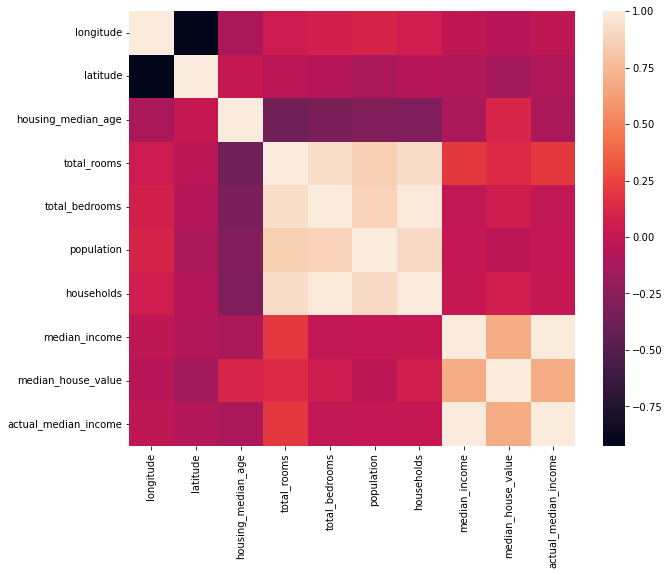

In [34]:
import seaborn as sns

plt.figure(figsize=(10,8))
corr = housing.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values) 
plt.show()

Here we created an extra data visualization. Although this does not apply to the research being conducted, it allows us to visualize the correlation between all the variables from the dataset. It does help us identify if there is any other variable we might have missed that would have a strong (positive or negative) correlation with Median house value. As we can see, the only variables that have a strong correlation with house value are income and house value itself. All other variables seem to fall in the category of correlation between -0.25 and 0.25.

<u> MAPS OF OUR VARIABLES OVER CALIFORNIA<u>

In [549]:
housing_cord = housing
housing_cord["Coordinates"] = list(zip(housing.longitude, housing.latitude))
housing_cord["Coordinates"] = housing["Coordinates"].apply(Point)
geo_housing = gpd.GeoDataFrame(housing_cord, geometry="Coordinates")
states = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
counties = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
geo_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,actual_median_income,Coordinates
Block Index,,,,,,,,,,,,
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,83252.0,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,83014.0,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,72574.0,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,56431.0,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,38462.0,POINT (-122.25000 37.85000)
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,15603.0,POINT (-121.09000 39.48000)
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,25568.0,POINT (-121.21000 39.49000)
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,17000.0,POINT (-121.22000 39.43000)


We obtained data from the US census to be able to map California and its counties. We then append it to our housing_pai data frame and convert it into a geopanda called geo_housing. This data frame will allow us to create a map of California and its counties, in which we will be able to visualize the difference in each variable across counties.

In [9]:
mmm = geo_housing
cali_counties = counties.query("STATEFP == '06'")
data_poly = cali_counties[['geometry']]
warnings.filterwarnings('ignore')
joined_gdf = gpd.sjoin(mmm, data_poly, op='within')
joined_gdf = joined_gdf.rename(columns={'index_right': 'Counties index'})
c_names = []
ahr =cali_counties.reset_index()
for i in  joined_gdf['Counties index']:
    ind =ahr[ahr['index']==i].index.values.astype(int)[0]
    name = (ahr.iloc[ind])['NAME']
    c_names.append(name)
joined_gdf.insert(0, 'Counties', c_names)

In [10]:
c_pai = joined_gdf[['Counties', 'housing_median_age', 'population', 'actual_median_income', 'households', 
                 'median_house_value', 'Coordinates', 'Counties index']]
counties_pai = c_pai.rename(columns = {'housing_median_age': 'Median Age',
                                               'population': 'Population',
                                               'actual_median_income': 'Median Income',
                                   'households': 'Households',
                                   'median_house_value': 'Median House Value'})
counties_pai = counties_pai.set_index('Counties index')
counties_pai = counties_pai.reset_index()
counties_pai

,Counties index,Counties,Median Age,Population,Median Income,Households,Median House Value,Coordinates
0,2062,Alameda,41.0,322.0,83252.0,126.0,452600.0,POINT (-122.23000 37.88000)
1,2062,Alameda,21.0,2401.0,83014.0,1138.0,358500.0,POINT (-122.22000 37.86000)
2,2062,Alameda,52.0,496.0,72574.0,177.0,352100.0,POINT (-122.24000 37.85000)
3,2062,Alameda,52.0,558.0,56431.0,219.0,341300.0,POINT (-122.25000 37.85000)
4,2062,Alameda,52.0,565.0,38462.0,259.0,342200.0,POINT (-122.25000 37.85000)
...,...,...,...,...,...,...,...,...
20407,1981,Yuba,25.0,845.0,15603.0,330.0,78100.0,POINT (-121.09000 39.48000)
20408,1981,Yuba,18.0,356.0,25568.0,114.0,77100.0,POINT (-121.21000 39.49000)
20409,1981,Yuba,17.0,1007.0,17000.0,433.0,92300.0,POINT (-121.22000 39.43000)
20410,1981,Yuba,18.0,741.0,18672.0,349.0,84700.0,POINT (-121.32000 39.43000)


We identified in which county each point in our datset lies in. We then created a a new column where it states what county each point is in, in which it will help us summarize and analyze each county. 

In [553]:
gb_counties = counties_pai.groupby(pd.Grouper(key= 'Counties'))
mc_counties = (gb_counties.mean())
count_counties = list((gb_counties.count())['Median Age'])
mc_counties.insert(1, 'Count', count_counties)
mc_counties['Counties index'] = mc_counties['Counties index'].astype(int)
keep_same = {'Counties index', 'Count'}
mc_counties.columns = ['{}{}'.format(c, '' if c in keep_same else ' (mean)')
              for c in mc_counties.columns]
mc_counties.head(10)

,Counties index,Count,Median Age (mean),Population (mean),Median Income (mean),Households (mean),Median House Value (mean)
Counties,,,,,,,
Alameda,2062,1009,37.425173,1230.630327,38368.449950,464.444995,208469.883053
Contra Costa,3050,591,26.666667,1352.098139,47197.568528,506.245347,217257.554992
Alpine,3181,3,16.000000,371.000000,26139.000000,150.000000,118700.000000
Amador,873,28,19.321429,1072.821429,31065.071429,375.642857,117146.428571
Butte,1555,156,25.211538,1167.435897,23353.217949,459.391026,89611.538462
Calaveras,1021,32,16.406250,999.937500,28145.562500,395.281250,107893.750000
Colusa,1779,16,34.687500,1017.187500,25847.062500,350.750000,77731.250000
Solano,1402,199,25.055276,1695.623116,39179.135678,569.989950,147259.798995
Del Norte,1170,11,18.363636,1458.636364,24962.181818,472.727273,97163.636364


We then calculated the mean of each variable to each county. Then we created a data frame where it states each county in California, the number of points (household in the dataset) that reside in the county, its county index, and the average for each variable for that county. 

In [12]:
cali = (cali_counties.set_index('NAME')).sort_index()
cali_pai = pd.concat([cali, mc_counties], axis=1)
cali_pai=cali_pai.reset_index()
cali_pai = cali_pai.rename(columns={'index': 'County'})
cali_pai.head()

,County,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,LSAD,ALAND,AWATER,geometry,Counties index,Count,Median Age (mean),Population (mean),Median Income (mean),Households (mean),Median House Value (mean)
0,Alameda,06,001,01675839,0500000US06001,06001,06,1914242789,212979931,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",2062,1009,37.425173,1230.630327,38368.449950,464.444995,208469.883053
1,Alpine,06,003,01675840,0500000US06003,06003,06,1912292633,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",3181,3,16.000000,371.000000,26139.000000,150.000000,118700.000000
2,Amador,06,005,01675841,0500000US06005,06005,06,1539933576,29470568,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",873,28,19.321429,1072.821429,31065.071429,375.642857,117146.428571
3,Butte,06,007,01675842,0500000US06007,06007,06,4238423343,105325812,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",1555,156,25.211538,1167.435897,23353.217949,459.391026,89611.538462
4,Calaveras,06,009,01675885,0500000US06009,06009,06,2641820834,43806026,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",1021,32,16.406250,999.937500,28145.562500,395.281250,107893.750000


We concatenated the average county dataframe to the geo_housing dataframe to be able to map the counties and color code them depending on the degree of each variable mean.

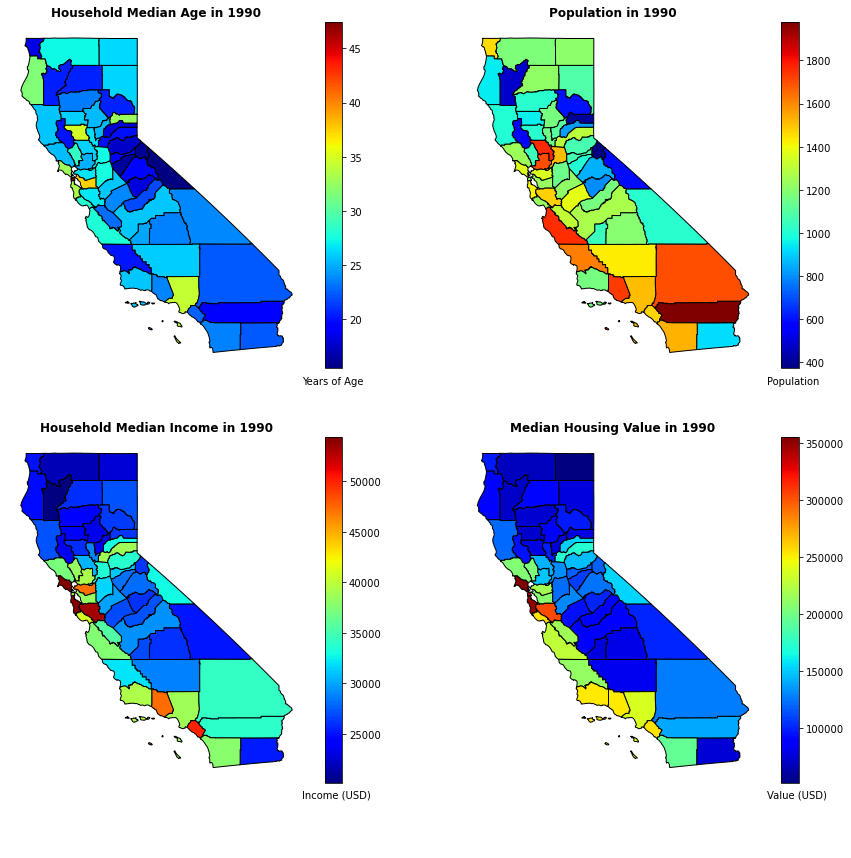

In [554]:
from matplotlib import pyplot

fig, ([ax1, ax2], [ax3, ax4]) = pyplot.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(15,14))
cali_pai.plot(
    ax=ax1, edgecolor='black', column='Median Age (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Median Age (mean)']).min(),
    vmax=(cali_pai['Median Age (mean)']).max()
)
ax1.annotate('Years of Age',xy=(0.28, 0.47),  xycoords='figure fraction')
ax1.set_title('Household Median Age in 1990', fontsize= 12, fontweight='bold')


cali_pai.plot(
    ax=ax2, edgecolor='black', column='Population (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Population (mean)']).min(),
    vmax=(cali_pai['Population (mean)']).max()
)
ax2.annotate('Population',xy=(0.71, 0.47),  xycoords='figure fraction')
ax2.set_title('Population in 1990', fontsize= 12, fontweight='bold')


cali_pai.plot(
    ax=ax3, edgecolor='black', column='Median Income (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Median Income (mean)']).min(),
    vmax=(cali_pai['Median Income (mean)']).max()
)
ax3.annotate('Income (USD)',xy=(0.28, 0.06),  xycoords='figure fraction')
ax3.set_title('Household Median Income in 1990', fontsize= 12, fontweight='bold')


cali_pai.plot(
    ax=ax4, edgecolor='black', column='Median House Value (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Median House Value (mean)']).min(),
    vmax=(cali_pai['Median House Value (mean)']).max()
)
ax4.annotate('Value (USD)',xy=(0.71, 0.06),  xycoords='figure fraction')
ax4.set_title('Median Housing Value in 1990', fontsize= 12, fontweight='bold')

for i in [ax1, ax2, ax3, ax4]:
    i.axis('off')

We plotted the outline of California and its counties four times and then color-coded each county depending on the degree of each variable. We see that median age is relatively well distributed across the state with the counties with the highest median age located on the coats, however, there is not a large difference between the higher median age counties and the lower median age counties. The population is well distributed in California as we see counties of different ranges of population located all over the state, with most counties being in the middle to higher range in the population heat bar. Income and median house value graphs seem to have very similar trends in the heat bar, as the higher for each variable both tend to be within the mid-west and southwest of the county, residing on the coats. It also seems that if a county has a relatively high income, it also tends to have relatively high house values. This would be because the higher income counties can afford and are willing to pay for higher quality houses in larger areas which would increase the value/price of the house. 

<u> INTERACTIVE MAP <u>

In [351]:
! pip install bokeh

In [563]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json

simple_cali_pai = cali_pai.rename(columns = {'Median Age (mean)': 'med_age',
                                               'Population (mean)': 'popu',
                                               'Median Income (mean)': 'med_inc',
                                   'Households (mean)': 'house',
                                   'Median House Value (mean)': 'med_house_val'})

cali_geojson=GeoJSONDataSource(geojson=simple_cali_pai.to_json())

color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], 
                                 low = simple_cali_pai['med_house_val'].min(), 
                                 high = simple_cali_pai['med_house_val'].max())
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@County'),('Average Age', '@med_age{0,0.00}'),
                               ('Population Average','@popu{0,0.000}'),
                               ('Income Average (USD)','@med_inc{0,0.00}'), ('Average Households','@house'), 
                               ('House Value Average (USD)','@med_house_val{0,0.00}')])
p = figure(title="California Housing Prices in 1990 (per block)", tools=[hover])
p.patches("xs","ys",source=cali_geojson,
          fill_color = {'field' :'med_house_val', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

Loading BokehJS ...

<U> THE MESSAGE <U>

The urbanization of city areas and the rise in popularity of suburbs in recent years has distorted the levels of population and income, has created and expanded a gap between urban and rural areas in California, as output and economic activity centralizes in specific areas in the state. California goal is to improve economic growth rates and believe that they can do so through urbanization. The being said, urbanization takes place a lot through the development of houses and quality of life and since house value is considered an essential facot rin the economy since it measures wealth, we will measure how economic growth and the progression of urbanization has affected the housing market. 

<u> RURAL VS URBAN COUNTIES IN 1990 <u>

In [14]:
urban_counties = ['Sacramento', 'San Joaquin', 'Contra Costa', 'San Francisco', 'Alameda', 'San Mateo', 'Santa Clara',
                 'Fresno', 'Ventura', 'Los Angeles', 'San Bernardino', 'Riverside', 'Orange', 'San Diego']

According to the Urban Counties Assosiation of California (https://urbancounties.com/about/), these are the counties that are considered Urban counties in the state. We then put them in a list called urban_counties.

In [15]:
cali = cali.reset_index()
lst = []
for i in list(cali['NAME']):
    if i in urban_counties:
        lst.append('Urban')
    else:
        lst.append('Rural')
urban_rural = mc_counties 
urban_rural['Area type'] = lst

urban = urban_rural.loc[urban_rural['Area type']== 'Urban']
rural = urban_rural.loc[urban_rural['Area type']== 'Rural']
display(urban.head())
display(rural.head())

,Counties index,Count,Median Age (mean),Population (mean),Median Income (mean),Households (mean),Median House Value (mean),Area type
Counties,,,,,,,,
Alameda,2062,1009,37.425173,1230.630327,38368.449950,464.444995,208469.883053,Urban
Colusa,1779,16,34.687500,1017.187500,25847.062500,350.750000,77731.250000,Urban
El Dorado,643,120,17.583333,1071.866667,33815.766667,398.416667,145876.675000,Urban
Kings,654,88,24.579545,1043.659091,26786.852273,330.431818,76828.409091,Urban
Modoc,2999,8,26.250000,1209.750000,22667.750000,463.875000,51162.500000,Urban


,Counties index,Count,Median Age (mean),Population (mean),Median Income (mean),Households (mean),Median House Value (mean),Area type
Counties,,,,,,,,
Contra Costa,3050,591,26.666667,1352.098139,47197.568528,506.245347,217257.554992,Rural
Alpine,3181,3,16.000000,371.000000,26139.000000,150.000000,118700.000000,Rural
Amador,873,28,19.321429,1072.821429,31065.071429,375.642857,117146.428571,Rural
Butte,1555,156,25.211538,1167.435897,23353.217949,459.391026,89611.538462,Rural
Calaveras,1021,32,16.406250,999.937500,28145.562500,395.281250,107893.750000,Rural


Here we separated the counties into different data frames between rural and urban. This is to help us distinguish and identify differences between urban and rural counties

In [16]:
rural_mean = (rural.mean()).to_frame()
rural_mean = rural_mean.drop(rural_mean.index[0])
rural_mean = rural_mean.rename(columns= {0: 'Rural Counties Average in 1990'})

urban_mean = (urban.mean()).to_frame()
urban_mean = urban_mean.drop(urban_mean.index[0])
urban_mean = urban_mean.rename(columns= {0: 'Urban Counties Average in 1990'})

rural_urban_mean = pd.merge(rural_mean, urban_mean, left_index=True, right_index=True)
rural_urban_mean

,Rural Counties Average in 1990,Urban Counties Average in 1990
Count,381.522727,258.928571
Median Age (mean),24.575288,25.815907
Population (mean),1182.008070,1179.332170
Median Income (mean),32192.322072,32193.851852
Households (mean),418.569829,436.850362
Median House Value (mean),144855.179608,152149.176773


Above we displayed a data frame comparing the averages of rural and urban counties in 1990 per variables being studied. As we can see, rural counties tend to have more households by a significant amount, as the average rural county has over 120 more households than the urban counties. However, the Urban counties tend to have over 4.5 times as much population density as rural counties have, which follows with the characteristics of an urban area, as they tend to have cities with a denser population. We see that in terms of age, population, and income, urban and rural counties have little differences which accounts for no significant differences between the counties type. We can also identify a slightly higher average house value in urban counties, which can be justified by the higher density in population, as there is a higher demand for houses in the city. Individuals also value their houses more when it's in a convenient location. However, the difference in house value between rural and urban counties is not very significant. 

<u> CALIFORNIA IN 2010-2014 <u>

In [17]:
import requests
from bs4 import BeautifulSoup

web_url = 'https://en.wikipedia.org/wiki/List_of_California_locations_by_income'
response = requests.get(web_url)
soup_object = BeautifulSoup(response.content)
data_table = soup_object.find_all('table', 'wikitable sortable')[0]
all_values = data_table.find_all('tr')

cali_2014_df = pd.DataFrame(columns = ['county', 'population', 'population_density', 'Median_household_income'])
ix = 0 

for row in all_values[1:]:
    values = row.find_all('td')
    county = values[0].text.strip()
    popu = values[1].text.strip()
    popu_dens = values[2].text.strip()
    med_hou_inc =values[4].text.strip()
    cali_2014_df.loc[ix] = [county, popu, popu_dens, med_hou_inc]
    ix += 1
cali_2014_df['Median_household_income'] = cali_2014_df['Median_household_income'].str.replace(',', '')
cali_2014_df['Median_household_income'] = cali_2014_df['Median_household_income'].str.replace('$', '')
cali_2010_2014 = cali_2014_df
display(cali_2010_2014.head())

,county,population,population_density,Median_household_income
0,Alameda,"1,559,308","2,109.8",73775
1,Alpine,"1,202",1.6,61343
2,Amador,"37,159",62.5,52964
3,Butte,"221,578",135.4,43165
4,Calaveras,"44,921",44.0,54936


Here we were able to web scrap through HTML, demographics of each county in California from https://en.wikipedia.org/wiki/List_of_California_locations_by_income. This Data was collected through the course of 2010 to 2014 and was carried out by the U.S. Census Bureau. Since the size of California meant that the research and data collection was carried out throughout four years, we will assume that this data is from 2010. We will only use the columns of population, population density, and median households income from the web scrapping since those were the relevant variables we used for analyzing counties in 1990. 

Since we are comparing California between two years with a 20-year gap, we do not have to run the program over time. However, if we'd want to compare California in 1990/2010 to the current date, we would have to run the program over time. As long as we chose a fixed year in the past, we will not have to run the program over time.

The web scrapping will allow us to compare California in 1990 and 2010, in which we will be able to compare the housing market and quality of housing. From there we will be able to see how the urbanization and popularity of the state have changed the market and it will give us a good sense of what to expect from California in the next 20 years. 

In [18]:
cali_1990 = mc_counties
dens = []
for row in (cali_pai[['ALAND']]).index:
    sq_meter = (cali_pai['ALAND']).iloc[row]
    sq_mile = sq_meter/2589988
    popu = (cali_1990['Population (mean)']).iloc[row]
    popu_dens = popu / sq_mile
    dens.append(popu_dens)
cali_1990['Population Density'] = dens
cali_1990 = mc_counties.reset_index()
cali_1990.head(5)

,Counties,Counties index,Count,Median Age (mean),Population (mean),Median Income (mean),Households (mean),Median House Value (mean),Area type,Population Density
0,Alameda,2062,1009,37.425173,1230.630327,38368.449950,464.444995,208469.883053,Urban,1.665054
1,Contra Costa,3050,591,26.666667,1352.098139,47197.568528,506.245347,217257.554992,Rural,1.831267
2,Alpine,3181,3,16.000000,371.000000,26139.000000,150.000000,118700.000000,Rural,0.623979
3,Amador,873,28,19.321429,1072.821429,31065.071429,375.642857,117146.428571,Rural,0.655573
4,Butte,1555,156,25.211538,1167.435897,23353.217949,459.391026,89611.538462,Rural,1.144531


Since the 1990 California dataset, we did not have a column for population density, we decided to add it since we already had the information to calculate density per county. We calculated by getting the total population by each county and dividing it by the 'ALAND' column from our geo_housing_pai data frame that is also in cali_pai. Note that since that land area was in square meters and the population density we web scrapped for California in 2010 was in square miles, we converted 'ALAND' to square miles, so we had the same units in both data frames.

In [19]:
path = os.getcwd() + '/Data/cali_median_age.csv'
X = pd.read_csv(path)
cali_med_age = X[['CTYNAME', 'YEAR', 'MEDIAN_AGE_TOT']]
cali_med_age = cali_med_age[~cali_med_age.YEAR.isin(list(range(6, 13)))]
cali_med_age['YEAR'] = cali_med_age.YEAR.add(2009)

counties = []
for i in range(0, len(list(cali_med_age['CTYNAME']))):
    county = ((list(cali_med_age['CTYNAME'])[i]).split('County'))[0]
    counties.append(county)
cali_med_age['CTYNAME'] = counties
cali_med_age = cali_med_age.rename(columns = {'CTYNAME': 'county',
                                               'MEDIAN_AGE_TOT': 'Median Age (mean)'})
cali_med_age.head()

,county,YEAR,Median Age (mean)
0,Alameda,2010,36.6
1,Alameda,2011,36.6
2,Alameda,2012,36.6
3,Alameda,2013,36.8
4,Alameda,2014,37.0


The data we collected through our dataset was still missing variables that we were studying. Hence we collected the Median age per county in California throughout the years. The dataset was provided by the U.S. Census https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-detail.html . The dataset had years of data collection as well as different groups per age, that is why we section off only the total median age of the whole population column as well as only the rows from 2010 to 2014 since those are the years that data was collected from our web scraping data frame.

In [20]:
med_age = ((cali_med_age.groupby('county')).mean())[['Median Age (mean)']]
med_age=med_age.reset_index()
med_age = pd.DataFrame(med_age)
med_age.head()

,county,Median Age (mean)
0,Alameda,36.72
1,Alpine,47.14
2,Amador,48.68
3,Butte,37.14
4,Calaveras,49.62


Since we only need one row per county, we collected the average median age per county from 2010 to 2014 and added it toa new dataframe. This was we can merge this column to our web scrapping data frame called cali_2010_2014.

In [21]:
path = os.getcwd() + '/Data/historical_cali_prices.csv'
historical_cali_housing = pd.read_csv(path)
historical_cali_housing= historical_cali_housing.drop(historical_cali_housing.index[0:6])
historical_cali_housing = historical_cali_housing.rename(columns=historical_cali_housing.iloc[0])
historical_cali_housing.dropna(axis=1, how='all', inplace=True)
historical_cali_housing = historical_cali_housing.iloc[:, :-8]
historical_cali_housing = historical_cali_housing.drop(historical_cali_housing.index[0])

first = list(historical_cali_housing.index[historical_cali_housing['Mon-Yr']=='Jan-10'])
last = list(historical_cali_housing.index[historical_cali_housing['Mon-Yr']=='Jan-15'])
cali_housing_10_14 = historical_cali_housing.iloc[first[0] - 7:last[0]-7]
cali_housing_10_14 = cali_housing_10_14.set_index('Mon-Yr')
cali_housing_10_14.drop(['CA'], axis=1, inplace=True)
cali_housing_10_14.head()

,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,...,Solano,Sonoma,Stanislaus,Sutter,Tehama,Tulare,Tuolumne,Ventura,Yolo,Yuba
Mon-Yr,,,,,,,,,,,,,,,,,,,,,
Jan-10,"$383,330","$170,000","$250,000","$166,000","$274,100","$185,000","$325,000","$145,965","$160,000","$246,874",...,"$215,983","$365,822","$140,175","$170,999","$140,000","$134,137","$220,833","$420,689","$263,461","$145,000"
Feb-10,"$410,230","$190,000","$219,230","$193,333","$278,350","$194,999","$307,576","$152,741","$150,000","$232,499",...,"$204,297","$356,707","$145,303","$162,143","$162,500","$134,999","$200,000","$451,724","$234,999","$148,571"
Mar-10,"$432,720","$186,000","$250,000","$185,000","$287,800","$190,000","$311,956","$150,963","$120,000","$270,652",...,"$211,538","$359,047","$145,384","$152,222","$132,857","$145,143","$202,273","$444,886","$260,714","$145,000"
Apr-10,"$407,830","$170,000","$238,000","$193,333","$298,850","$160,000","$311,956","$148,230","$146,000","$265,480",...,"$211,670","$365,140","$141,892","$162,000","$146,670","$132,630","$215,000","$442,610","$242,307","$163,529"
May-10,"$472,370","$208,330","$236,760","$191,999","$308,330","$150,000","$318,000","$157,520","$166,666","$261,960",...,"$224,120","$368,310","$150,309","$177,999","$127,500","$141,820","$218,750","$440,370","$271,000","$153,999"


Our web scrapping did not include median house values, hence we collected the data from the U.S. census https://www.car.org/marketdata/data/housingdata. We then sectioned the data to only the years 2010 to 2014 to match the web scrapping timeline. Above is the data frame of each county's median housing value per month. We should note that due to limited resources, the U.S. census did specify that they could not carry out the study in all counties.

In [22]:
cali_housing_10_14[cali_housing_10_14.columns[1:]] = cali_housing_10_14[cali_housing_10_14.columns[1:]].replace('[\$,]', ''
                                                                                                                , regex=True).astype(float)
cali_housing_10_14['Alameda'] = cali_housing_10_14['Alameda'].str.replace(',', '')
cali_housing_10_14['Alameda'] = cali_housing_10_14['Alameda'].str.replace('$', '')
cali_housing_10_14['Alameda'] = cali_housing_10_14['Alameda'].astype('float')

cali_housing_10_14 = cali_housing_10_14.T
cali_housing_10_14['Median House Value (mean)'] = (cali_housing_10_14.mean(axis=1)).round(2)
cali_housing_10_14.head()

Mon-Yr,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,Jul-10,Aug-10,Sep-10,Oct-10,...,Apr-14,May-14,Jun-14,Jul-14,Aug-14,Sep-14,Oct-14,Nov-14,Dec-14,Median House Value (mean)
Alameda,383330.0,410230.0,432720.0,407830.0,472370.0,474520.0,458180.0,440480.0,424770.0,444670.0,...,656140.0,680020.0,695210.0,688870.0,691500.0,652610.0,659660.0,670320.0,645680.0,496040.33
Amador,170000.0,190000.0,186000.0,170000.0,208330.0,188000.0,200000.0,172500.0,167500.0,186670.0,...,190000.0,242860.0,238890.0,247500.0,211110.0,225000.0,265000.0,231250.0,229540.0,188480.50
Butte,250000.0,219230.0,250000.0,238000.0,236760.0,229464.0,235710.0,243420.0,225000.0,244050.0,...,231670.0,237880.0,245000.0,276140.0,241450.0,235710.0,233780.0,241910.0,231820.0,225508.57
Calaveras,166000.0,193333.0,185000.0,193333.0,191999.0,192499.0,201667.0,203125.0,172222.0,194999.0,...,239062.0,243332.0,253409.0,240789.0,240000.0,233330.0,247370.0,230550.0,243750.0,191147.25
Contra-Costa,274100.0,278350.0,287800.0,298850.0,308330.0,326970.0,318110.0,313200.0,310840.0,289830.0,...,494280.0,519670.0,510990.0,546580.0,538510.0,499220.0,490480.0,457630.0,483330.0,366362.33


Here we eliminated the $ sign and the commas from the cells and converted each cell into a float. This way we will be able to make calculations using the data frame. We also inverted the rows and columns in order to match the cali_2010_2014 index. 

In [23]:
med_val = cali_housing_10_14[['Median House Value (mean)']]
set_difference = set(list(cali_2014_df['county'])) - set(list(med_val.index))
list_difference = list(set_difference)
for i in list_difference:
    med_val.loc[len(med_val)] = np.nan
ind = 51
for z in list_difference:
    med_val = med_val.rename(index={ind: z})
    ind = ind +1
med_val = med_val.sort_index()
med_val = med_val.reset_index()
med_val = med_val.rename(columns={'index': 'county'})
med_val.head()

Mon-Yr,county,Median House Value (mean)
0,Alameda,496040.33
1,Alpine,NaN
2,Amador,188480.50
3,Butte,225508.57
4,Calaveras,191147.25


We calculated the average of each counties median house price from 2010 to 2014. 

In [24]:
california_2010_2014 = pd.merge(cali_2010_2014, med_val, on= 'county')
california_2010_2014 = california_2010_2014.set_index('county')
california_2010_2014['population'] = (california_2010_2014['population'].str.replace(',', '')).astype(float)
california_2010_2014['population_density'] = (california_2010_2014['population_density'].str.replace(',', '')).astype(float)
california_2010_2014['Median_household_income'] = california_2010_2014['Median_household_income'].astype(float)
california_2010_2014=california_2010_2014.reset_index()

In [25]:
california_2010_2014.insert(4, 'Median Age (mean)', list(med_age['Median Age (mean)']))

In [568]:
california_2010_2014.head(10)

,Counties,Population (mean),Population Density,Median Income (mean),Median Age (mean),Median House Value (mean),year
0,Alameda,1559308.0,2109.8,73775.0,36.72,496040.33,2010
1,Alpine,1202.0,1.6,61343.0,47.14,NaN,2010
2,Amador,37159.0,62.5,52964.0,48.68,188480.50,2010
3,Butte,221578.0,135.4,43165.0,37.14,225508.57,2010
4,Calaveras,44921.0,44.0,54936.0,49.62,191147.25,2010
5,Colusa,21424.0,18.6,50503.0,33.70,NaN,2010
6,Contra Costa,1081232.0,1496.0,79799.0,38.62,NaN,2010
7,Del Norte,28066.0,27.9,39302.0,39.10,160194.30,2010
8,El Dorado,181465.0,106.3,68507.0,43.96,310203.78,2010
9,Fresno,948844.0,159.2,45201.0,30.78,161761.75,2010


We merged the median house value averages to cali_2010_2014. We then inserted the Average median age per county to the merged data frame called california_2010_2014. This would complete the web scrapping data frame to match the variables to the 1990 data frame. This would allow us to be able to compare each Californian county between 1990 and 2010, in each variable, and be able to assess the change and differences between the two data frames.

In [598]:
cali = california_2010_2014.reset_index()
lst = []
for i in list(cali['Counties']):
    if i in urban_counties:
        lst.append('Urban')
    else:
        lst.append('Rural')


urban_rural = california_2010_2014

urban_rural['Area type'] = lst

urban = urban_rural.loc[urban_rural['Area type']== 'Urban']
rural = urban_rural.loc[urban_rural['Area type']== 'Rural']
display(urban.head())
display(rural.head())

rural_mean = (rural.mean()).to_frame()
rural_mean = rural_mean.drop(rural_mean.index[1])
rural_mean = rural_mean.rename(columns= {0: 'Rural Counties Average in 2010'})

urban_mean = (urban.mean()).to_frame()
urban_mean = urban_mean.drop(urban_mean.index[1])
urban_mean = urban_mean.rename(columns= {0: 'Urban Counties Average in 2010'})

rural_urban_mean = pd.merge(rural_mean, urban_mean, left_index=True, right_index=True)
rural_urban_mean

,Counties,Population (mean),Population Density,Median Income (mean),Median Age (mean),Median House Value (mean),year,Area type
0,Alameda,1559308.0,2109.8,73775.0,36.72,496040.33,2010,Urban
6,Contra Costa,1081232.0,1496.0,79799.0,38.62,NaN,2010,Urban
9,Fresno,948844.0,159.2,45201.0,30.78,161761.75,2010,Urban
18,Los Angeles,9974203.0,2457.9,55870.0,34.96,354358.47,2010,Urban
29,Orange,3086331.0,3903.6,75998.0,36.40,586029.67,2010,Urban


,Counties,Population (mean),Population Density,Median Income (mean),Median Age (mean),Median House Value (mean),year,Area type
1,Alpine,1202.0,1.6,61343.0,47.14,NaN,2010,Rural
2,Amador,37159.0,62.5,52964.0,48.68,188480.50,2010,Rural
3,Butte,221578.0,135.4,43165.0,37.14,225508.57,2010,Rural
4,Calaveras,44921.0,44.0,54936.0,49.62,191147.25,2010,Rural
5,Colusa,21424.0,18.6,50503.0,33.70,NaN,2010,Rural


,Rural Counties Average in 2010,Urban Counties Average in 2010
Population (mean),1.702450e+05,2.184010e+06
Median Income (mean),5.215468e+04,6.822764e+04
Median Age (mean),3.970182e+01,3.545429e+01
Median House Value (mean),2.671347e+05,4.346772e+05
year,4.568639e+173,1.435858e+54


Here we seperated the data into two dataframes and then calculated the mean or each variable. We observe that due to the twenty-year differences, we see an important growth in all characteristics in California across all counties. We see that the differences between urban and rural counties in income is $1.6073e^4  ≈ 87.755$, hence urban counties tend to have $87.755$ dollars more in income than rural counties. This is a significant increase from 1990 as the difference in income between urban and rural counties did not even reach two dollars.  We then see that the difference in age between the different area types is $0.4248e$ ≈ 1.155 which means rural counties tend to have an average age of 1.155 years older than urban counties. This is kept almost constant from 1990. The difference in population is roughly $628.427$, hence urban counties tend to have 628.427 more people residing in their county. This is the opposite of 1990, as in that time rural counties tended to have a larger population, which shows a large migration movement within the state. Lastly, the difference in house value between urban and rural counties is  $1.6754e^5  ≈ 248.511$, hence urban counties on average, their houses are valued $248.511$ USD more than rural counties’ houses, which is a smaller difference than in 1990. This could be a sign of suburbs and rural counties being urbanized as well as increasing their demand for houses and housing conditions, which would lead to an increase in value and price in the housing market.

In [26]:
cali = cali.reset_index()
geo_cali_10 = pd.merge(cali, california_2010_2014, left_index=True, right_index=True)
display(geo_cali_10.head())

,level_0,index,NAME,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,LSAD,ALAND,AWATER,geometry,county,population,population_density,Median_household_income,Median Age (mean),Median House Value (mean)
0,0,0,Alameda,06,001,01675839,0500000US06001,06001,06,1914242789,212979931,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",Alameda,1559308.0,2109.8,73775.0,36.72,496040.33
1,1,1,Alpine,06,003,01675840,0500000US06003,06003,06,1912292633,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",Alpine,1202.0,1.6,61343.0,47.14,NaN
2,2,2,Amador,06,005,01675841,0500000US06005,06005,06,1539933576,29470568,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",Amador,37159.0,62.5,52964.0,48.68,188480.50
3,3,3,Butte,06,007,01675842,0500000US06007,06007,06,4238423343,105325812,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",Butte,221578.0,135.4,43165.0,37.14,225508.57
4,4,4,Calaveras,06,009,01675885,0500000US06009,06009,06,2641820834,43806026,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",Calaveras,44921.0,44.0,54936.0,49.62,191147.25


We then merged the california_2010_2014 to the cali dataframe since the cali dataframe has all the geo mapping and visualization of california. This was now we can map california and color code each county depending on the variable.

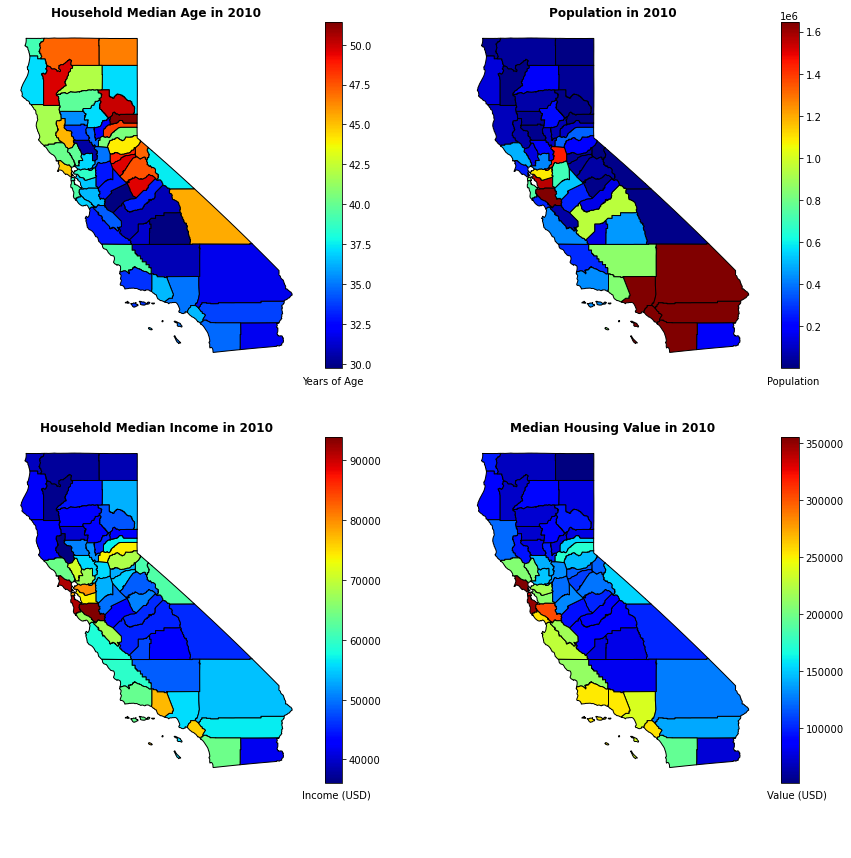

In [385]:
from matplotlib import pyplot

fig, ([ax1, ax2], [ax3, ax4]) = pyplot.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(15,14))
geo_cali_10.plot(
    ax=ax1, edgecolor='black', column='Median Age (mean)', legend=True, cmap='jet',
    vmin=(geo_cali_10['Median Age (mean)']).min(),
    vmax=(geo_cali_10['Median Age (mean)']).max()
)
ax1.annotate('Years of Age',xy=(0.28, 0.47),  xycoords='figure fraction')
ax1.set_title('Household Median Age in 2010', fontsize= 12, fontweight='bold')


geo_cali_10.plot(
    ax=ax2, edgecolor='black', column='population', legend=True, cmap='jet',
    vmin=(geo_cali_10['population']).min(),
    vmax=((geo_cali_10['population'].quantile(0.9)).round(2)
))
ax2.annotate('Population',xy=(0.71, 0.47),  xycoords='figure fraction')
ax2.set_title('Population in 2010', fontsize= 12, fontweight='bold')


geo_cali_10.plot(
    ax=ax3, edgecolor='black', column='Median_household_income', legend=True, cmap='jet',
    vmin=(geo_cali_10['Median_household_income']).min(),
    vmax=(geo_cali_10['Median_household_income']).max()
)
ax3.annotate('Income (USD)',xy=(0.28, 0.06),  xycoords='figure fraction')
ax3.set_title('Household Median Income in 2010', fontsize= 12, fontweight='bold')


cali_pai.plot(
    ax=ax4, edgecolor='black', column='Median House Value (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Median House Value (mean)']).min(),
    vmax=(cali_pai['Median House Value (mean)']).max()
)
ax4.annotate('Value (USD)',xy=(0.71, 0.06),  xycoords='figure fraction')
ax4.set_title('Median Housing Value in 2010', fontsize= 12, fontweight='bold')

for i in [ax1, ax2, ax3, ax4]:
    i.axis('off')

We then mapped California and color-coded it per variable. From the map, we can interpret that counties residing in the north of California tend to have an older population while in the south of the state, it tends to have a younger population. Counties with higher income on average and counties with higher average house value tend to be closer to the coast except for the north side coast of the state. However, higher housing value counties have a stronger correlation to the coast than higher-income counties have. This means that the proximity to the coast is a determinant of house values. In terms of population, the higher population counties tend to be in two sections of California, the south of the state and the central coast side of the state. But the south counties tend to have a higher population as the central coats counties usually have between medium to high population levels.  We should note that the color bar in the population map is values multiplied by 1e^6.

<u>Comparing California between 1990 and 2010<u>

In [27]:
cali_1990['year'] = '1990'
california_2010_2014['year'] = '2010'
california_2010_2014 = california_2010_2014.rename(columns = {'county': 'Counties',
                                               'population': 'Population (mean)',
                                               'Median_household_income': 'Median Income (mean)',
                                   'population_density': 'Population Density',})
cali_1990_df = cali_1990

common = \
    set.intersection(set(cali_1990_df.Counties), set(california_2010_2014.Counties))
cali_90_10 = pd.concat([
    cali_1990_df[cali_1990_df.Counties.isin(common)],
    california_2010_2014[california_2010_2014.Counties.isin(common)]]).sort_values(by='Counties')
cali_90_10.sort_values(by=['Counties', 'year'], ascending=True)
cali_90_10.drop(columns=['Households (mean)', 'Count'], inplace=True)
cali_90_10['Counties index'] = cali_90_10['Counties index'].fillna(method="ffill")

cali_90_10 = cali_90_10[['Counties', 'Counties index', 'year', 'Median Age (mean)', 'Median Income (mean)',
                        'Population (mean)', 'Population Density', 'Median House Value (mean)']]

lst = []
for i in range(0, 58):
    lst.append(i)
    lst.append(i)
cali_90_10['index'] = lst
cali_90_10 = cali_90_10.set_index('index')
cali_90_10.head(8)

,Counties,Counties index,year,Median Age (mean),Median Income (mean),Population (mean),Population Density,Median House Value (mean)
index,,,,,,,,
0,Alameda,2062.0,1990,37.425173,38368.449950,1.230630e+03,1.665054,208469.883053
0,Alameda,2062.0,2010,36.720000,73775.000000,1.559308e+06,2109.800000,496040.330000
1,Alpine,3181.0,1990,16.000000,26139.000000,3.710000e+02,0.623979,118700.000000
1,Alpine,3181.0,2010,47.140000,61343.000000,1.202000e+03,1.600000,NaN
2,Amador,873.0,1990,19.321429,31065.071429,1.072821e+03,0.655573,117146.428571
2,Amador,873.0,2010,48.680000,52964.000000,3.715900e+04,62.500000,188480.500000
3,Butte,1555.0,1990,25.211538,23353.217949,1.167436e+03,1.144531,89611.538462
3,Butte,1555.0,2010,37.140000,43165.000000,2.215780e+05,135.400000,225508.570000


Here we concatenated the data frame from 1990 and 2010. We can see how counties are repeated twice in the data frame, one row for 1990 and the other for 2010. This will allow us to compare the differences and changes in each county more carefully. Since due to limited resources, the U.S. census was not able to get the data for all the variables we are studying for all the counties, we will fill in the missing county values with NaN, to show the limitation to the study.

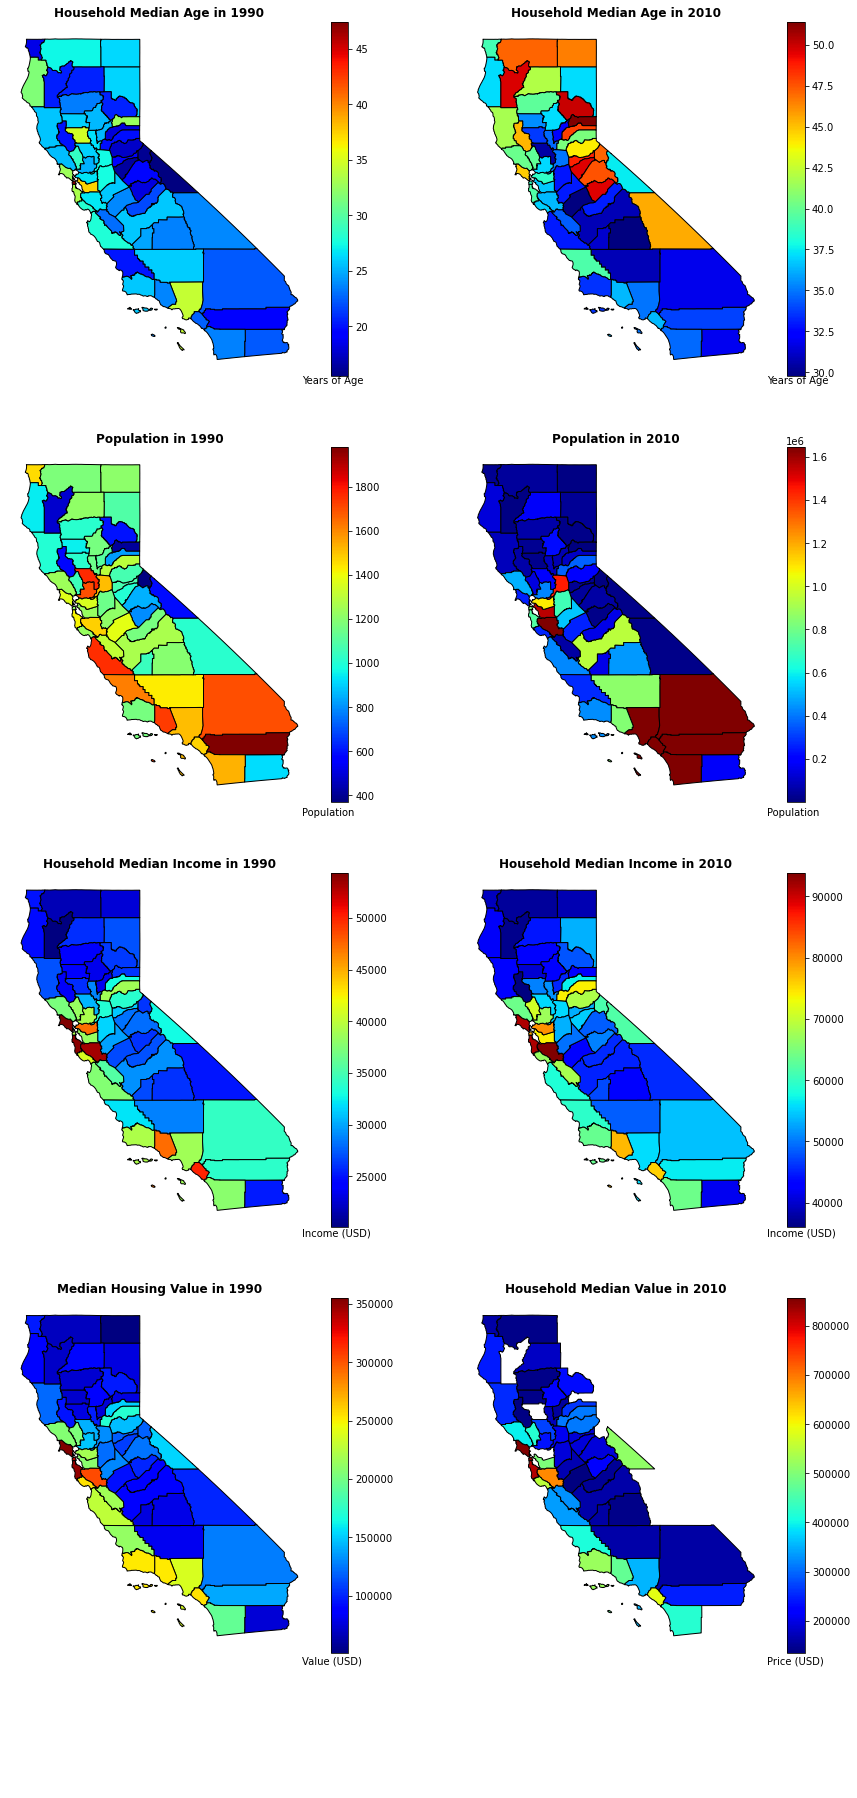

In [601]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]) = pyplot.subplots(ncols=2, nrows=4, 
                                                                        sharex=True, sharey=True, figsize=(15,30))

cali_pai.plot(
    ax=ax1, edgecolor='black', column='Median Age (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Median Age (mean)']).min(),
    vmax=(cali_pai['Median Age (mean)']).max()
)
ax1.annotate('Years of Age',xy=(0.28, 0.655),  xycoords='figure fraction')
ax1.set_facecolor('w')
ax1.set_title('Household Median Age in 1990', fontsize= 12, fontweight='bold')

geo_cali_10.plot(
    ax=ax2, edgecolor='black', column='Median Age (mean)', legend=True, cmap='jet',
    vmin=(geo_cali_10['Median Age (mean)']).min(),
    vmax=(geo_cali_10['Median Age (mean)']).max()
)
ax2.annotate('Years of Age',xy=(0.71, 0.655),  xycoords='figure fraction')
ax2.set_facecolor('w')
ax2.set_title('Household Median Age in 2010', fontsize= 12, fontweight='bold')



cali_pai.plot(
    ax=ax3, edgecolor='black', column='Population (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Population (mean)']).min(),
    vmax=(cali_pai['Population (mean)']).max()
)
ax3.annotate('Population',xy=(0.28, 0.455),  xycoords='figure fraction')
ax3.set_facecolor('w')
ax3.set_title('Population in 1990', fontsize= 12, fontweight='bold')

geo_cali_10.plot(
    ax=ax4, edgecolor='black', column='population', legend=True, cmap='jet',
    vmin=(geo_cali_10['population']).min(),
    vmax=((geo_cali_10['population'].quantile(0.9)).round(2)
))
ax4.annotate('Population',xy=(0.71, 0.455),  xycoords='figure fraction')
ax4.set_facecolor('w')
ax4.set_title('Population in 2010', fontsize= 12, fontweight='bold')



cali_pai.plot(
    ax=ax5, edgecolor='black', column='Median Income (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Median Income (mean)']).min(),
    vmax=(cali_pai['Median Income (mean)']).max()
)
ax5.annotate('Income (USD)',xy=(0.28, 0.26),  xycoords='figure fraction')
ax5.set_facecolor('w')
ax5.set_title('Household Median Income in 1990', fontsize= 12, fontweight='bold')

geo_cali_10.plot(
    ax=ax6, edgecolor='black', column='Median_household_income', legend=True, cmap='jet',
    vmin=(geo_cali_10['Median_household_income']).min(),
    vmax=(geo_cali_10['Median_household_income']).max()
)
ax6.annotate('Income (USD)',xy=(0.71, 0.26),  xycoords='figure fraction')
ax6.set_facecolor('w')
ax6.set_title('Household Median Income in 2010', fontsize= 12, fontweight='bold')


cali_pai.plot(
    ax=ax7, edgecolor='black', column='Median House Value (mean)', legend=True, cmap='jet',
    vmin=(cali_pai['Median House Value (mean)']).min(),
    vmax=(cali_pai['Median House Value (mean)']).max()
)
ax7.annotate('Value (USD)',xy=(0.28, 0.062),  xycoords='figure fraction')
ax7.set_facecolor('w')
ax7.set_title('Median Housing Value in 1990', fontsize= 12, fontweight='bold')

geo_cali_10.plot(
    ax=ax8, edgecolor='black', column='Median House Value (mean)', legend=True, cmap='jet',
    vmin=(geo_cali_10['Median House Value (mean)']).min(),
    vmax=(geo_cali_10['Median House Value (mean)']).max()
)
ax8.annotate('Price (USD)',xy=(0.71, 0.062),  xycoords='figure fraction')
ax8.set_facecolor('w')
ax8.set_title('Household Median Value in 2010', fontsize= 12, fontweight='bold')


for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    i.axis('off')


Here we plotted the colored maps of California for every variable. We plotted the 1990 version and the 2010 version, side by side to be able to visually compare the maps and identify any changes or differences. 

we can observe that in 1990 most counties' median age was around 25 to 35 years old and was relatively well distributed across the state, but in 2010 we see more variety in median age per county with certain counties having extremely high mean age while other counties' mean age was low. We see an especially older population in counties in the north of the state, as most counties in the north have a median age of 40 to 50 years old, while southern counties tend to have a mean age of around 30-35 years old. This could be because of an aging population in the north and young generations not having the incentive to move to northern counties due to the lack of innovation and urbanization in these counties. We see that for the rest of the counties, their median age has stayed relatively the same throughout the years. This could be due to the innovation and welcoming of new generations in the workforce and the incentive to settle in these counties, as they balance out an aging population from the baby boom.

It also appears that in 1990, we see the population was well dispersed throughout the counties with most counties being in the middle to higher range in the population in terms of the heat maps. However, in 2010 we see a huge disproportion in population between counties as most of the population lives in certain couple of counties that are located within the south of the state or in the mid-west of the state, next to the coast. This could correspond to the popularity and high demand for urban areas and coastal houses, which would be an incentive for individuals to highly value their houses. We should note that the color bar in the population map is values multiplied by $1e^6$.  We observe that most of the counties that have a population of $1.2e^6  ≈484.115$ or higher are urban counties. Overall, the population in California, in every county increased by a significant amount. However, the distribution in population worsens, hence counties with a high population in 2010 would have experienced a significant increase in population density, which could be evidence of urbanization of certain counties and rural counties being worsened throughout the twenty years.

We observe that in 1990 income and the median house value graphs seem to have very similar trends in the heat bar, as the higher for each variable both tend to be within the mid-west and southwest of the county, residing on the coats. It also seems that if a county has a relatively high income, it also tends to have relatively high house values. This would be expected as we discussed earlier that income and house value had a relatively high correlation, hence high-income counties would imply high house values in most counties and visa versa. This would be because the higher income counties can afford and are willing to pay for higher quality houses in larger areas which would increase the value/price of the house. In 2010, the maps show counties with higher income on average and counties with higher average house value tend to be closer to the coast except for the north side coast of the state.  However, higher housing value counties have a stronger correlation to the coast than higher-income counties have. This means that the proximity to the coast become more of a determinant of house values in 2010 which coincides with the findings in the research from Kahn, Vaughn & Zasloff in 2010 in their report on  “The housing market effects of discrete land use regulations: Evidence from the California coastal boundary zone”1 were they found that a combination of urbanization, weather conditions and other factors that have led California coastal to have a surge in demand for higher quality and more quantity of houses, which has led to the surge in demand for houses. Overall, due to a growing economy, a rise in job opportunities due to urbanization, and other factors, income throughout California has increased. The distribution of income was kept relatively the same between 1990 and 2010. We can notice small changes in the distribution like southern counties had a slightly lower income in comparison to other counties, while mid/central counties had a slight increase in income in comparison to other counties, however, this could be due to inclusionary zoning6 and urbanization policies being stronger or focus on other areas in the state. 

We also observe that house values followed a similar trend in change from 1990 to 2010. We can see a positive correlation between change in income and change in house value in California from 1990 to 2010. However, the negative changes in the household value have been less drastic than the negative changes in income. This could be because of the population distribution as due to the concentration of population in southern and mid-west counties, the demand for high skilled labor will be higher in the higher population counties as they will need more skilled workers to manage and run firms with more employees. Hence that is why house value follows the same trends as income, as less populated areas require fewer high-skilled workers which decreases median income and hence decreases demand for house values, which would bring down the price to satisfy market shifts. 

We want to further investigate the changes in California with respect to income, age, population, and house value to have a better understanding of the effects of urbanization policies and how the state is shifting. 

In [602]:
gb_cali = cali_90_10.groupby('Counties')
perc_change_med_age = []
perc_change_med_inc = []
perc_change_popu = []
perc_change_popu_dens = []
perc_change_med_val = []
for group_name, group in gb_cali:
    ages = list(group['Median Age (mean)'])
    age_change = ((ages[1] - ages[0]) / ages[0]) * 100
    perc_change_med_age.append(age_change)
    
    inc = list(group['Median Income (mean)'])
    inc_change = ((inc[1] - inc[0]) / inc[0]) * 100
    perc_change_med_inc.append(inc_change)
    
    popu = list(group['Population (mean)'])
    popu_change = ((popu[1] - popu[0]) / popu[0]) * 100
    perc_change_popu.append(popu_change)
    
    popu_dens = list(group['Population Density'])
    popu_dens_change = ((popu_dens[1] - popu_dens[0]) / popu_dens[0]) * 100
    perc_change_popu_dens.append(popu_dens_change)
    
    val = list(group['Median House Value (mean)'])
    val_change = ((val[1] - val[0]) / val[0]) * 100
    perc_change_med_val.append(val_change)

data = {'Counties' : sorted(list(set(cali_90_10['Counties']))), 'Percentage Change in Age':perc_change_med_age, 
       'Percentage Change in Income': perc_change_med_inc, 'Percentage Change in Population': perc_change_popu, 
       'Percentage Change in Population Density': perc_change_popu_dens, 'Percentage Change in House Value': perc_change_med_val}
perc_change = pd.DataFrame(data)
perc_change.head(10)

,Counties,Percentage Change in Age,Percentage Change in Income,Percentage Change in Population,Percentage Change in Population Density,Percentage Change in House Value
0,Alameda,-1.884222,92.280376,126608.075180,126610.598554,137.943401
1,Alpine,194.625000,134.679980,223.989218,156.419063,NaN
2,Amador,151.948244,70.493733,3363.670562,9433.649005,60.893083
3,Butte,47.313501,84.835341,18879.885790,11730.176659,151.651265
4,Calaveras,-66.936215,-48.766633,-97.774009,-98.025090,-43.554642
5,Colusa,2.930267,-48.820738,-95.252112,-92.433483,NaN
6,Contra Costa,44.825000,69.074388,79866.976436,81592.084635,NaN
7,Del Norte,-53.034178,-36.486230,-94.802835,-96.938817,-39.346384
8,El Dorado,150.009479,102.588930,16829.810922,58994.912217,112.647964
9,Fresno,19.436611,54.527133,75036.425266,16464.422308,90.945426


We then created a new data frame called perc_change where we calculated the percentage change of each variable of each county in California since we want to further investigate the changes in California with respect to income, age, population, and house value to have a better understanding of the effects of urbanization policies and how the state is shifting. As mentioned before, we have missing values, in which when calculating percentage change, we fill in the cell with NaN due to limitations of the datam we cannot calculate the change in the county per that variable. This table will be a more accurate representation of the effects of urbanization since we will be able to assess the change every county went through rather than compare counties that have inequality of resource availability among other factors. Hence with Figure 10, we can assess how much each county grew, which is the focus of urbanization, making counties grow rapidly and efficiently into urban areas.

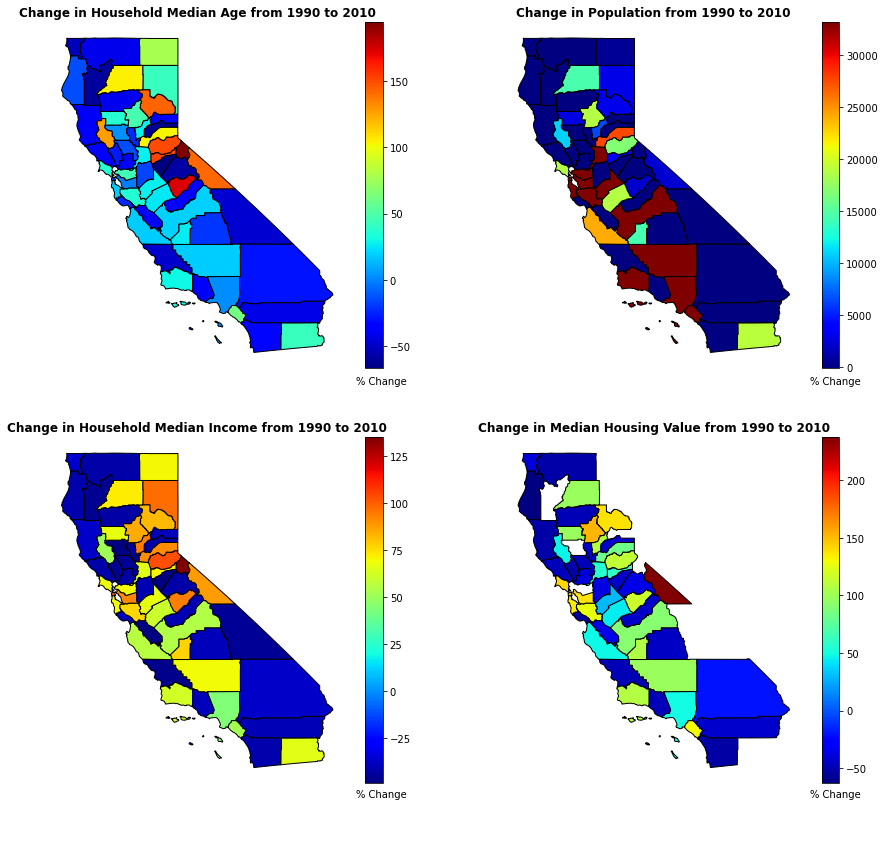

In [401]:
geo_cali_change = pd.merge(cali, perc_change, left_index=True, right_index=True)

fig, ([ax1, ax2], [ax3, ax4]) = pyplot.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(15,14))
geo_cali_change.plot(
    ax=ax1, edgecolor='black', column='Percentage Change in Age', legend=True, cmap='jet',
    vmin=(geo_cali_change['Percentage Change in Age']).min(),
    vmax=(geo_cali_change['Percentage Change in Age']).max()
)
ax1.annotate('% Change',xy=(0.33, 0.47),  xycoords='figure fraction')
ax1.set_title('Change in Household Median Age from 1990 to 2010', fontsize= 12, fontweight='bold')


geo_cali_change.plot(
    ax=ax2, edgecolor='black', column='Percentage Change in Population', legend=True, cmap='jet',
    vmin= (geo_cali_change['Percentage Change in Population']).min(),
    vmax=((geo_cali_change['Percentage Change in Population'].quantile(0.8)).round(2)
))
ax2.annotate('% Change',xy=(0.75, 0.47),  xycoords='figure fraction')
ax2.set_title('Change in Population from 1990 to 2010', fontsize= 12, fontweight='bold')


geo_cali_change.plot(
    ax=ax3, edgecolor='black', column='Percentage Change in Income', legend=True, cmap='jet',
    vmin=(geo_cali_change['Percentage Change in Income']).min(),
    vmax=(geo_cali_change['Percentage Change in Income']).max()
)
ax3.annotate('% Change',xy=(0.33, 0.06),  xycoords='figure fraction')
ax3.set_title('Change in Household Median Income from 1990 to 2010', fontsize= 12, fontweight='bold')


geo_cali_change.plot(
    ax=ax4, edgecolor='black', column='Percentage Change in House Value', legend=True, cmap='jet',
    vmin=(geo_cali_change['Percentage Change in House Value']).min(),
    vmax=(geo_cali_change['Percentage Change in House Value']).max()
)
ax4.annotate('% Change',xy=(0.75, 0.06),  xycoords='figure fraction')
ax4.set_title('Change in Median Housing Value from 1990 to 2010', fontsize= 12, fontweight='bold')


for i in [ax1, ax2, ax3, ax4]:
    i.axis('off')

We graphed and visualized how each variable changed from 1990 to 2010. Median Age increased highly in the northeast and central east side of the state. The population seemed to have significantly increased in some counties. We notice that counties that are adjacent to the next state (either Nevada or Arizona) or counties in the northwest of the state tended to have a low-no change in population in comparison to the other counties. Also, there is a weak tendency of counties around the coast (exempting with the north coast counties) to have a very high increase in population, as most of those counties had a population growth of over 30,000%. 

The majority of counties have a medium to high increase in median income, as we see most of these counties' median income increased by 50% or more. Counties located in the northwest and southeast of the state tended to have a negative or no change in income levels. Median Housing value followed a similar trend to median income when it comes to growth from 1990 to 2010. We see that usually counties that experienced growth in income levels also experienced growth in house values but by a smaller percentage. And counties that experience no or negative growth in income also experienced similar trends in the change in house values. We should note that we are missing values for some counties in median house value, which means that we cannot make these statements for all counties, only for the counties we have complete data on. 

<u> Urban vs Rural counties how they have changed <u>

In [30]:
urban_counties = ['Sacramento', 'San Joaquin', 'Contra Costa', 'San Francisco', 'Alameda', 'San Mateo', 'Santa Clara',
                 'Fresno', 'Ventura', 'Los Angeles', 'San Bernardino', 'Riverside', 'Orange', 'San Diego']
lst = []
for i in list(cali['NAME']):
    if i in urban_counties:
        lst.append('Urban')
    else:
        lst.append('Rural')
urban_rural_cali = cali 
urban_rural_cali['Area type'] = lst
urban_rural_cali.head()

,level_0,index,NAME,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,LSAD,ALAND,AWATER,geometry,Area type
0,0,0,Alameda,06,001,01675839,0500000US06001,06001,06,1914242789,212979931,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",Urban
1,1,1,Alpine,06,003,01675840,0500000US06003,06003,06,1912292633,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",Rural
2,2,2,Amador,06,005,01675841,0500000US06005,06005,06,1539933576,29470568,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",Rural
3,3,3,Butte,06,007,01675842,0500000US06007,06007,06,4238423343,105325812,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",Rural
4,4,4,Calaveras,06,009,01675885,0500000US06009,06009,06,2641820834,43806026,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",Rural


<u> RURAL AND URBAN COUNTY MAPS <u>

In [31]:
urban_counties = urban_rural_cali.loc[urban_rural_cali['Area type']== 'Urban']
rural_counties = urban_rural_cali.loc[urban_rural_cali['Area type']== 'Rural']
display(urban_counties.head())
display(rural_counties.head())

,level_0,index,NAME,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,LSAD,ALAND,AWATER,geometry,Area type
0,0,0,Alameda,06,001,01675839,0500000US06001,06001,06,1914242789,212979931,"POLYGON ((-122.33371 37.80980, -122.32357 37.8...",Urban
6,6,6,Contra Costa,06,013,01675903,0500000US06013,06013,06,1871930816,209819213,"POLYGON ((-122.42976 37.96540, -122.41536 37.9...",Urban
9,9,9,Fresno,06,019,00277274,0500000US06019,06019,06,15433177265,135374444,"POLYGON ((-120.65595 36.95283, -120.59057 36.9...",Urban
18,18,18,Los Angeles,06,037,00277283,0500000US06037,06037,06,10510651024,1794730436,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",Urban
29,29,29,Orange,06,059,00277294,0500000US06059,06059,06,2047702298,407606601,"POLYGON ((-118.11566 33.74292, -118.09197 33.7...",Urban


,level_0,index,NAME,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,LSAD,ALAND,AWATER,geometry,Area type
1,1,1,Alpine,06,003,01675840,0500000US06003,06003,06,1912292633,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",Rural
2,2,2,Amador,06,005,01675841,0500000US06005,06005,06,1539933576,29470568,"POLYGON ((-121.02751 38.50829, -121.02495 38.5...",Rural
3,3,3,Butte,06,007,01675842,0500000US06007,06007,06,4238423343,105325812,"POLYGON ((-122.06943 39.84053, -122.04487 39.8...",Rural
4,4,4,Calaveras,06,009,01675885,0500000US06009,06009,06,2641820834,43806026,"POLYGON ((-120.99234 38.22525, -120.97866 38.2...",Rural
5,5,5,Colusa,06,011,01675902,0500000US06011,06011,06,2980372757,14581043,"POLYGON ((-122.77672 39.37688, -122.75876 39.3...",Rural


We used the urban counties list that was collected before to seperate once again the counties into rural and urban dataframes, but this time with 2010 values. We then merged it again with cali to be able to map the state and color it in. 

In [214]:
urban_counties = ['Sacramento', 'San Joaquin', 'Contra Costa', 'San Francisco', 'Alameda', 'San Mateo', 'Santa Clara',
                 'Fresno', 'Ventura', 'Los Angeles', 'San Bernardino', 'Riverside', 'Orange', 'San Diego']
urb_coun = []
for i in list(perc_change['Counties']):
    if i in urban_counties:
        urb_coun.append('Urban')
    else:
        urb_coun.append('Rural')

        urban_rural_change = perc_change 
urban_rural_change['Area type'] = urb_coun

urban_counties_change = urban_rural_change.loc[urban_rural_change['Area type']== 'Urban']
rural_counties_change = urban_rural_change.loc[urban_rural_change['Area type']== 'Rural']
display(urban_counties_change.head())
display(rural_counties_change.head())

,Counties,Percentage Change in Age,Percentage Change in Income,Percentage Change in Population,Percentage Change in Population Density,Percentage Change in House Value,const,Area type
0,Alameda,-1.884222,92.280376,126608.075180,126610.598554,137.943401,1,Urban
6,Contra Costa,44.825000,69.074388,79866.976436,81592.084635,NaN,1,Urban
9,Fresno,19.436611,54.527133,75036.425266,16464.422308,90.945426,1,Urban
18,Los Angeles,2.018782,44.335032,661292.221814,236034.168331,49.398797,1,Urban
29,Orange,61.396322,51.992822,209638.271254,513268.235023,129.929850,1,Urban


,Counties,Percentage Change in Age,Percentage Change in Income,Percentage Change in Population,Percentage Change in Population Density,Percentage Change in House Value,const,Area type
1,Alpine,194.625000,134.679980,223.989218,156.419063,NaN,1,Rural
2,Amador,151.948244,70.493733,3363.670562,9433.649005,60.893083,1,Rural
3,Butte,47.313501,84.835341,18879.885790,11730.176659,151.651265,1,Rural
4,Calaveras,-66.936215,-48.766633,-97.774009,-98.025090,-43.554642,1,Rural
5,Colusa,2.930267,-48.820738,-95.252112,-92.433483,NaN,1,Rural


We then seperated our perc_change dataframe (that had the change in each variable by county) into urban and rural county dataframes. 

In [33]:
geo_urban_counties_change = pd.merge(cali, urban_counties_change, left_index=True, right_index=True)
geo_rural_counties_change = pd.merge(cali, rural_counties_change, left_index=True, right_index=True)

Text(0.5, 1.0, 'Percentage change in Median Age in Rural counties \n in California between 1990 and 2010')

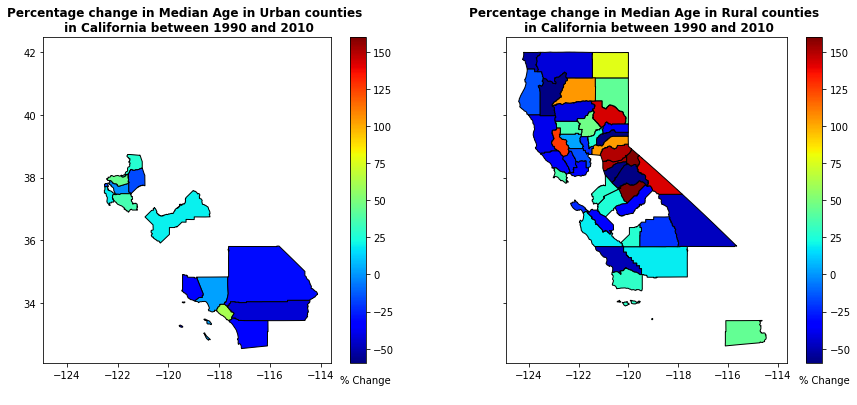

In [331]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(15, 6))
geo_urban_counties_change.plot(
    ax=ax1, edgecolor='black', column='Percentage Change in Age', legend=True, cmap='jet',
    vmin=-60, vmax=160)
ax1.annotate('% Change',xy=(0.315, 0.05),  xycoords='figure fraction')
ax1.set_title('Percentage change in Median Age in Urban counties \n in California between 1990 and 2010', 
              fontsize= 12, fontweight='bold')

geo_rural_counties_change.plot(
    ax=ax2, edgecolor='black', column='Percentage Change in Age', legend=True, cmap='jet',
    vmin=-60, vmax=160)
ax2.annotate('% Change',xy=(0.74, 0.05),  xycoords='figure fraction')
ax2.set_title('Percentage change in Median Age in Rural counties \n in California between 1990 and 2010', 
              fontsize= 12, fontweight='bold')

We created two maps based on the data frames urban_counties_change and rural_counties_change where it mapped each county in California but separated into urban and rural counties. We then color-coded each county depending on the percentage change they had in Median age from 1990 to 2010. Urban counties tended to stay relatively constant overall in median age, while having their largest growth in age being around the north-west urban counties, but even those counties experienced relatively mild growth in comparison to the whole state. On the other hand, rural counties experienced a variety of growth in terms of median age. north-eastern counties tended to experience the highest increase in median age in California, as most counties experienced growth rates of 75% or higher from 1990to 2010, which shows an aging population in these counties. While the rest of the rural counties tended to have relatively mild to no increase in median age, as most of the other rural counties experienced a 0%-30% increase in median age. However, that could be due to the global (and national) aging population. 

Text(0.5, 1.0, 'Percentage change in Median Income in Rural counties \n in California between 1990 and 2010')

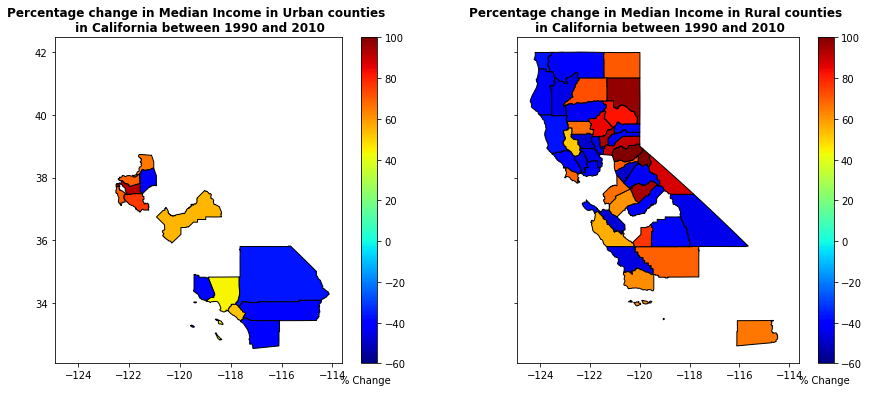

In [346]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(15, 6))
geo_urban_counties_change.plot(
    ax=ax1, edgecolor='black', column='Percentage Change in Income', legend=True, cmap='jet',
    vmin=-60, vmax=100)
ax1.annotate('% Change',xy=(0.315, 0.05),  xycoords='figure fraction')
ax1.set_title('Percentage change in Median Income in Urban counties \n in California between 1990 and 2010', 
              fontsize= 12, fontweight='bold')

geo_rural_counties_change.plot(
    ax=ax2, edgecolor='black', column='Percentage Change in Income', legend=True, cmap='jet',
    vmin=-60, vmax=100)
ax2.annotate('% Change',xy=(0.74, 0.05),  xycoords='figure fraction')
ax2.set_title('Percentage change in Median Income in Rural counties \n in California between 1990 and 2010', 
              fontsize= 12, fontweight='bold')

In the two maps, where we separated California counties by rural and urban and then color-coded them by the percentage change in Median income from 1990 to 2010, we notice that urban counties experience two different growth rates depending on the location of the county. Mid-west counties experienced high growths in income, except for one county, all mid-west counties experienced, at least a 50% median income growth since 1990. However, the urban counties located in the south of the state mostly experienced a negative change in median income. This could be because of median age falling in these counties, hence less-experienced workers lead to lower salaries. Another explanation for this is the decrease in population that we will see in the next graph. 

Rural counties had a very dispersed experience. They either experienced exceptionally high growth in median income (50% or higher) or experienced a negative change in median income. the drastic different effects in rural counties was experienced throughout all the state and was not centered at any particular location, with an exception of above-average rural counties in the north-east of the state experienced high growth rates in income. This could be because of median age increasing, meaning more experienced and skillful workers, which would lead to higher wages. Rural counties that experienced lofty increases in income were also the counties that were adjacent to urban counties, which would explain the growth as the urbanization of counties and growth of suburbs around cities and urban areas would attract high-income people as job opportunities and quality of life improves, which would lead to a migration of skilled workers / 

Text(0.5, 1.0, 'Percentage change in Population in Rural counties \n in California between 1990 and 2010')

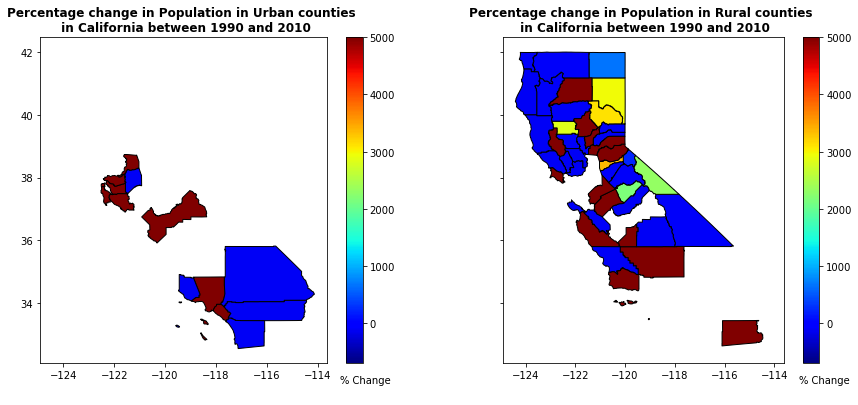

In [345]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(15, 6))
geo_urban_counties_change.plot(
    ax=ax1, edgecolor='black', column='Percentage Change in Population', legend=True, cmap='jet',
    vmin=-700, vmax=5000)
ax1.annotate('% Change',xy=(0.315, 0.05),  xycoords='figure fraction')
ax1.set_title('Percentage change in Population in Urban counties \n in California between 1990 and 2010', 
              fontsize= 12, fontweight='bold')

geo_rural_counties_change.plot(
    ax=ax2, edgecolor='black', column='Percentage Change in Population', legend=True, cmap='jet',
    vmin=-700, vmax=5000)
ax2.annotate('% Change', xy=(0.74, 0.05),  xycoords='figure fraction')
ax2.set_title('Percentage change in Population in Rural counties \n in California between 1990 and 2010', 
              fontsize= 12, fontweight='bold')

We mapped the counties in California into two different maps: urban counties and rural counties. In each map, we color-coded each county depending on the percent change they had in population from 1990 to 2010. If we'd merge these two maps, laying on top of each other, we would have a complete map of California. As we can see, the majority of urban counties had an exceptionally large increase in population in comparison to other counties, with most of the counties experiencing a population growth of over 5000% from 1990 to 2010. Most of these counties reside in the mid-west of the state, residing onto the coast. While in southern urban counties, most of them experienced little to no growth in population.  Rural areas experienced a variety of growth rates. Most counties that were surrounded, or around urban counties experienced substantial growth in population in comparison to the other counties, while most counties that were not adjacent to an urban county tended to have little to no growth rate in population throughout the years.

Text(0.5, 1.0, 'Percentage change in Median House Value in Rural counties \n in California between 1990 and 2010')

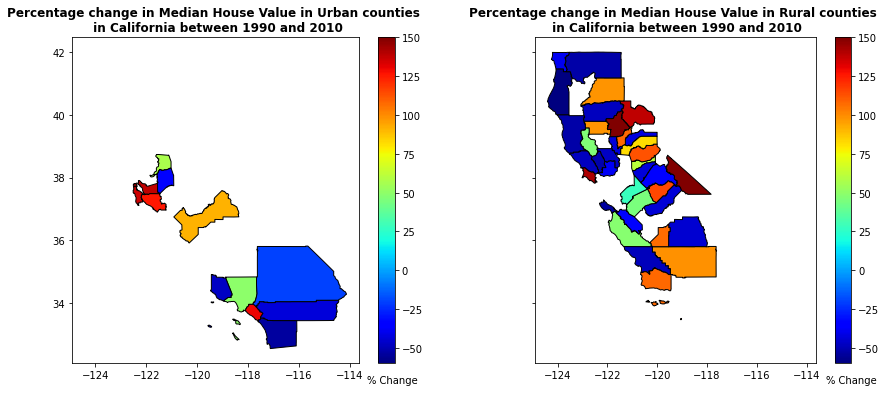

In [350]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(15, 6))
geo_urban_counties_change.plot(
    ax=ax1, edgecolor='black', column='Percentage Change in House Value', legend=True, cmap='jet',
    vmin=-60, vmax=150)
ax1.annotate('% Change',xy=(0.34, 0.05),  xycoords='figure fraction')
ax1.set_title('Percentage change in Median House Value in Urban counties \n in California between 1990 and 2010', 
              fontsize= 12, fontweight='bold')

geo_rural_counties_change.plot(
    ax=ax2, edgecolor='black', column='Percentage Change in House Value', legend=True, cmap='jet',
    vmin=-60, vmax=150)
ax2.annotate('% Change',xy=(0.765, 0.05),  xycoords='figure fraction')
ax2.set_title('Percentage change in Median House Value in Rural counties \n in California between 1990 and 2010', 
              fontsize= 12, fontweight='bold')

Mapped urban and rural counties into two separate maps, and then color-coded them depending on the degree of change they had in median house prices. We see that urban counties have a similar trend to change in median income in urban counties but to a smaller magnitude. We see that north-west urban counties tend to have one of the highest increases in house value, while south urban counties tend to have negative or no change in median house value. We also see rural counties' median house value have similar trends in change with median income but with a smaller magnitude as we see rural counties that are adjacent to urban counties tend to have high increases in median house value while the other rural counties experience negative growth in median house value.

<u> OBSERVATIONS AND ANALYSIS URBAN AND RURAL COUNTIES CHANGES AND TRENDS <u>

We see that Median Age increased highly in the northeast and central east side of the state while urban counties tended to stay relatively constant overall in median age, while having their largest growth in age being around the north-west urban counties, but even those counties experienced relatively mild growth in comparison to the whole state. On the other hand, rural counties experienced a variety of growth in terms of median age, where north-eastern counties tended to experience the highest increase in median age in California, as most counties experienced growth rates of 75% or higher from 1990to 2010, which shows an aging population in these counties. While the rest of the rural counties tended to have relatively mild to no increase in median age, as most of the other rural counties experienced a 0%-30% increase in median age, however, that could be due to the global (and national) aging population. The change in median age is a sign of the efficiency of urbanization policies since if policymakers are focusing on policies to promote urbanization, younger generations positive force in the development of knowledge and opportunities as they enter the labor market. Younger generations would contribute to economic growth and innovation which would lead to the urbanization of these areas. Younger generations would also have an incentive to move to urban counties due to higher demand for labor, higher demand for skilled workers, and opportunity for higher income as policies is focused on stimulating urban counties and rural counties that surround urban counties which promote and increase economic activity in selected rural counties. Younger generations would be more incentivized to move due to the permanent income hypothesis where urban counties that offer higher income allow individuals to consume at a higher consistent level in the long run, while older generations have already established their consumption levels and do not value future consumption as high as younger generations. 

The population had significantly increased in some counties. We notice that counties that are adjacent to the next state (either Nevada or Arizona) or counties in the northwest of the state tended to have a low-no change in population in comparison to the other counties. Also, there is a weak tendency of counties around the coast (exempting the north coast counties) to have a very high increase in population, as most of those counties had a population growth of over 30,000%. This is evidence of urbanization policies and inclusionary zoning in the housing market in counties that are considered suburbs of counties with high economic activity. We notice most urban counties had an exceptionally large increase in population in comparison to other counties, with most of the counties experiencing a population growth of over 5000% from 1990 to 2010. Most of these counties reside in the mid-west of the state, residing onto the coast. While most southern urban counties experienced little to no growth in population. Rural areas experienced a variety of growth rates. Most counties that were surrounded, or around urban counties experienced substantial growth in population in comparison to the other counties, while most counties that were not adjacent to an urban county tended to have little to no growth rate in population throughout the years. This is evidence of urbanization taking effect as the popularity of urban counties and suburbs surrounding cities have experienced a notorious increase in population. These results are consistent with the change in median age since urban and suburban counties offer various incentives for young generations to live in their area, it was expected that an influx of population since the stimulating economy and investment in certain areas would increase demand for labor, and to meet this demand, firms would offer higher wages which would incentivize individuals to migrate where they can obtain higher wages. Hence counties, where economic activity was centralized, tended to experience to have a younger population as well as a significant inflow of people migrating into the count. These changes in population size and age would result in a growth in economic activity since there is an increase in labor and innovation which would lead to higher output levels at a more efficient rate. However, there would be an opposite effect on rural counties as we would see an aging population where economic activity and policies were not focused on, which would lead to a decrease in standards of living in these areas as well as a decrease in economic growth due to lack of innovation and decrease in labor supply since more workers are retiring. This would become an incentive for individuals to move out of rural counties and move to urban or developing into urban counties to obtain a high standard of living. 

We observe that more than half of all counties experienced medium to high increases in median income, with most of those counties' median income increased by 50% or morE. Counties located in the northwest and southeast of the state tended to have a negative or no change in income levels. Median Housing value followed a similar trend to median income when it comes to growth from 1990 to 2010. We see that usually counties that experienced growth in income levels also experienced growth in house values but by a smaller percentage. Counties that experience negative to no growth in income also experienced similar trends in the change in house values. We should note that we are missing values for some counties in median house value, which means that we cannot make these statements for all counties, only for the counties we have complete data on. We observe that mid-west counties experienced high growths in income. Except for one county, all mid-west counties experienced, at least a 50% median income growth since 1990. However, urban counties located in the south of the state mostly experienced a negative change in median income. This could be because of median age falling in these counties, hence less demand for labor and lack of innovation leads to lower wages, and the decrease in population and its effects discussed before. 

Rural counties had a very dispersed experience, they either experienced exceptionally high growth in median income (50% or higher) or experienced a negative change in median income. The drastic difference in effects across rural counties was experienced throughout the state and was not centered at any location, except for above-average rural counties in the northeast of the state that experienced high growth rates in income. This could be because of median age increasing, meaning more experienced and skillful workers, which would lead to higher wages. Rural counties that experienced lofty increases in income were also the counties that were adjacent to urban counties, which would explain the growth as the urbanization of counties and growth of suburbs around cities and urban areas would attract high-income people as job opportunities and quality of life improves, which would lead to a migration of skilled workers and the general population. We see that mid-west urban counties tend to have one of the highest increases in house value, while south urban counties tend to have negative or no change in median house value. We also see rural counties' median house value have similar trends in change with median income but with a smaller magnitude as we see rural counties that are adjacent to urban counties tend to have high increases in median house value while the other rural counties experience negative growth in median house value.


<u> PREDICITING, CORRELATION AND REGRESSION MODELS <u>

In [35]:
web_url = 'https://sv08data.dot.ca.gov/contractcost/map.html'
response = requests.get(web_url)
soup_object = BeautifulSoup(response.content)
data_table = soup_object.find_all('div', id="cotbl")[0]
all_values = data_table.find_all('tr')
cali_abbr = pd.DataFrame(columns = ['Counties', 'District', 'Abbreveation'])
ix = 0 

for row in all_values[1:]:
    values = row.find_all('td')
    county = values[0].text.strip()
    dist = values[1].text.strip()
    abbre = values[2].text.strip()
    cali_abbr.loc[ix] = [county, dist, abbre]
    ix += 1
display(cali_abbr.head(8))

,Counties,District,Abbreveation
0,Alameda,4,ALA
1,Alpine,10,ALP
2,Amador,10,AMA
3,Butte,3,BUT
4,Calaveras,10,CAL
5,Colusa,3,COL
6,Contra Costa,4,CC
7,Del Norte,1,DN


Here we web scrapped the website https://sv08data.dot.ca.gov/contractcost/map.html to get the abbreveations and district code numbers for the counties. This will be useful when we visualize any scatter plots, we will be able to identify each county by their abbreveated three letter code which will make the plot more clear. 

In [36]:
u_abbre = []
r_abbre = []
for index, row in cali_abbr.iterrows():
    if (cali_abbr.loc[index])['Counties'] in list(urban_counties_change['Counties']):
        u_abbre.append((cali_abbr.loc[index])['Abbreveation'])
    else:
        r_abbre.append((cali_abbr.loc[index])['Abbreveation'])
urban_counties_change['Abbrev.'] = u_abbre
rural_counties_change['Abbrev.'] = r_abbre

display(urban_counties_change.head(3))
display(rural_counties_change.head(3))

,Counties,Percentage Change in Age,Percentage Change in Income,Percentage Change in Population,Percentage Change in Population Density,Percentage Change in House Value,Area type,Abbrev.
0,Alameda,-1.884222,92.280376,126608.075180,126610.598554,137.943401,Urban,ALA
6,Contra Costa,44.825000,69.074388,79866.976436,81592.084635,NaN,Urban,CC
9,Fresno,19.436611,54.527133,75036.425266,16464.422308,90.945426,Urban,FRE


,Counties,Percentage Change in Age,Percentage Change in Income,Percentage Change in Population,Percentage Change in Population Density,Percentage Change in House Value,Area type,Abbrev.
1,Alpine,194.625000,134.679980,223.989218,156.419063,NaN,Rural,ALP
2,Amador,151.948244,70.493733,3363.670562,9433.649005,60.893083,Rural,AMA
3,Butte,47.313501,84.835341,18879.885790,11730.176659,151.651265,Rural,BUT


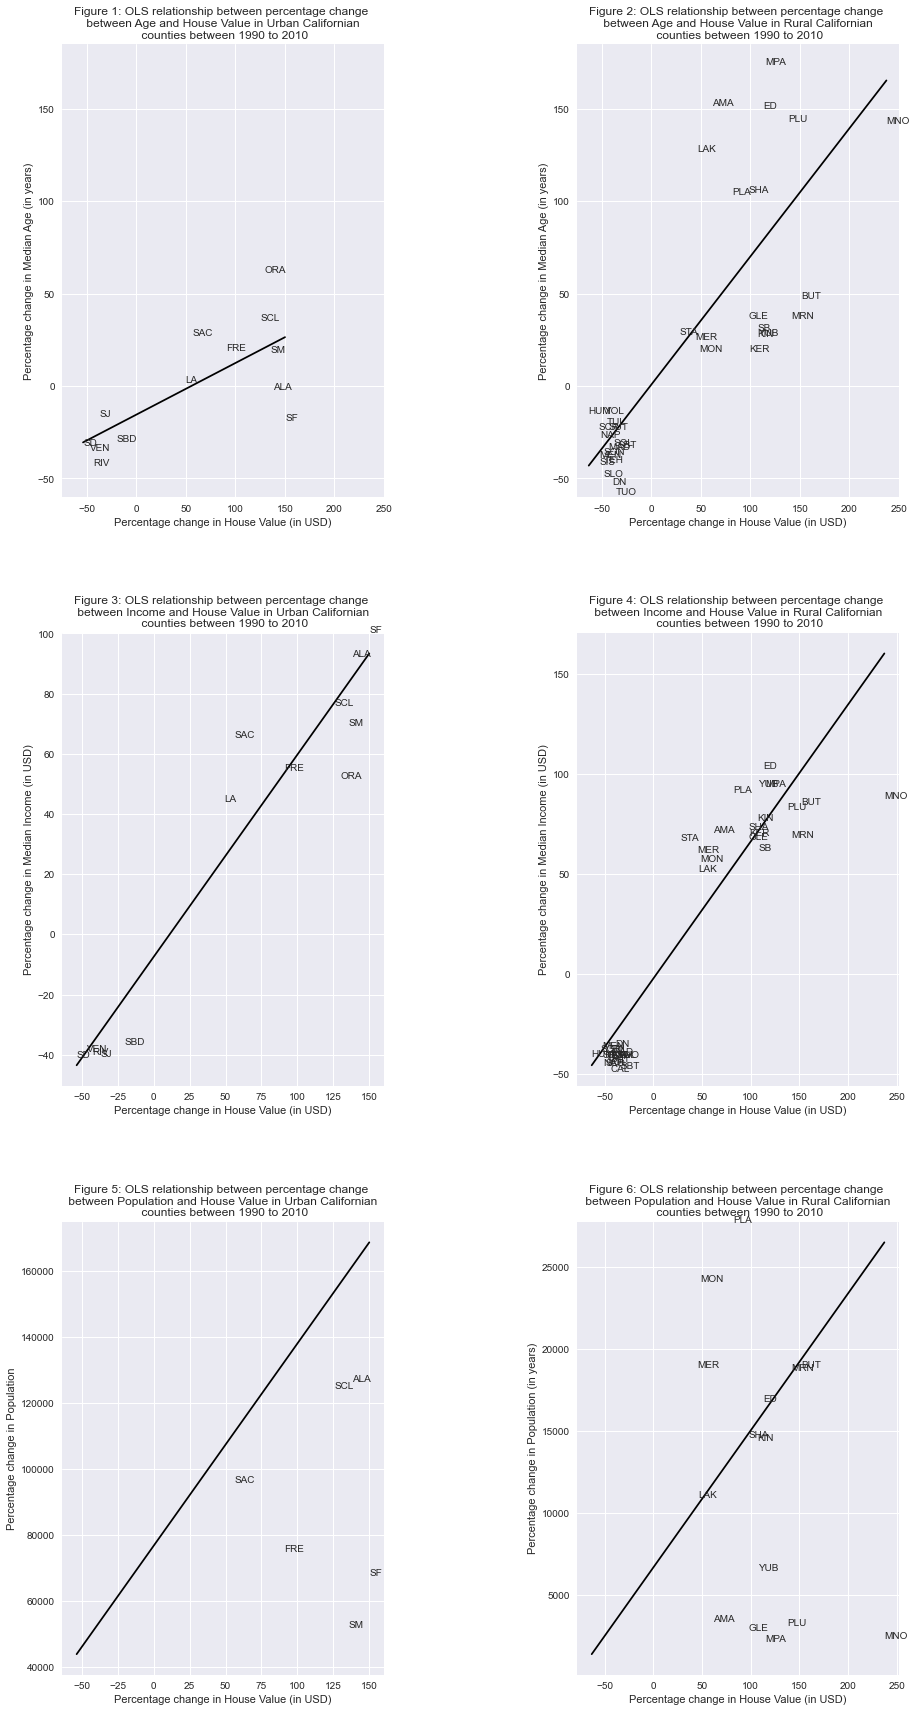

In [288]:
df1_subset = urban_counties_change.dropna(subset=['Percentage Change in House Value', 'Percentage Change in Age', 
                                                  'Percentage Change in Income', 'Percentage Change in Population'])
df2_subset = rural_counties_change.dropna(subset=['Percentage Change in House Value', 'Percentage Change in Age', 
                                                  'Percentage Change in Income', 'Percentage Change in Population'])
X_1 = df1_subset['Percentage Change in House Value']
X_2 = df2_subset['Percentage Change in House Value']
y = df1_subset['Percentage Change in Age']
labels_1 = df1_subset['Abbrev.']
labels_2 = df2_subset['Abbrev.']

fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(15,30))
ax.scatter(X, y, marker='')

for i, label_1 in enumerate(labels_1):
    ax1.annotate(label_1, (X_1.iloc[i], y.iloc[i]))
ax1.plot(np.unique(X_1),
         np.poly1d(np.polyfit(X_1, y, 1))(np.unique(X_1)),
         color='black')
ax1.set_xlim([-75,250])
ax1.set_ylim([-60,185])
ax1.set_xlabel('Percentage change in House Value (in USD)')
ax1.set_ylabel('Percentage change in Median Age (in years)')
ax1.set_title('Figure 1: OLS relationship between percentage change \n between Age and House Value in Urban Californian \n counties between 1990 to 2010')

y = df2_subset['Percentage Change in Age']
for i, label_2 in enumerate(labels_2):
    ax2.annotate(label_2, (X_2.iloc[i], y.iloc[i]))
ax2.plot(np.unique(X_2),
         np.poly1d(np.polyfit(X_2, y, 1))(np.unique(X_2)),
         color='black')
ax2.set_xlim([-75,250])
ax2.set_ylim([-60,185])
ax2.set_xlabel('Percentage change in House Value (in USD)')
ax2.set_ylabel('Percentage change in Median Age (in years)')
ax2.set_title('Figure 2: OLS relationship between percentage change \n between Age and House Value in Rural Californian \n counties between 1990 to 2010')

y = df1_subset['Percentage Change in Income']
for i, label_1 in enumerate(labels_1):
    ax3.annotate(label_1, (X_1.iloc[i], y.iloc[i]))
ax3.plot(np.unique(X_1),
         np.poly1d(np.polyfit(X_1, y, 1))(np.unique(X_1)),
         color='black')
ax3.set_xlabel('Percentage change in House Value (in USD)')
ax3.set_ylabel('Percentage change in Median Income (in USD)')
ax3.set_title('Figure 3: OLS relationship between percentage change \n between Income and House Value in Urban Californian \n counties between 1990 to 2010')

y = df2_subset['Percentage Change in Income']
for i, label_2 in enumerate(labels_2):
    ax4.annotate(label_2, (X_2.iloc[i], y.iloc[i]))
ax4.plot(np.unique(X_2),
         np.poly1d(np.polyfit(X_2, y, 1))(np.unique(X_2)),
         color='black')
ax4.set_xlabel('Percentage change in House Value (in USD)')
ax4.set_ylabel('Percentage change in Median Income (in USD)')
ax4.set_title('Figure 4: OLS relationship between percentage change \n between Income and House Value in Rural Californian \n counties between 1990 to 2010')

y = df1_subset['Percentage Change in Population']
for i, label_1 in enumerate(labels_1):
    ax5.annotate(label_1, (X_1.iloc[i], y.iloc[i]))
ax5.plot(np.unique(X_1),
         np.poly1d(np.polyfit(X_1, y, 1))(np.unique(X_1)),
         color='black')
ax5.set_xlabel('Percentage change in House Value (in USD)')
ax5.set_ylabel('Percentage change in Population')
ax5.set_title('Figure 5: OLS relationship between percentage change \n between Population and House Value in Urban Californian \n counties between 1990 to 2010')

y = df2_subset['Percentage Change in Population']
for i, label_2 in enumerate(labels_2):
    ax6.annotate(label_2, (X_2.iloc[i], y.iloc[i]))
ax6.plot(np.unique(X_2),
         np.poly1d(np.polyfit(X_2, y, 1))(np.unique(X_2)),
         color='black')
ax6.set_xlabel('Percentage change in House Value (in USD)')
ax6.set_ylabel('Percentage change in Population (in years)')
ax6.set_title('Figure 6: OLS relationship between percentage change \n between Population and House Value in Rural Californian \n counties between 1990 to 2010')

fig.subplots_adjust(hspace = 0.3, wspace = 0.6)

These graphs identifies each county by its abbreveation and plots them in a scatter graph that depicts the relationship between median house value and a variable that we are studying. this allows us to identify which counties experience different types of changes.

In [37]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

<b>REGRESSION MODELS <b>

<u> OLS REGRESSION MODELS <u>

We are trying to create a regression model that can best depict the relationship between house value and age, population, and/or age. We want a model that optimizes precision from our data and can be used as a good estimate for house value. Due to our preliminary findings, we argued that income is an important factor for median house value in a county, while age and population are weaker factors in determining house value. Since we discovered that age is an important factor in urbanization since it promotes innovation, higher education, and more efficient workers, which all contribute to higher economic growth. Although, age is a factor that does not directly affect house value as much, but rather its contribution to economic growth has a ‘domino effect’ on increases in income levels, economic activities, and other factors that do affect houses value and the housing market. Therefore age may be considered an intermediate factor. Meanwhile, the population has a weak negative correlation to house value, which is almost a null relationship. Therefore, to keep population as a factor to consider since it does affect house value, especially in urbanizing counties, and to have a bigger emphasis on income, we will replace the population factor for income per capita in our regression models. This will allow for the population to still be considered in a way it can be more of a determining factor rather. We believe changing these terms will be a more accurate regression equation.

For the following regression models, we will use the standard equation 

$$
{MedianHouseValue}_i = \beta_0 + \beta_1·{ MedianAge}_i + \beta_2·{MedianIncome}_i + \beta_3· (\frac{MedianIncome_i}{Population_i})
$$

which is equivalent to

$$
{MedianHouseValue}_i = \beta_0 + \beta_1·{ MedianAge}_i + \beta_2·{MedianIncome}_i + \beta_3·{IncomePerCapita}_i
$$

for our regression models. These variables may change within each model depeding on the dataframe being used. We should note the following notation
- $\beta_0 = $ is the intercept of the linear trend line on the y-axis  
- $\beta_1 = $ is the slope of the linear trend line, representing the marginal effect of median age in years
- $\beta_2 = $ is the slope of the linear trend line, representing the marginal effect of median income in USD
- $\beta_3 = $ is the slope of the linear trend line, representing the marginal effect of income per capita


<u> PERCENTAGE CHANGE OLS SLR<u>

In [705]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

df_1_1 = perc_change
df_1_2 = rural_counties_change
df_1_3 = urban_counties_change

df_1_1['Percentage Change in per capita Income'] = df_1_1['Percentage Change in Income'] / df_1_1['Percentage Change in Population']
df_1_2['Percentage Change in per capita Income'] = df_1_2['Percentage Change in Income'] / df_1_2['Percentage Change in Population']
df_1_3['Percentage Change in per capita Income'] = df_1_3['Percentage Change in Income'] / df_1_3['Percentage Change in Population']

df_1_1['const'] = 1
df_1_2['const'] = 1
df_1_3['const'] = 1

X1 = ['Percentage Change in Age', 'const']
X2 = ['Percentage Change in per capita Income', 'const']
X3 = ['Percentage Change in Income', 'const']
X4 = ['Percentage Change in Age', 'Percentage Change in Income', 'const']
X5 = ['Percentage Change in Age', 'Percentage Change in per capita Income', 'const']
X6 = ['Percentage Change in per capita Income', 'Percentage Change in Income', 'const']
X7 = ['Percentage Change in Age', 'Percentage Change in Income', 'Percentage Change in per capita Income', 'const']

In [621]:
reg1_1 = sm.OLS(df_1_1['Percentage Change in House Value'], df_1_1[X1], missing='drop').fit()
reg1_2 = sm.OLS(df_1_1['Percentage Change in House Value'], df_1_1[X2], missing='drop').fit()
reg1_3 = sm.OLS(df_1_1['Percentage Change in House Value'], df_1_1[X3], missing='drop').fit()
reg1_4 = sm.OLS(df_1_1['Percentage Change in House Value'], df_1_1[X4], missing='drop').fit()
reg1_5 = sm.OLS(df_1_1['Percentage Change in House Value'], df_1_1[X5], missing='drop').fit()
reg1_6 = sm.OLS(df_1_1['Percentage Change in House Value'], df_1_1[X6], missing='drop').fit()
reg1_7 = sm.OLS(df_1_1['Percentage Change in House Value'], df_1_1[X7], missing='drop').fit()

results_table = summary_col(results=[reg1_1,reg1_2,reg1_3, reg1_4, reg1_5, reg1_6, reg1_7],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'],
                            info_dict=info_dict, 
                            regressor_order=['const', 'Percentage Change in Age', 'Percentage Change in Income',
                                             'Percentage Change in per capita Income'])

results_table.add_title('Table 1 - OLS Regressions for percentage change in all Californian \ncounties median house value')
print(results_table)

  Table 1 - OLS Regressions for percentage change in all Californian 
counties median house value
                                       Model 1  Model 2   Model 3 Model 4  Model 5   Model 6 Model 7
----------------------------------------------------------------------------------------------------
const                                  20.67** 105.34***  8.93**  8.92**  94.84***   -16.23  -17.10 
                                       (8.37)  (7.15)     (4.32)  (4.37)  (9.94)     (23.92) (24.47)
Percentage Change in Age               0.93***                    -0.01   0.18               -0.02  
                                       (0.13)                     (0.10)  (0.12)             (0.11) 
Percentage Change in Income                               1.30*** 1.30***            1.62*** 1.65***
                                                          (0.07)  (0.11)             (0.31)  (0.34) 
Percentage Change in per capita Income         -351.77***                 -312.48*** 93.37   9

Here we are studying seven different OLS regression models on percentage change in Californian counties median house value. All the models represent all possible unique combinations between the variables income, income per capita and age. From Table 1, we will first focus on the highest $R^2$ (R-squared) valued model since the higher the value, the more variation in our dependent variables is explained by the independent variable, hence indicating a more useful and applicable model. Therefore, we see that Model 3, Model 6, and Model 7 all have the same $R^2$ values at 0.88, however, only Model 3 has all its variables being statistically significant by having a p-value below 0.05 in all variables. Additionally, Model 3 has the highest value for adjusted $R^2$, which makes it more evident that out of these models, Model 3 is the most applicable to our data. Hence the equation for the relationship of percentage change in median house prices is 
$$
{\% \Delta MedianHouseValue}_i = \beta_0 + \beta_2·{\%\Delta MedianIncome}_i
$$
which is a linear regression line

In [367]:
print(reg1_3.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Percentage Change in House Value   R-squared:                       0.880
Model:                                          OLS   Adj. R-squared:                  0.877
Method:                               Least Squares   F-statistic:                     344.1
Date:                              Mon, 11 Apr 2022   Prob (F-statistic):           2.92e-23
Time:                                      17:08:15   Log-Likelihood:                -233.06
No. Observations:                                49   AIC:                             470.1
Df Residuals:                                    47   BIC:                             473.9
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                                  coef    std err          t      P>|t

From the OLS regression result for model 3, we see that:
- The intercept $ \hat{\beta}_0 =  1.2976$.    
- $ \hat{\beta}_2 = 8.9306 $.
- The R-squared value of 0.880 indicates that around 88% of variation
  in percentage change in median house value is explained by percentage change in median income.



Using our parameter estimates between the percentage change between our housing prices and median income across California from 1990 to 2010 as

$$
\widehat{\% \Delta MedianHouseValue}_i = 1.2976 + 8.9306·{\%\Delta MedianIncome}_i
$$

Hence for every percentage median income increases, median house value increases by 8.9306 \%. Since the change in income is a majority component of the $\% \Delta MedianHouseValue$, the linear regreassion equation above is a good estimator for ${\% \Delta MedianHouseValue}_i$. We see that AIC value has a value of around 470 which taking into account that the difference between the highest value in our data we used to fit this regression model and the lowest value is around 649914.3, we consider this AIC value to be low, therefore interpreting the model to be a good fit. The same criteria can be used for BIC which had a value of 473.9. Since the change in income is a majority component of the percentage change in median house value and we have a adjusted R2 value of 0.877, this model estimate is considered a good fit. 

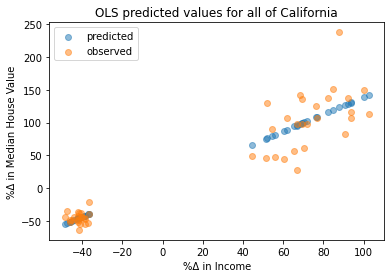

In [707]:
df1_subset = df_1_1.dropna(subset=['Percentage Change in Income', 'Percentage Change in House Value'])
mean_inc = np.mean(df1_subset['Percentage Change in Income'])


df1_plot = df_1_1.dropna(subset=['Percentage Change in House Value', 'Percentage Change in Income'])

fix, ax = plt.subplots()
ax.scatter(df1_plot['Percentage Change in Income'], reg1_3.predict(), alpha=0.5,
        label='predicted')

ax.scatter(df1_plot['Percentage Change in Income'], df1_plot['Percentage Change in House Value'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values for all of California')
ax.set_xlabel('%\u0394 in Income')
ax.set_ylabel('%\u0394 in Median House Value')
plt.show()

This allows us to understand the visualize the error of our linea regression model in comparisson to the real data. Will be used to predict future Californian Houisng prices.

We see from the graph that there seem to be two vastly different market shocks that different Californian counties would experience, where they either in the next two decades experience a negative change in income (between -30% to -45% change) and house value (between -25% to -55% change) or counties experience significantly positive shocks in the market usually having an increase in income (between 40% to 105%) as well as a positive shock in house value (between 60% to 145%). This would be a result of persisting policies and focus on urbanization and the development of suburbs that would further grow urban and urbanizing areas in terms of population and economic power. 

<u> Rural percentage change regression models<u>

In [377]:
reg2_1 = sm.OLS(df_1_2['Percentage Change in House Value'], df_1_2[X1], missing='drop').fit()
reg2_2 = sm.OLS(df_1_2['Percentage Change in House Value'], df_1_2[X2], missing='drop').fit()
reg2_3 = sm.OLS(df_1_2['Percentage Change in House Value'], df_1_2[X3], missing='drop').fit()
reg2_4 = sm.OLS(df_1_2['Percentage Change in House Value'], df_1_2[X4], missing='drop').fit()
reg2_5 = sm.OLS(df_1_2['Percentage Change in House Value'], df_1_2[X5], missing='drop').fit()
reg2_6 = sm.OLS(df_1_2['Percentage Change in House Value'], df_1_2[X6], missing='drop').fit()
reg2_7 = sm.OLS(df_1_2['Percentage Change in House Value'], df_1_2[X7], missing='drop').fit()

results_table = summary_col(results=[reg2_1,reg2_2,reg2_3, reg2_4,reg2_5,reg2_6, reg2_7],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'],
                            info_dict=info_dict, 
                            regressor_order=['const', 'Percentage Change in Age', 'Percentage Change in Income',
                                             'Percentage Change in in per capita Income'])

results_table.add_title('Table 2 - OLS Regressions for percentage change in rural \nCalifornian counties median house value')
print(results_table)

  Table 2 - OLS Regressions for percentage change in rural 
Californian counties median house value
                                       Model 1  Model 2   Model 3 Model 4  Model 5   Model 6  Model 7 
------------------------------------------------------------------------------------------------------
const                                  9.29    103.35***  6.80    6.65    81.34***   -49.76   -51.72  
                                       (8.71)  (9.16)     (5.25)  (5.34)  (14.26)    (32.42)  (34.26) 
Percentage Change in Age               0.92***                    0.04    0.28*               -0.03   
                                       (0.12)                     (0.14)  (0.14)              (0.14)  
Percentage Change in Income                               1.27*** 1.22***            1.97***  2.02*** 
                                                          (0.08)  (0.16)             (0.41)   (0.49)  
Percentage Change in per capita Income         -343.13***                 -2

Table 2 is studying the same 7 models as in Table 1 however, we are only studying these models based in the percentage change in rural counties in California from 1990 to 2010. As we can, the modles with the highest adjusted $R^2$ values are model 6 and model 7. Their adjusted $R^2$ values are 0.87 which means that these models indicates that around 87% of variation in change in median house value. However, both these models have constant p-values above 0.05, which means our intercept is statistically insignificant, hence at a significance level of 0.05 ($\alpha = 0.05$), we do not have enough evidence to assume that ${\beta}_0 \neq 0$ which in layman's terms means that there is not enough evidence that the regression line is different than a horizontal line. The next models with the highest adjusted $R^2$ values are model 3 and model 4, but we run the same issue by having statistically insignificant constant p-values. Hence we will use model 2 since its constant is statistically significant, as well as all the variables in that model. We should note that model 2 has an adjusted $R^2$ value of 0.79 which is still considered a good fit model. Below we printed the statitical summary of the OLS regression results from model 2.

In [378]:
print(reg2_2.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Percentage Change in House Value   R-squared:                       0.794
Model:                                          OLS   Adj. R-squared:                  0.787
Method:                               Least Squares   F-statistic:                     130.7
Date:                              Mon, 11 Apr 2022   Prob (F-statistic):           3.42e-13
Time:                                      17:35:37   Log-Likelihood:                -180.96
No. Observations:                                36   AIC:                             365.9
Df Residuals:                                    34   BIC:                             369.1
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                                             coef    std err          

Model 2 only has percentage change in per capita income as the variable. From the OLS regression result for model 2 from Table 2, we see that:
- The intercept $ \hat{\beta}_0 =  103.3543$.    
- $ \hat{\beta}_3 = -343.1275 $.
- Since $ \hat{\beta}_3 < 0$, we see that $\%\Delta$ Median income per capita and and $\%\Delta$ median house value have a negative relationship
- The R-squared value of 0.794 indicates that around 79.4% of variation
  in percentage change in median house value is explained by percentage change in median income per capita.


Using our parameter estimates between the percentage change between our housing prices and median income in rural counties in California from 1990 to 2010 as the linear regression line of

$$
\widehat{\% \Delta MedianHouseValue}_i = 103.3543 -343.1275·{\%\Delta IncomePerCapita}_i
$$

We can use this equation to predict the level of  $\% \Delta MedianHouseValue$ for a value of $\%\Delta IncomePerCapita$. Hence for every percent income per capita increases, median house value decreases by -343.1275 \%. Since we now that income per capita is just income divided by population, we can infer the correlation between population and house value. In this model, for the percentage change in median house value to increase, we need income per capita to decrease. Since income and house value have a positive correlation, then for this to happen, population must increase by more than income such that income per capita would decrease which would yield an increase in median house value. This means that population and median house value have a positive correlation of some degree. 

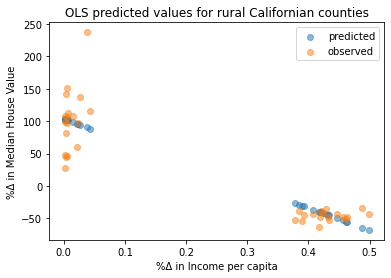

In [709]:
df2_subset = df_1_2.dropna(subset=['Percentage Change in Income', 'Percentage Change in House Value'])
mean_inc = np.mean(df2_subset['Percentage Change in Income'])


df2_plot = df_1_2.dropna(subset=['Percentage Change in House Value', 'Percentage Change in Income'])

fix, ax = plt.subplots()
ax.scatter(df2_plot['Percentage Change in per capita Income'], reg2_2.predict(), alpha=0.5,
        label='predicted')

ax.scatter(df2_plot['Percentage Change in per capita Income'], df2_plot['Percentage Change in House Value'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values for rural Californian counties')
ax.set_xlabel('%\u0394 in Income per capita')
ax.set_ylabel('%\u0394 in Median House Value')
plt.show()

This allows us to understand the visualize the error of our linea regression model in comparisson to the real data. We see that the predicted value is moderatly close to most observed values. 

This shows the predicted values for rural counties in median house value from 2010 to 2030. The re-allocation of economic activity to urban counties would occur at the cost of rural counties that do not benefit from the policies and hence the re-allocation of wealth, resources, population, and overall economic power. It would leave rural counties to be even more vulnerable to shocks in the economy as well as have a lower standard of living, hence widening the gap of inequality between counties. 

<u> Urban counties <u>

In [459]:
reg3_1 = sm.OLS(df_1_3['Percentage Change in House Value'], df_1_3[X1], missing='drop').fit()
reg3_2 = sm.OLS(df_1_3['Percentage Change in House Value'], df_1_3[X2], missing='drop').fit()
reg3_3 = sm.OLS(df_1_3['Percentage Change in House Value'], df_1_3[X3], missing='drop').fit()
reg3_4 = sm.OLS(df_1_3['Percentage Change in House Value'], df_1_3[X4], missing='drop').fit()
reg3_5 = sm.OLS(df_1_3['Percentage Change in House Value'], df_1_3[X5], missing='drop').fit()
reg3_6 = sm.OLS(df_1_3['Percentage Change in House Value'], df_1_3[X6], missing='drop').fit()
reg3_7 = sm.OLS(df_1_3['Percentage Change in House Value'], df_1_3[X7], missing='drop').fit()

results_table = summary_col(results=[reg3_1,reg3_2,reg3_3, reg3_4, reg3_5,reg3_6, reg3_7],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'],
                            info_dict=info_dict,
                            regressor_order=['const', 'Percentage Change in Age', 'Percentage Change in Income',
                                             'Percentage Change in Population'])

results_table.add_title('Table 3 - OLS Regressions for percentage change in Urban Californian  \n          counties median house value')

print(results_table)

Table 3 - OLS Regressions for percentage change in Urban Californian  
          counties median house value
                                       Model 1   Model 2   Model 3 Model 4  Model 5   Model 6  Model 7 
-------------------------------------------------------------------------------------------------------
const                                  53.79*** 109.89***  14.14*  18.03** 111.02***  18.06    -21.77  
                                       (16.50)  (11.17)    (7.33)  (7.84)  (14.57)    (33.89)  (40.48) 
Percentage Change in Age               1.85***                     0.35    -0.06               0.62    
                                       (0.54)                      (0.28)  (0.48)              (0.39)  
Percentage Change in Income                                1.38*** 1.25***            1.32**   1.74*** 
                                                           (0.12)  (0.16)             (0.47)   (0.51)  
Percentage Change in per capita Income          -380.17*** 

Similarly to Table 1 and Table 2, we plotted the same seven models with respect to urban counties percentage change. As done with the previous tables, we start by checking the adjusted $R^2$ values and we see that Model 3, Model 4, and Model 7 all have the highest values for adjusted $R^2$ at 0.92. However, Model 3 and Model 7 have statitscially insignificant constant p-values making $\beta_0$ also statistically insignificant, hence the y-intercept follows the same statistical inference. As previosuly discussed in during the quality of each model in Table 2, we cannot assume these two models since there is not enough evidence to assume that ${\beta}_0 \neq 0$. Although Model 4 does have a statistically signficant constant, we see that the coefficient for percentage change in age is statistically insignficiant, so we will try to avoid using that model. Model 6, which is the next highest adjusted $R^2$ value has the same issue as Model 3 and Model 7. Model 2 has an adjusted $R^2$ value of 0.85, with all its variables, and constant having statistically significant coefficients, hence we will use Model 2 as it will provide the most consisiten results. We should note that although we chose the model with the fourth highest adjusted $R^2$, 0.85 is considered a high value for $R^2$ and is generally considered a good fitted model. 

In [461]:
print(reg3_2.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Percentage Change in House Value   R-squared:                       0.863
Model:                                          OLS   Adj. R-squared:                  0.851
Method:                               Least Squares   F-statistic:                     69.54
Date:                              Mon, 11 Apr 2022   Prob (F-statistic):           4.39e-06
Time:                                      22:43:10   Log-Likelihood:                -62.234
No. Observations:                                13   AIC:                             128.5
Df Residuals:                                    11   BIC:                             129.6
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                                             coef    std err          

Model 2 only has percentage change in per capita income as the variable. From the OLS regression result for model 2 from Table 3, we see that:
- The intercept $ \hat{\beta}_0 =  109.8885$.    
- $ \hat{\beta}_3 = -380.1710 $.
- Since $ \hat{\beta}_3 < 0$, we see that $\%\Delta$ Median income per capita and and $\%\Delta$ median house value have a negative relationship
- The R-squared value of 0.863 indicates that around 86.3% of variation
  in percentage change in median house value is explained by percentage change in median income per capita.


Using our parameter estimates between the percentage change between our housing prices and median income in rural counties in California from 1990 to 2010 as a linear regression line of

$$
\widehat{\% \Delta MedianHouseValue}_i = 109.8885 -380.1710·{\%\Delta IncomePerCapita}_i
$$

We can use this equation to predict the level of  $\% \Delta MedianHouseValue$ for a value of $\%\Delta IncomePerCapita$. Hence for every percent income per capita increases, median house value decreases by -380.1710 \%. Since the best fit models for urban and rural counties are the same models with the same variables, this facilitates our analysis and comparison between the changes in either housing market. We see that urban counties have a larger y-intercept, which implies that if two counties, a rural and an urban county would both experience no change in income per capita, the urban county would experience a 6.5342% change more in their median house value than rural. Hence regardless of any changes in the condition of a county, urban counties were predisposed to experiencing a higher shock in the housing market than rural counties. 

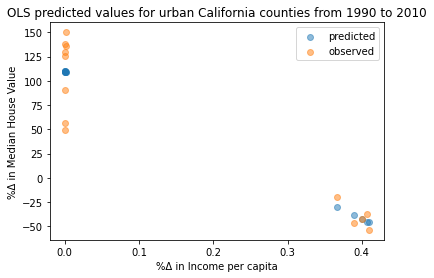

In [648]:
df3_subset = df_1_3.dropna(subset=['Percentage Change in Income', 'Percentage Change in House Value'])
mean_inc = np.mean(df3_subset['Percentage Change in Income'])


df3_plot = df_1_3.dropna(subset=['Percentage Change in House Value', 'Percentage Change in Income'])

fix, ax = plt.subplots()
ax.scatter(df3_plot['Percentage Change in per capita Income'], reg3_2.predict(), alpha=0.5,
        label='predicted')

ax.scatter(df3_plot['Percentage Change in per capita Income'], df3_plot['Percentage Change in House Value'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values for urban California counties from 1990 to 2010')
ax.set_xlabel('%\u0394 in Income per capita')
ax.set_ylabel('%\u0394 in Median House Value')
plt.show()

This allows us to understand the visualize the error of our linea regression model in comparisson to the real data. We see that the predicted value and observe value seems higher in urban linea regression model than the other regression models, especially for values $0 \leq \% \Delta Income per Capita \leq 0.1$ as we observe a large error in those bounds.

<u> REGRESSION MODELS FOR CALIFORNIA IN 1990 AND 2010<u>

In [484]:
df_2_1 = mc_counties
df_2_1['const'] = 1
df_2_1['Median per capita Income'] = df_2_1['Median Income (mean)'] / df_2_1['Population (mean)']

X1 = ['Median Age (mean)', 'const']
X2 = ['Median per capita Income', 'const']
X3 = ['Median Income (mean)', 'const']
X4 = ['Median Age (mean)', 'Median Income (mean)', 'const']
X5 = ['Median Age (mean)', 'Median per capita Income', 'const']
X6 = ['Median per capita Income', 'Median Income (mean)', 'const']
X7 = ['Median Age (mean)', 'Median Income (mean)', 'Median per capita Income', 'const']

reg1_1 = sm.OLS(df_2_1['Median House Value (mean)'], df_2_1[X1], missing='drop').fit()
reg1_2 = sm.OLS(df_2_1['Median House Value (mean)'], df_2_1[X2], missing='drop').fit()
reg1_3 = sm.OLS(df_2_1['Median House Value (mean)'], df_2_1[X3], missing='drop').fit()
reg1_4 = sm.OLS(df_2_1['Median House Value (mean)'], df_2_1[X4], missing='drop').fit()
reg1_5 = sm.OLS(df_2_1['Median House Value (mean)'], df_2_1[X5], missing='drop').fit()
reg1_6 = sm.OLS(df_2_1['Median House Value (mean)'], df_2_1[X6], missing='drop').fit()
reg1_7 = sm.OLS(df_2_1['Median House Value (mean)'], df_2_1[X7], missing='drop').fit()

results_table = summary_col(results=[reg1_1,reg1_2,reg1_3, reg1_4, reg1_5, reg1_6, reg1_7],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'],
                            info_dict=info_dict,
                            regressor_order=['const', 'Median Age (mean)', 'Median Income (mean)',
                                             'Median per capita Income'])

results_table.add_title('Table 4 - OLS Regressions for in all Californian counties median house value in 1990')
print(results_table)

               Table 4 - OLS Regressions for in all Californian counties median house value in 1990
                          Model 1     Model 2       Model 3       Model 4     Model 5      Model 6       Model 7   
-------------------------------------------------------------------------------------------------------------------
const                    6536.22    103585.60*** -125868.58*** -162093.01*** -50240.49  -134155.35*** -176366.65***
                         (42336.15) (30012.88)   (16151.69)    (20044.88)    (50422.17) (18479.69)    (22361.84)   
Median Age (mean)        5631.40***                            1987.18***    5885.49***               2124.82***   
                         (1659.71)                             (713.21)      (1624.17)                (714.07)     
Median Income (mean)                             8.46***       8.05***                  8.39***       7.92***      
                                                 (0.49)        (0.48)                   

Here we are studying seven different OLS regression models on Californian counties median house value in 1990. All the models represent all possible unique combinations between income per capita, age and income. From Table 4, we will first focus on the highest adjusted $R^2$ (R-squared) valued model since the higher the value, the more variation in our exogenous/dependent variables is explained by the endogenous/independent variable, hence indicating a more useful and applicable model. Therefore, we see that Model 4 and Model 7 have the same value for adjusted $R^2$ of 0.86. Nevertheless since Model 4 variables are all statistically signfiicant (all variables p-values are below 0.05), we will use Model 4 for our regression equation to be more accurate.
Hence the equation for the relationship of median house prices in 1990 is 

$$
{MedianHouseValue}_i = \beta_0 + \beta_1·{MedianAge}_i +\beta_2·{MedianIncome}_i
$$

Below we will print a more detailed summary of the regression model

In [506]:
print(reg1_4.summary())

                                OLS Regression Results                               
Dep. Variable:     Median House Value (mean)   R-squared:                       0.864
Model:                                   OLS   Adj. R-squared:                  0.859
Method:                        Least Squares   F-statistic:                     174.1
Date:                       Wed, 13 Apr 2022   Prob (F-statistic):           1.61e-24
Time:                               12:43:40   Log-Likelihood:                -677.14
No. Observations:                         58   AIC:                             1360.
Df Residuals:                             55   BIC:                             1366.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

We see that our conditional number is large which could indicate an issue for our regression model. 

In [503]:
log_df_2_1 = df_2_1.copy()
log_df_2_1 = log_df_2_1.dropna()
log_df_2_1['const'] = 1

variables_chng = ['Median Age (mean)', 'Median Income (mean)', 'Median House Value (mean)']

for col in list(variables_chng):
    if col in log_df_2_1:
        log_df_2_1[col] = np.log(log_df_2_1[col])

X = log_df_2_1[['Median Age (mean)', 'Median Income (mean)', 'const']]
Y = log_df_2_1['Median House Value (mean)']
reg1 = sm.OLS(endog= Y, exog= X, missing='drop')
results = reg1.fit()
print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     Median House Value (mean)   R-squared:                       0.854
Model:                                   OLS   Adj. R-squared:                  0.849
Method:                        Least Squares   F-statistic:                     161.2
Date:                       Tue, 12 Apr 2022   Prob (F-statistic):           9.94e-24
Time:                               00:34:39   Log-Likelihood:                 15.347
No. Observations:                         58   AIC:                            -24.69
Df Residuals:                             55   BIC:                            -18.51
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

We decided to use the natural logarithm for all variables from our model since otherwise our model runs the risk of having a conditional number which might indicate that there are strong multicollinearity or other numerical problems.

From the OLS regression result for log of model 4, we see that:
- The intercept $ \hat{\beta}_0 =  -7.4841$.  
- $ \hat{\beta}_1 = 0.0143 $.
- $ \hat{\beta}_2 = 1.8563 $.
- Since $ \hat{\beta}_1$ and $ \hat{\beta}_2$ is positive we see a positive correlation between Median income and Median age with median house value
- The R-squared value of 0.854 indicates that around 85.4% of variation
  in change in median house value is explained by median income and median age.


Using our parameter estimates, we can now write our estimated
relationship as 

$$
log(\widehat{MedianHouseValue}_i) = -7.4841 + 0.0143·log({MedianAge}_i) + 1.8563·log({MedianIncome}_i)
$$

Hence for one USD in $log$(median income increases), $log$(median house value increases) by 1.8563 USD and for every year \\ $log$(median age) increases by $log$(median house value) increases by 1.8563 USD. 

<u> ANALYSIS ON THE OLS REGRESSION MODELS <u>

According to our regression models for change in house value for urban and rural counties, income per capita has a negative correlation with house value. Assuming $\lvert \% Income Per Capita \rvert > 109.885$ for urban counties and for rural counties assuming $\lvert \% Income Per Capita \rvert > 103.3543$, when house value has a negative change, income per capita must be positive which can only occur if a change in income and population are both either positive or negative. However, we know that income and house value have a positive correlation hence when house value change in a county is negative, the change in income is also negative so for the change in per capita income to be positive, the population change must also be negative. Having said that, if house value would have experienced a positive shock which would have increased house value, income would have also increased, hence for income per capita to have decreased, the population must have decreased, hence a negative change in population. This indicates that the correlation between house value and the population is non-existent for rural and urban counties. We see that as long as  $\lvert \% Income Per Capita \rvert > 109.885$ for a urban counties or for a rural counties it is if $\lvert \% Income Per Capita \rvert > 103.3543$, the change in population must be negative regardless of the change in income or house value due to the positive strong correlation between house value and income. 

If an urban county experienced a $\lvert \% Income Per Capita \rvert \leq 109.885$ or a rural county saw a $\lvert \% Income Per Capita \rvert \leq 103.3543$, then the median house value in an urban or rural county will experience some degree of increase. This means that for a Californian county to have experienced a decrease in median house value between 1990 to 2010, percentage change in population and income must have been negative and the ratio of population percentage change and percentage change in income must be for every negative percentage change in population, income decreased by at least $109.885\%$ or more for urban counties or for rural counties income must have decreased by at least $103.3543\%$ or more for every negative percentage in population. Hence, for any county to have experienced a decrease in chnage in median house value in either rural or urban county, there must have been a decrease in median income followed by a large flux of population. 

Both models depicting the change in house value in rural and urban areas have income per capita as a variable. Nevertheless, the model median house value change for all of California only has income as its variable which suggests that the state did not experience such a significant change in population to be considered a determining factor for shifts in the housing market. Rather there is evidence to support there was an extensive level of migration between counties, especially between urban and rural counties, further suggesting that a significant portion of the population shifts occurred between counties rather than out of state individuals. Our regression models also indicate that the housing market in urban counties is more sensitive to a change in income per capita since a $0.1\%$  increase in income capita in urban and rural counties would result in the rural counties experiencing a $2.83\%$ higher increase in median house value than urban counties would. This is because an increase in income per capita implies that there is intensive growth in the economy, which is a rise in overall economic activity such as an increase in labor and capital, or by improving workers' skills and/or technology. Either way, there was an increase in labor and capital which would yield higher output levels or an increase in the efficiency of labor and capital, which indicates that rural counties have a larger marginal product of labor (MPL) and marginal product in the capital (MPK), hence producing a higher output which would lead to economic growth. Since one of the goals of urbanization is for higher economic growth, a rise in housing prices indicates an increase in economic growth through higher consumer spending and consumer confidence, which is evidence of rural counties urbanizing and exhibiting higher economic growth rates than urban counties which lead them to a general higher shock in the housing market for a change in per capita income.

<u> REGRESSION TREES <u>

We will construct a regression tree for percenatge change in California, urban counties and rural counties. This will allow us to compare these models to our linear regression models and see which model is the most accurate for different area types. We will start by plotting a regression tree on the whole state

In [698]:
df_1_no_nan = df_1_1.dropna(subset=['Percentage Change in Age' ,'Percentage Change in Income', 
                                  'Percentage Change in per capita Income', 'Percentage Change in House Value', 
                                   'Percentage Change in Population'])

X = df_1_no_nan.drop(['Counties','Percentage Change in House Value', 'Percentage Change in Population Density',
                      'const'], axis=1)  

y = df_1_no_nan["Percentage Change in House Value"]
display(X.head(4), y.head(4))

,Percentage Change in Age,Percentage Change in Income,Percentage Change in Population,Percentage Change in per capita Income
0,-1.884222,92.280376,126608.075180,0.000729
2,151.948244,70.493733,3363.670562,0.020957
3,47.313501,84.835341,18879.885790,0.004493
4,-66.936215,-48.766633,-97.774009,0.498769


0    137.943401
2     60.893083
3    151.651265
4    -43.554642
Name: Percentage Change in House Value, dtype: float64

We named our X and Y values in which it would give us the lowest MSE value. By now we have discussed how the different parameter have an effect on median house value. We've seen that age is an intermediate factor in determing house value since it seems to be an important factor for economic growth, GDP and innovation which does affect house value since the housing market usually follows trends in the economy that affect real GDP. Income is has strong positive correlation to house value, which means any effect on house value will affect have a similar effect on income and visaversa, making income a kew determinat of house value. We know an shock to  population would lead ot an shock in aggregate demand and demand in the housing market. That shock will later be adjusted to by a change in price, hence a change in the value of a house. Lastly income per capita is also a key determinant since it asseses the ratio of income and population which has an effect since it affects supply of housig and quality of housing which then affects the value of a house. By changing or ignoring any of these parameters we will then have a higher MSE since we are not taking into account a variable that determines and changes the value of houses in certain areas. 

Our objective function is then


$$
{\% \Delta MedianHouseValue}_i = \beta_0 + \beta_1·{\% \Delta MedianAge}_i + \beta_2·{\% \Delta MedianIncome}_i + \beta_3·{\% \Delta IncomePerCapita}_i + \beta_4·{\% \Delta Population}_i 
$$
where
- $\beta_0 = $ is the intercept of the linear trend line on the y-axis  
- $\beta_1 = $ is the slope of the linear trend line, representing the marginal effect of median age in years
- $\beta_2 = $ is the slope of the linear trend line, representing the marginal effect of median income in USD
- $\beta_3 = $ is the slope of the linear trend line, representing the marginal effect of income per capita
- $\beta_4 = $ is the slope of the linear trend line, representing the marginal effect of population

In [682]:
print ('Max Value of X is', max(X['Percentage Change in Population']))
print ('Min Value of X is', min(X['Percentage Change in Age']))
diff = (max(X['Percentage Change in Population']) - min(X['Percentage Change in Age']))
print ('Difference between min and max value is', diff)

Max Value of X is 661292.2218141452
Min Value of X is -66.93621523579202
Difference between min and max value is 661359.158029381


Mean Squared Error: 175.71785263117596


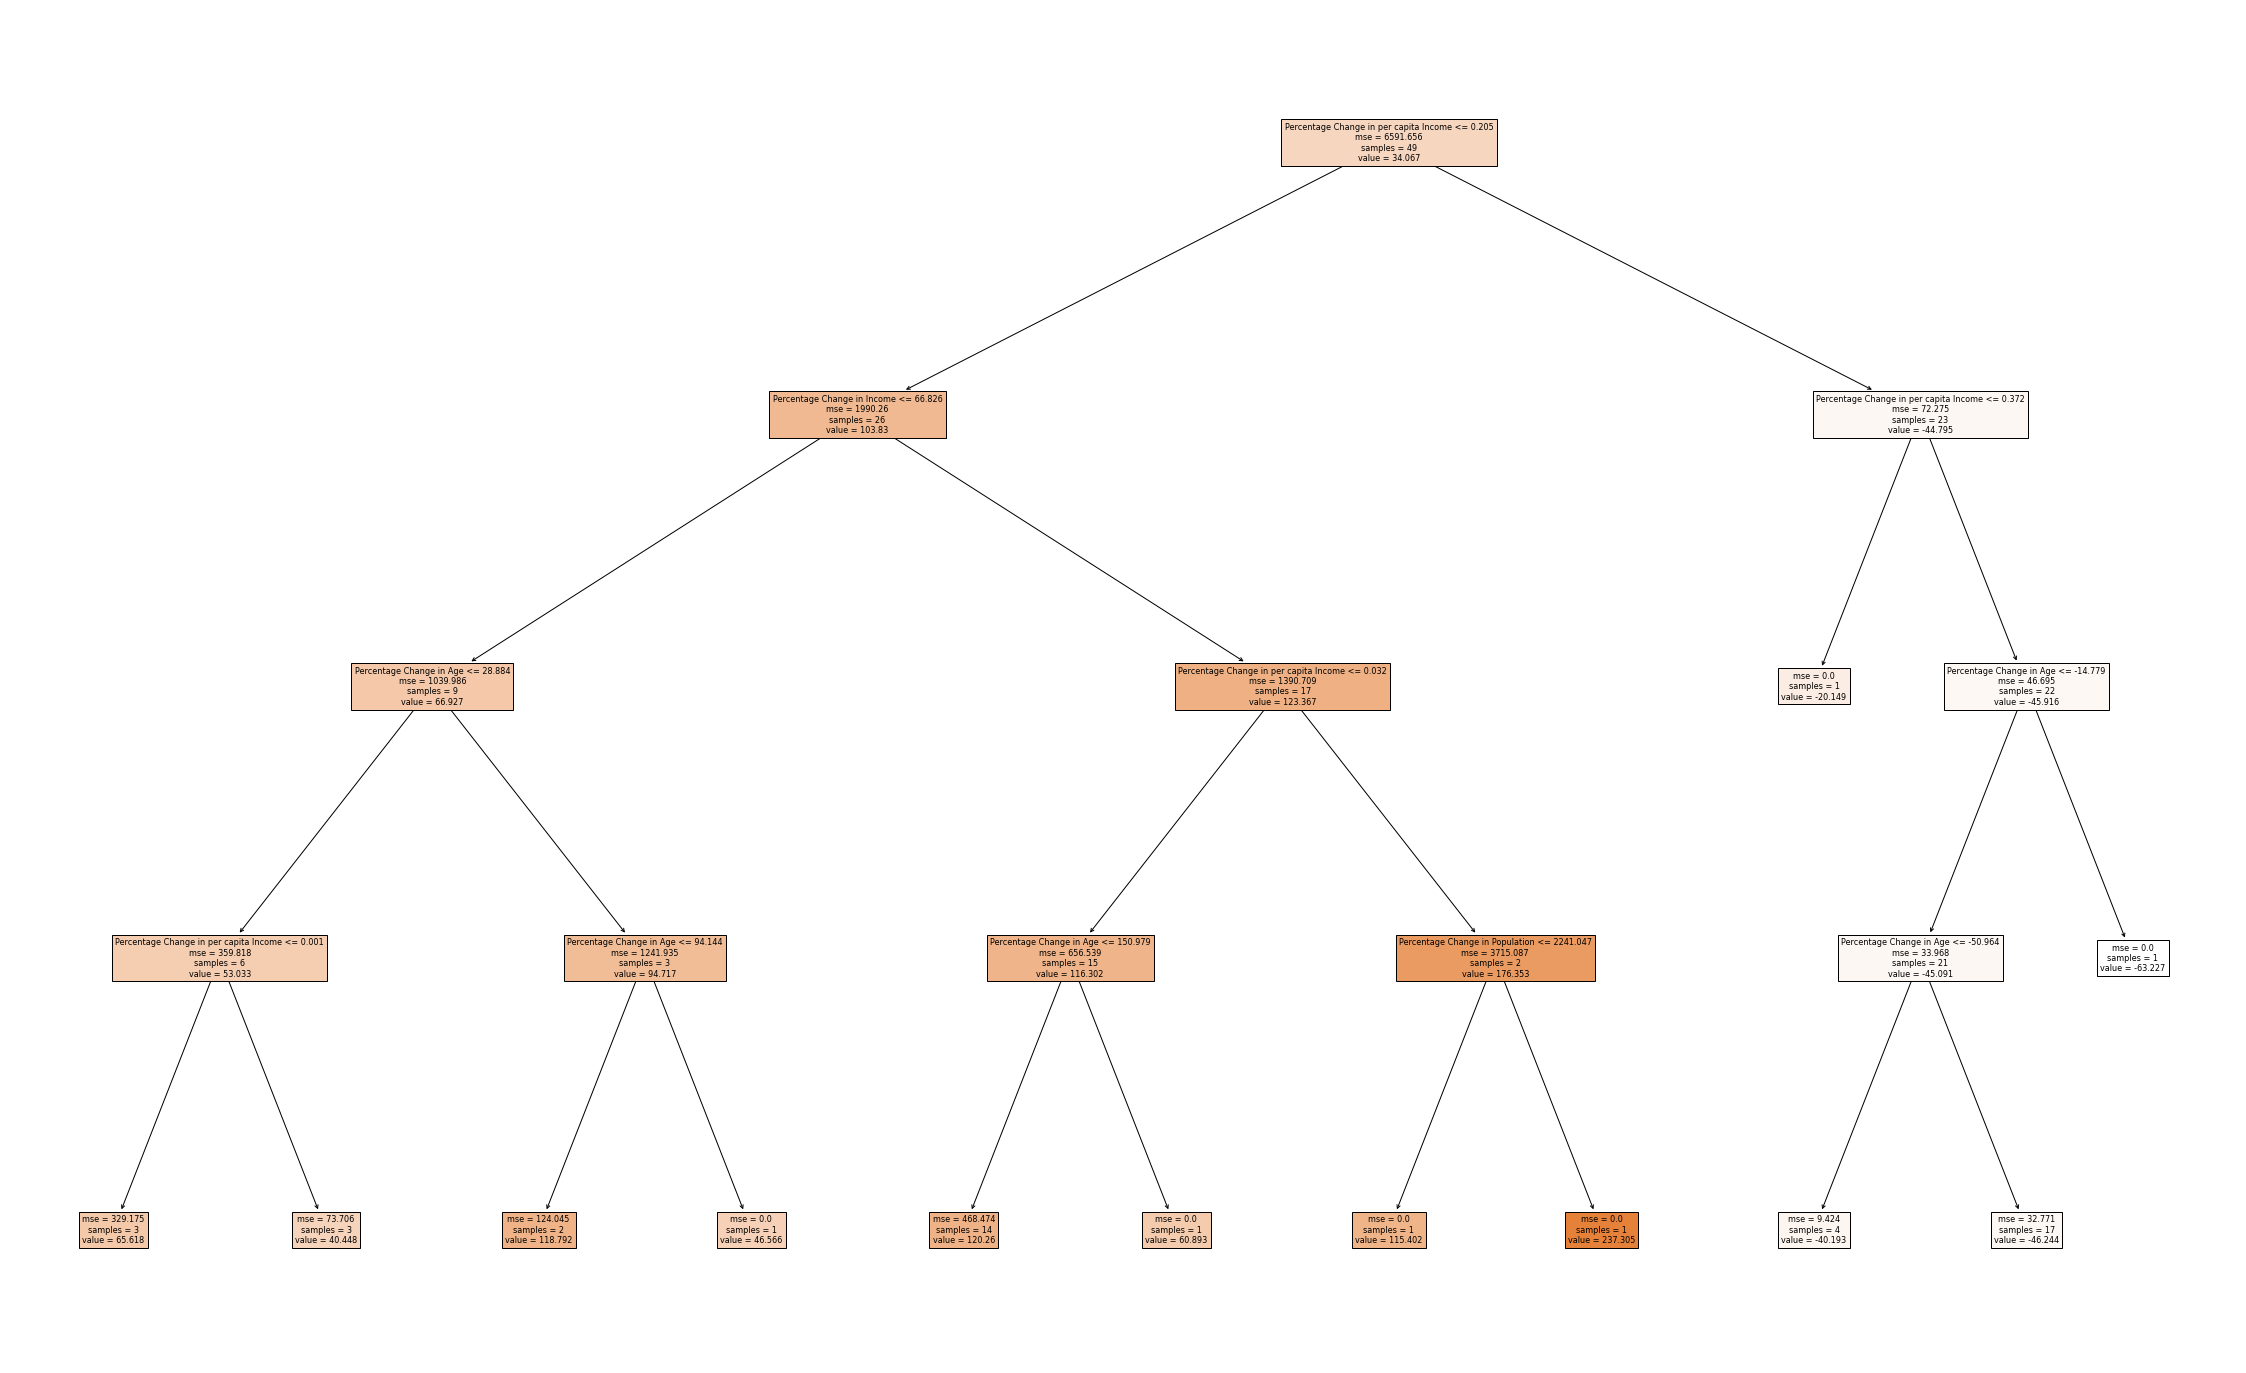

In [699]:
from sklearn import tree
from sklearn import metrics
sqft_tree = tree.DecisionTreeRegressor(max_depth=4).fit(X,y)

y_pred_tree = sqft_tree.predict(X)

print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

sqrf_fig = plt.figure(figsize=(40,25))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

Regression tree with a depth of 4 and a MSE value of around 175.71785. Our MSE would be lower if our tree was of depth 5 instead, however this would make the regression tree hard to read and understand hence we chose a max depth of 4. Since we have a large data in which the difference between the maximum and minimum values of over 660,000 we consider an MSE value of 175.71785263117596 to be low. Hence our regression tree is to be considered a relatively good fit. This model allows us to take into account multiple variables that affect house value rther than just one or two variables which is more realistic. We see a higher error and this could be due to the multiple variables taken into account and for random occurences that would affect housing prices. 

In [277]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

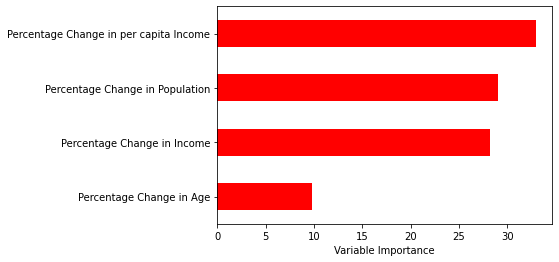

In [700]:
Importance = pd.DataFrame({'Importance':regr1.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Here we depicted the importance of each variable for our regression tree. As we can see the change in income per capita seems to be the most important factor for changes in median house value. Then comes change in population with change in income closely after with the importance for change in median house value. This is consistent with change in per capita being the most important variable since this variable is the ration between change in income and chnage in population. Finally change in age is the least important variable for this regression tree which is consistent with our previous argument that age is more of an intermediate determinat of chnages in house values since its more of a determinat in economic acitivity and growth which affects the housing market.

However, when comparing this model to the linear regression model for California, we see that the linear model has an $R^2$ value of 0.880 which is considered a very good fit model. And since the regression tree does not seem to be as such of a good fit as the linear model, we would consider the linear model a better estimate for median house value percenateg change from 1990 to 2010.

In [690]:
df_2_no_nan = df_1_2.dropna(subset=['Percentage Change in Age', 'Percentage Change in Income', 
                                  'Percentage Change in per capita Income', 'Percentage Change in House Value'])

X = df_2_no_nan.drop(['Counties', 'Percentage Change in House Value', 'Area type', 'Percentage Change in Population',
                      'const', 'Percentage Change in Population Density'], axis=1)  

y = df_2_no_nan["Percentage Change in House Value"]
display(X.head(4), y.head(4))

,Percentage Change in Age,Percentage Change in Income,Percentage Change in per capita Income
2,151.948244,70.493733,0.020957
3,47.313501,84.835341,0.004493
4,-66.936215,-48.766633,0.498769
7,-53.034178,-36.486230,0.384864


2     60.893083
3    151.651265
4    -43.554642
7    -39.346384
Name: Percentage Change in House Value, dtype: float64

We named our X and Y values in which it would give us the lowest MSE value. Our objective function for rural counties is

$$
{\% \Delta MedianHouseValue}_i = \beta_0 + \beta_1·{\% \Delta MedianAge}_i + \beta_2·{\% \Delta MedianIncome}_i + \beta_3·{\% \Delta IncomePerCapita}_i
$$
where
- $\beta_0 = $ is the intercept of the linear trend line on the y-axis  
- $\beta_1 = $ is the slope of the linear trend line, representing the marginal effect of median age in years
- $\beta_2 = $ is the slope of the linear trend line, representing the marginal effect of median income in USD
- $\beta_3 = $ is the slope of the linear trend line, representing the marginal effect of income per capita

We then named our X and Y variables that will provide the lowest MSE value for rural counties only. Hence the following regression tree is for only rural counties. By now we have discussed how the different parameter have an effect on median house value. We've seen that age is an intermediate factor in determing house value since it seems to be an important factor for economic growth, GDP and innovation which does affect house value since the housing market usually follows trends in the economy that affect real GDP. Income is has strong positive correlation to house value, which means any effect on house value will affect have a similar effect on income and visaversa, making income a kew determinat of house value. Lastly income per capita is also a key determinant since it asseses the ratio of income and population which has an effect since it affects supply of housig and quality of housing which then affects the value of a house. By changing or ignoring any of these parameters we will then have a higher MSE since we are not taking into account a variable that determines and changes the value of houses in certain areas. 

Notice how we did not include population as a variable. This is because we have seen that population does not affect that much house value since there has been a overall spike across california in population. Hence an county increasing its population by 150% or 152% does not make such a difference in the market However, this does not mean it does not have an effect. This is why we include it instead in income per capita as this measure the distribution of wealth instead and how changes in inequality affect each county.

In [691]:
print ('Max Value of X is',max(X['Percentage Change in Income']))
print ('Min Value of X is', min(X['Percentage Change in Income']))
diff = max(X['Percentage Change in Age']) - min(X['Percentage Change in Age'])
print ('Difference between min and max value is', diff)

Max Value of X is 102.58893041017355
Min Value of X is -48.766632991116936
Difference between min and max value is 240.69081646278588


Mean Squared Error: 134.7467833163186


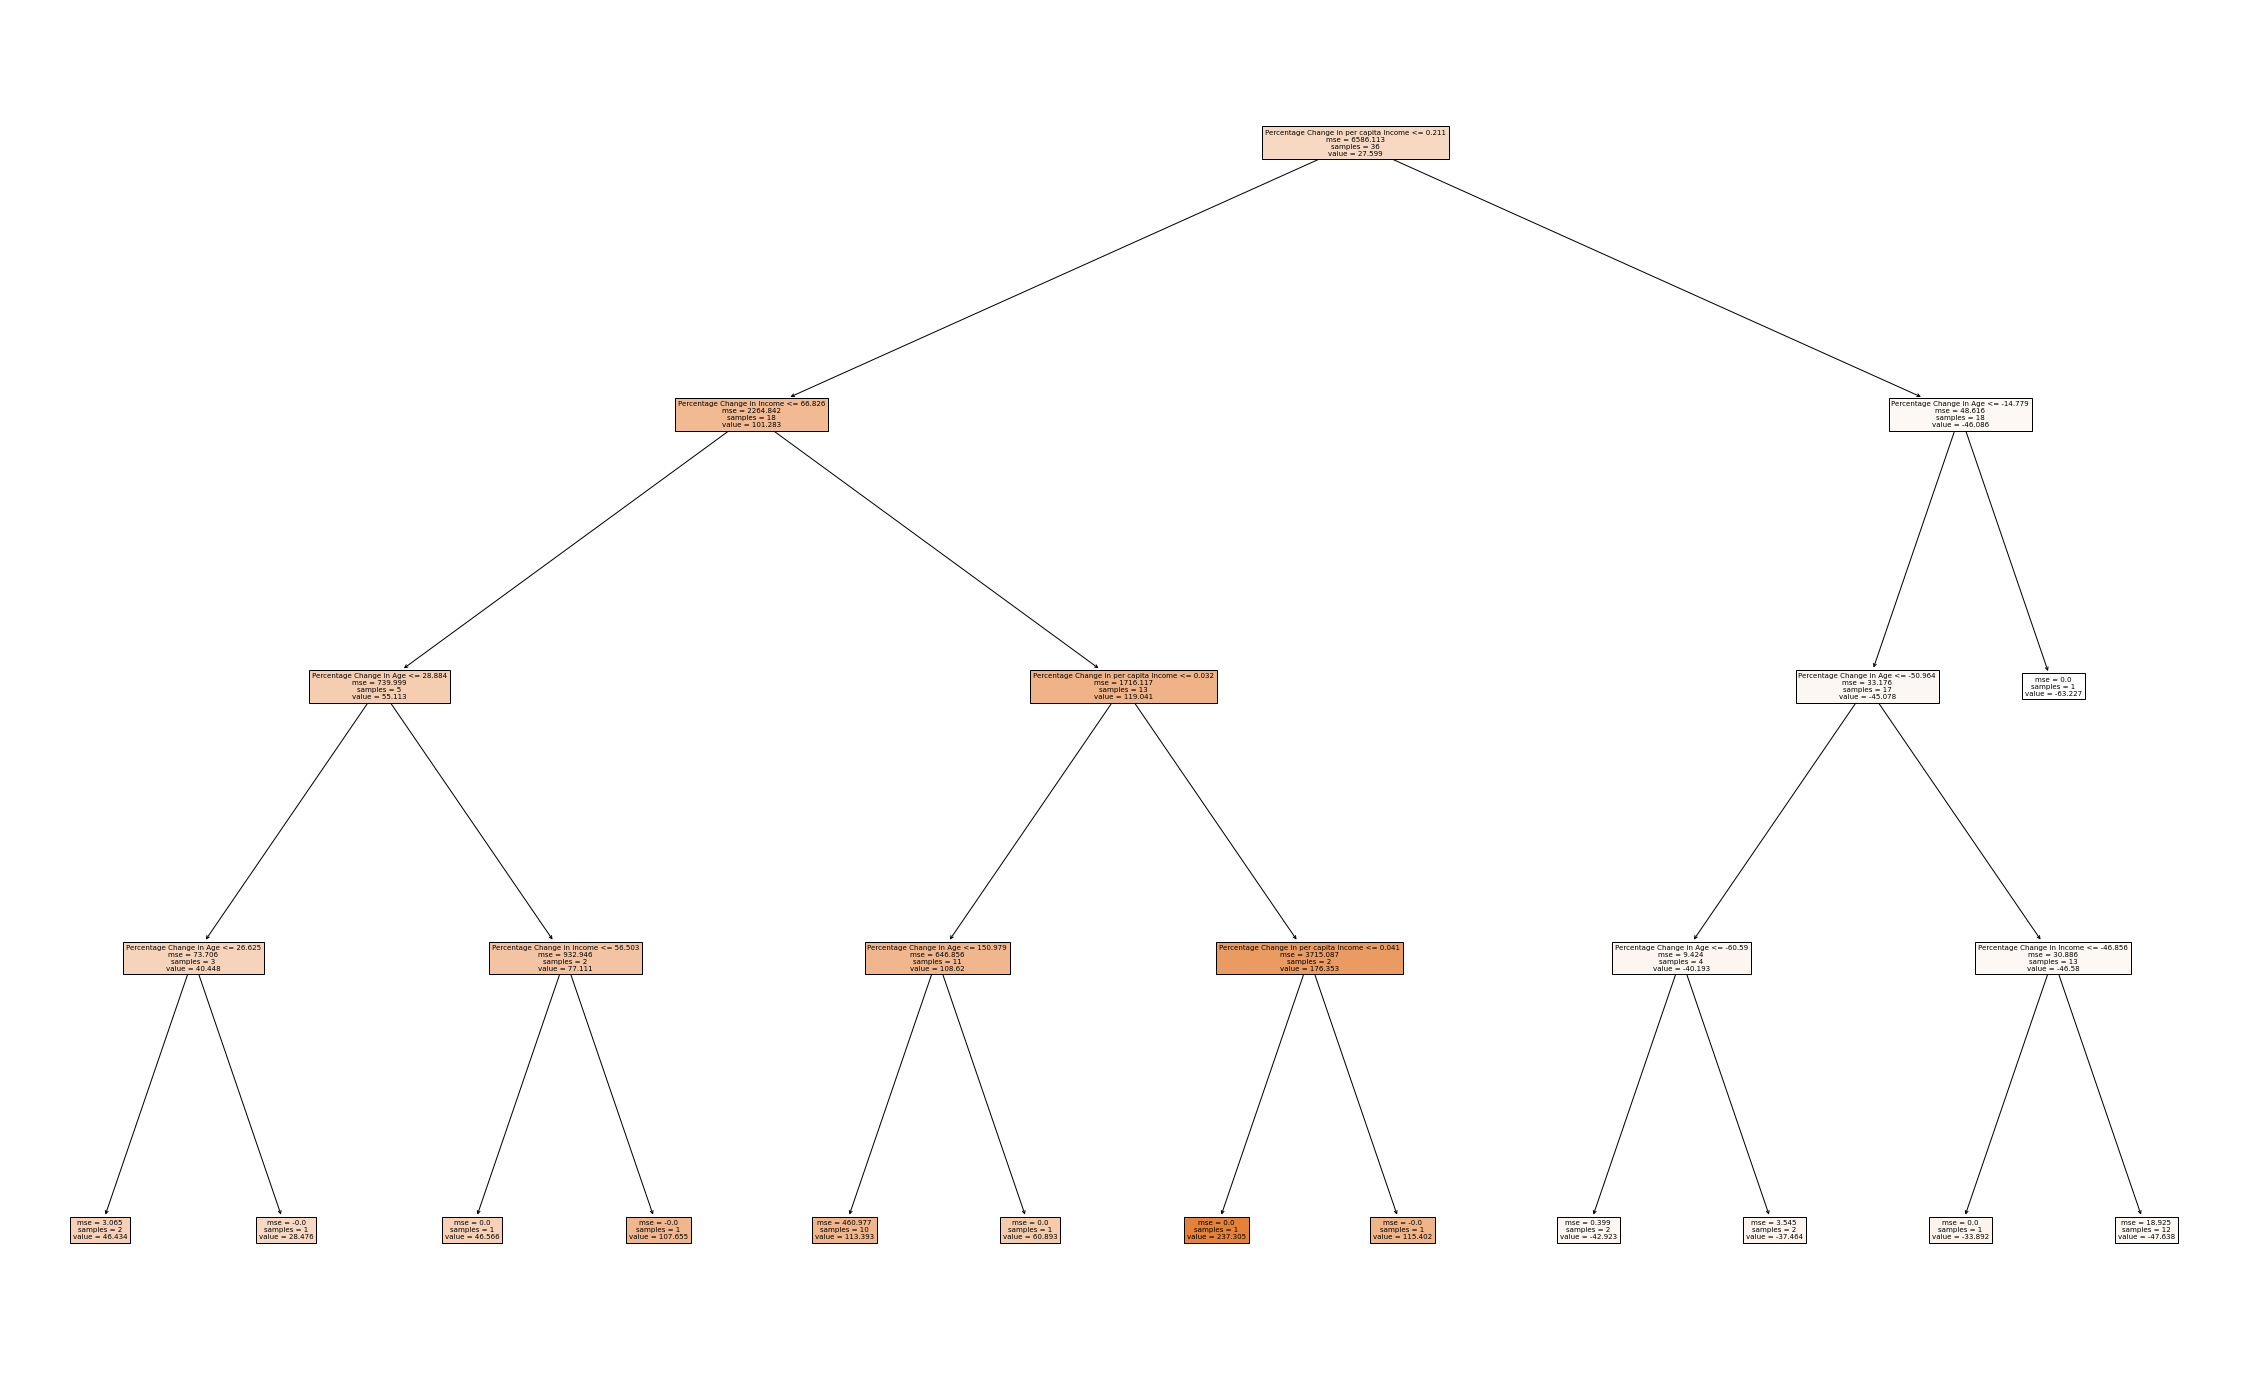

In [660]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=4).fit(X,y)
y_pred_tree = sqft_tree.predict(X)

print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))
sqrf_fig = plt.figure(figsize=(40,25))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

Regression tree with a depth of 4 and a MSE value of around 134.74678 which is lower than the regression tree from California in general. This is because we are comparing counties with similar condutions, and economic resources hence we can pick finner numbers to seperate the branches. Our MSE would be lower if our tree was of depth 5 instead, however this would make the regression tree hard to read and understand hence we chose a max depth of 4. The difference between the maximum and minimum values is around 222, hence we consider an MSE value of 134.7467833163186 to be high. Hence our regression tree is to be considered a relatively poor fit since we find the distance between predicted and observed values is considered to be very large. ALthough this model does take into account multiple variables that determine housing value, the MSE value is yet too large.

Since our linear regression model for rural counties had an $R^2$ value of 0.794, which is considered for a model to be a good fit and to have relatively accurate estimating values, and our regression tree is considered to be a bad fit since its MSE is considered too high implying its estimating values have too much of an error, we will use the linear regression model to predict rural counties. 

Also we should note that since we could quickly discard the regression tree since it was a bad fit model, we did not have to analyze the importance graph since it would be redundant to do so for a model that is already known for being a bad fit

In [693]:
df_3_no_nan = df_1_3.dropna(subset=['Percentage Change in Age', 'Percentage Change in Income',
                                  'Percentage Change in per capita Income', 'Percentage Change in House Value'])

X = df_3_no_nan.drop(['Counties', 'Percentage Change in House Value', 'Area type','Percentage Change in Population',
                      'const', 'Percentage Change in Population Density'], axis=1)  

y = df_3_no_nan["Percentage Change in House Value"]
display(X.head(4), y.head(4))

,Percentage Change in Age,Percentage Change in Income,Percentage Change in per capita Income
0,-1.884222,92.280376,0.000729
9,19.436611,54.527133,0.000727
18,2.018782,44.335032,0.000067
29,61.396322,51.992822,0.000248


0     137.943401
9      90.945426
18     49.398797
29    129.929850
Name: Percentage Change in House Value, dtype: float64

Similarly as donde previously, we then named our X and Y variables that will provide the lowest MSE value for urban counties only. Hence the following regression tree is for urban counties only.

By now we have discussed how the different parameter have an effect on median house value. We've seen that age is an intermediate factor in determing house value since it seems to be an important factor for economic growth, GDP and innovation which does affect house value since the housing market usually follows trends in the economy that affect real GDP. Income is has strong positive correlation to house value, which means any effect on house value will affect have a similar effect on income and visaversa, making income a kew determinat of house value. Lastly income per capita is also a key determinant since it asseses the ratio of income and population which has an effect since it affects supply of housig and quality of housing which then affects the value of a house. By changing or ignoring any of these parameters we will then have a higher MSE since we are not taking into account a variable that determines and changes the value of houses in certain areas. 

Notice how we did not include population as a variable. This is because we have seen that population does not affect that much house value since there has been a overall spike across california in population. Hence an county increasing its population by 150% or 152% does not make such a difference in the market However, this does not mean it does not have an effect. This is why we include it instead in income per capita as this measure the distribution of wealth instead and how changes in inequality affect each county.

In [697]:
print ('Max Value of X is',max(X['Percentage Change in Income']))
print ('Min Value of X is', min(X['Percentage Change in Income']))
diff = max(X['Percentage Change in Income']) - min(X['Percentage Change in Age'])
print ('Difference between min and max value is', diff)

Max Value of X is 100.34522511021532
Min Value of X is -40.98860266668368
Difference between min and max value is 143.4664712432043


We named our X and Y values in which it would give us the lowest MSE value. Our objective function for rural counties is

$$
{\% \Delta MedianHouseValue}_i = \beta_0 + \beta_1·{\% \Delta MedianAge}_i + \beta_2·{\% \Delta MedianIncome}_i + \beta_3·{\% \Delta IncomePerCapita}_i
$$
where
- $\beta_0 = $ is the intercept of the linear trend line on the y-axis  
- $\beta_1 = $ is the slope of the linear trend line, representing the marginal effect of median age in years
- $\beta_2 = $ is the slope of the linear trend line, representing the marginal effect of median income in USD
- $\beta_3 = $ is the slope of the linear trend line, representing the marginal effect of income per capita
- $\beta_4 = $ is the slope of the linear trend line, representing the marginal effect of population

Mean Squared Error: 2.731818222277982


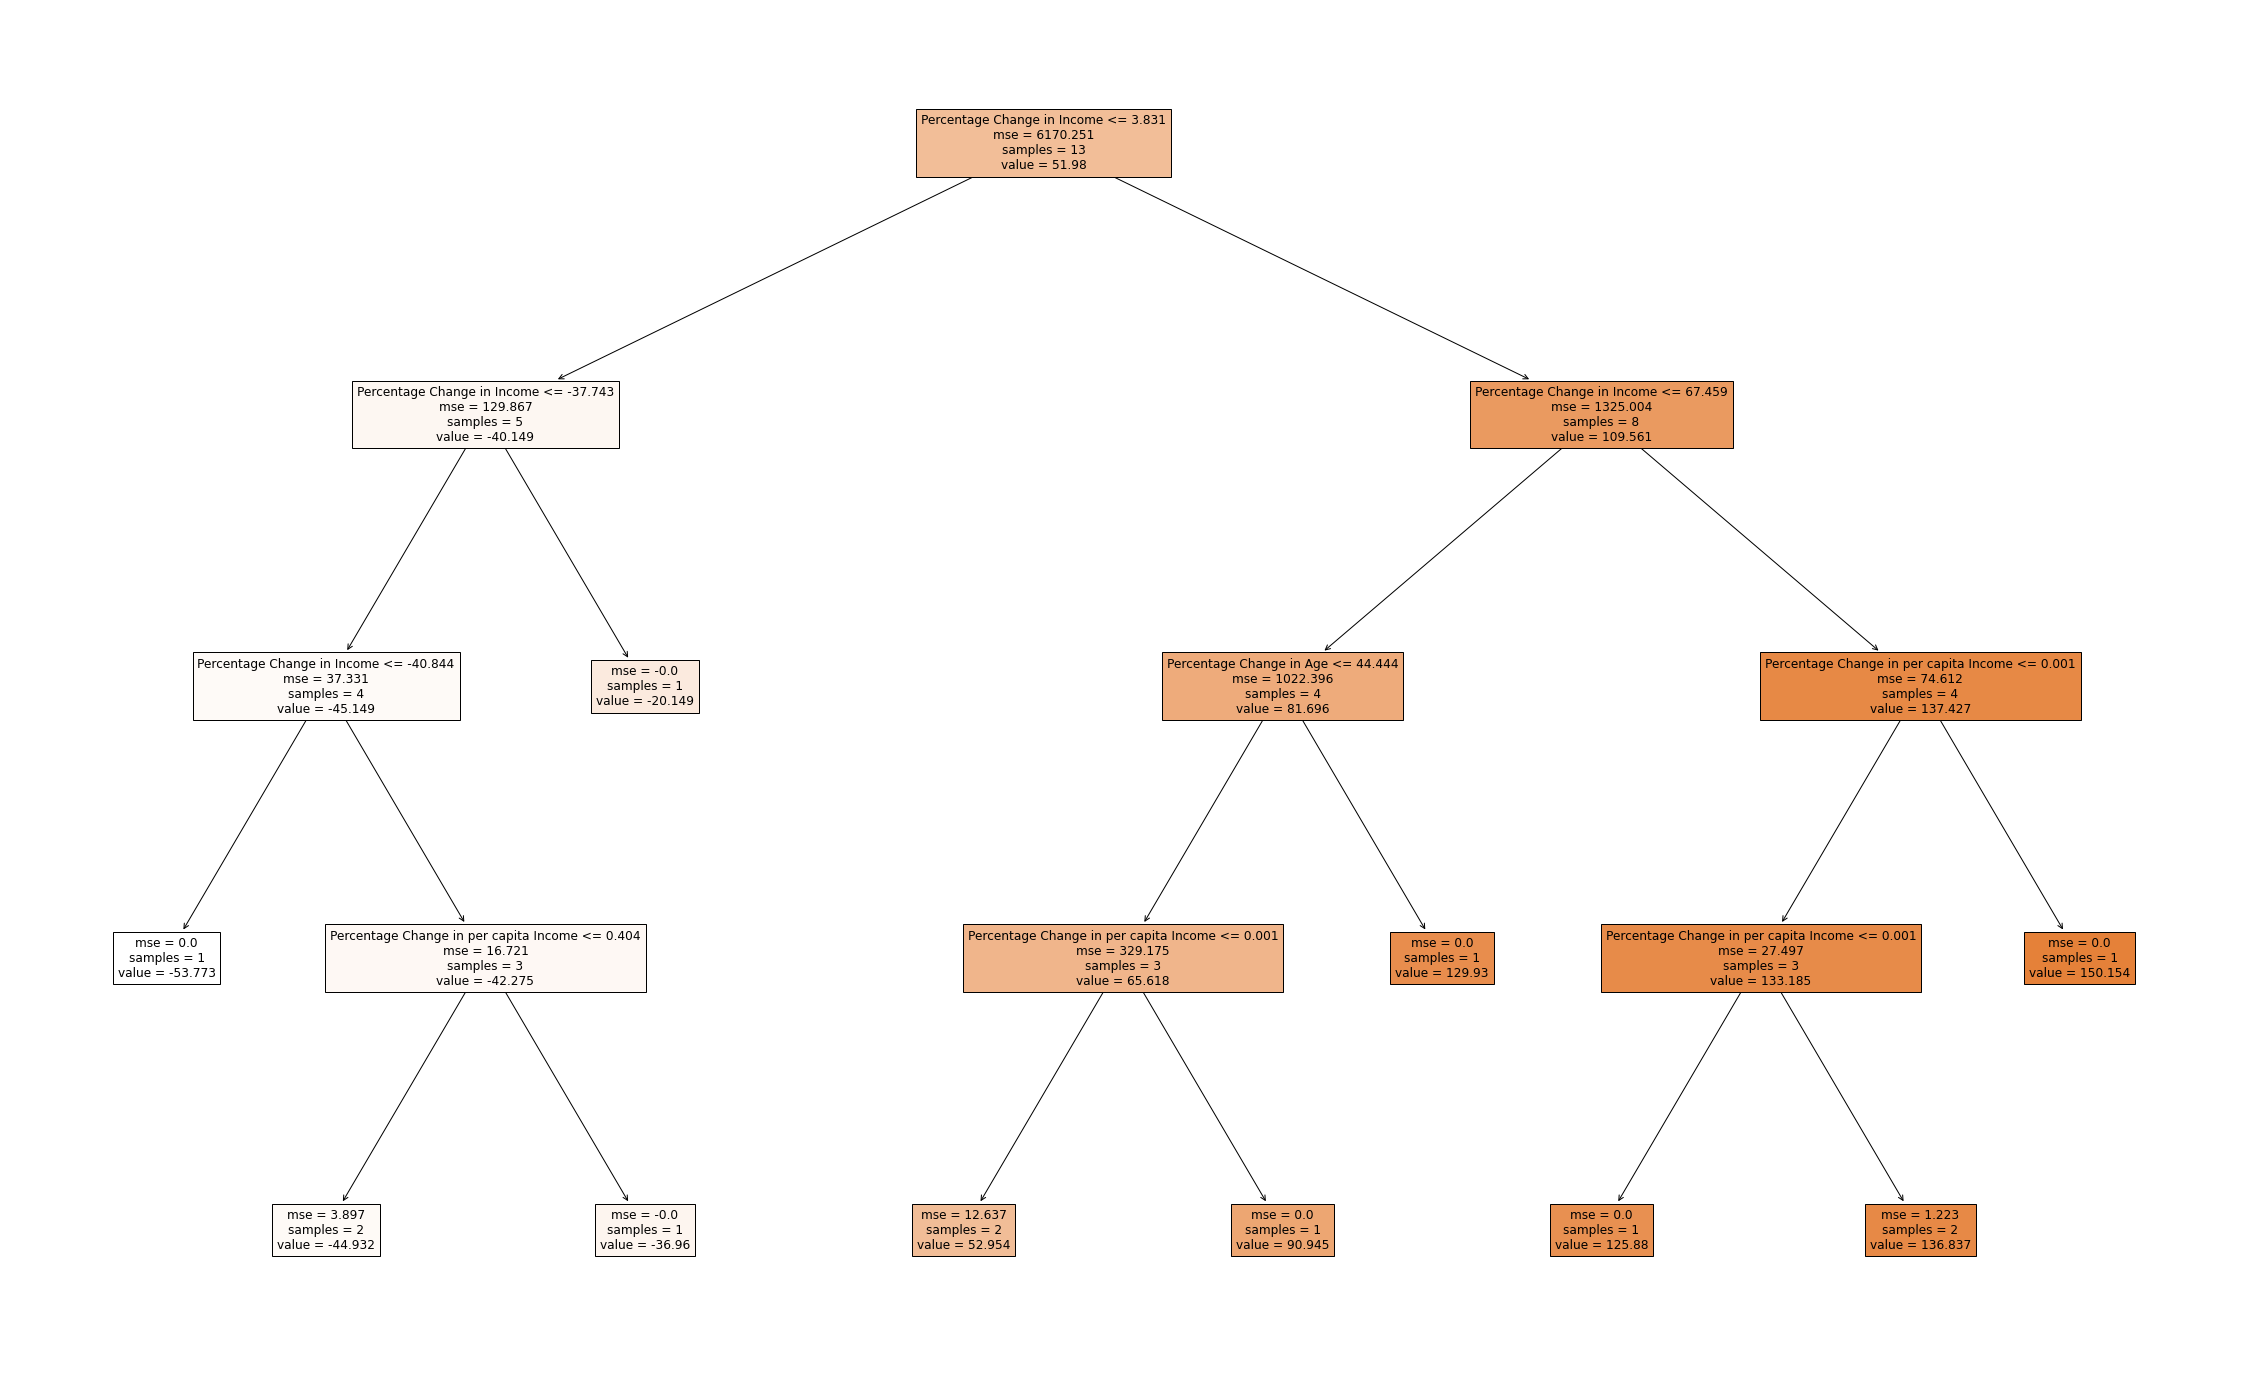

In [668]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=4).fit(X,y)
y_pred_tree = sqft_tree.predict(X)

print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))
sqrf_fig = plt.figure(figsize=(40,25))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

We see that when take into account chnage in age, income and per capita income we see that we can construct a regression tree with a MSE value of 2.731818222277982. Since our MSE value is close to 0, especially when considering a data has a range of over 143, we consider the regression tree to be extremly well fitted, meaning that using this regression tree, we would be able to predict percentage change in median house with exceptionally precision give the value of percentage change in age, income and per capita income.

Therefore, we can state that the regression tree would be a more accurate regression model in for changes in median house value in urban counties in California from 1990-2010.

Below we can see the importance of each variable. As we can see, change in income is the most determing factor for changes in house value. Then comes per capita income and lastly age is the least important variable in our regression tree model when determing chnage in house value.

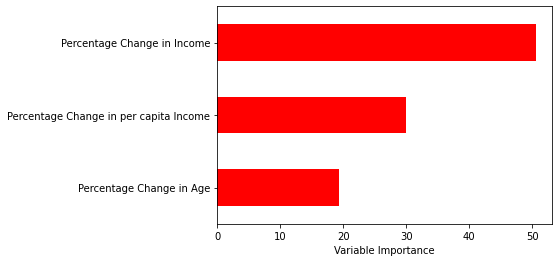

In [469]:
Importance = pd.DataFrame({'Importance':regr3.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

When interpreting the order of importance of each variable for our regression tree, we found that change in income is the most determining factor for changes in house value. Then comes per capita income and lastly, age is the least important variable in our regression tree model when determining the change in house value. Although our regression tree still considers per capita income to be important, we found that compared to our linear regression model for urban counties, our regression tree considers income by itself a more determining factor than per capita income for changes in house values. That being said, since we will use the regression tree since it has higher precision, we now consider income to be a more determining factor for changes in house value in urban counties instead of per capita income as stated in the linear regression model.  We find that age being the lowest variable of importance is consistent with our previous argument that age is more of an intermediate determinant of changes in house values since has a stronger effect on economic activity and growth which has a ripple effect on the housing market.

<b> Predicting future values using regression tree <b>

Mean squared error for our prediction is 148.54098497613495


Text(0.5, 1.0, 'Prediction on %Δ in Median house prices  \n across all counties in California from 2010 to 2030')

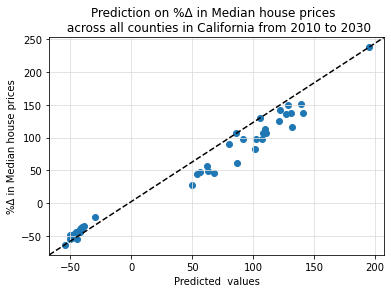

In [710]:
df_1_1 = perc_change
df_1_2 = rural_counties_change


for col in list(X):
    X[col] = X[col].astype(float)

regr1 = RandomForestRegressor(max_features=4, random_state=1)
regr1.fit(X, y)
pred = regr1.predict(X)
print("Mean squared error for our prediction is", mean_squared_error(y, pred))

plt.scatter(pred, y)
plt.grid(color='gainsboro')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Predicted  values')
plt.ylabel('%\u0394 in Median house prices')
plt.title('Prediction on %\u0394 in Median house prices  \n across all counties in California from 2010 to 2030')

We can see that the regression tree overestimates almost all changes in california. We see that the linear regression model is better fitted as discussed before hence we will use the linear regression model to predict future values

Mean squared error for our prediction is 168.7680971678223


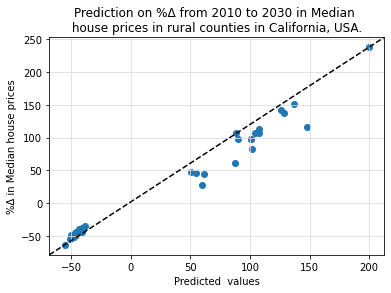

In [411]:
regr2 = RandomForestRegressor(max_features= 3, random_state=1) 
regr2.fit(X, y)
pred2 = regr2.predict(X)
plt.scatter(pred2, y, label='log price')
plt.grid(color='gainsboro')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Predicted  values')
plt.ylabel('%\u0394 in Median house prices')
plt.title('Prediction on %\u0394 from 2010 to 2030 in Median \n house prices in rural counties in California, USA. ')

print("Mean squared error for our prediction is", mean_squared_error(y, pred2))

As found before, we consider the regression tree to be not a good fit for our data, hence this prediciton would not be correct and has a significant Mean squared error value hence the preiditiions are not accurate. We will use the linear regression to predict values

Mean squared error for our prediction is 210.9236506162529


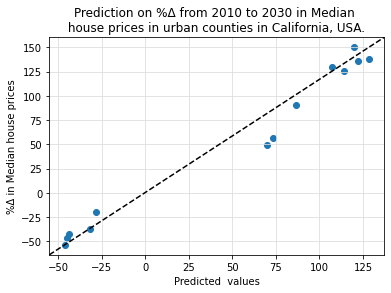

In [468]:
regr3 = RandomForestRegressor(max_features= 3, random_state=1) 
regr3.fit(X, y)
pred3 = regr3.predict(X)
plt.scatter(pred3, y, label='log price')
plt.grid(color='gainsboro')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Predicted  values')
plt.ylabel('%\u0394 in Median house prices')
plt.title('Prediction on %\u0394 from 2010 to 2030 in Median \n house prices in urban counties in California, USA. ')

print("Mean squared error for our prediction is", mean_squared_error(y, pred3))

We can see that most urban counties would experience large increases in median house value but we see that around five urban counties would experience a negative change in house value which would result in a decrease in overall wealth and growth in the economy of these counties. Since government resources in implementing policies are limited and can only stimulate a certain amount of counties in promoting urbanization and economic growth, the government will decide not to have policies focused on all urban counties. The choice of whether to stimulate certain urban counties or certain suburbs comes down to the opportunity cost, the economic cost, and the economic profit. The government's overall goal is to increase economic growth within the state at the lowest cost, hence by promoting urbanization through policies they will implement policies that will benefit counties that will provide the largest economic profit. Therefore the government will look into counties that minimize economic profit the most and simultaneously maximize revenue. The urban counties that did not benefit from the policies in the past will likely not benefit from them in the future if the policies persist since it is likely that although these counties do provide a large amount of revenue as urban are tend to, it likely comes at a high economic cost which reduces the effect of the large revenue. Then if the government sees that some rural areas which tended to be suburban areas to large urban counties did not provide such large amounts of revenue as urban counties, they would run at a low economic cost which would make their economic profit relatively high. Hence the government would choose to stimulate the rural county over the urban county as long as the rural county had a larger economic profit, hence the stimulation would result in a higher increase in economic growth per dollar spent by the government. 

<u> How all the projects link together <u>

The first project was used mostly to understand the data given to us. Analyze any trends and correlation between the variables given to us. We were able to depict how house value varies depending on the condition of where it is located. We were able to make a statistical summary and hilight key points, trends or observations from the data.
It also allowed us to group the data since the dataset had too many points and from there see the ranges of prices throughout Californi in the 1990. We also identified the amount of outliers in our data for each variable.

From the second project, we first tried to eliminate the outliers to find a more statistical significant values. However we found that there was only one row in our data that was had no outliers in any of our variables hence we discarded that idea. Then we were able to visualize and map our data and were able to mark any geographical trends in our data. We saw that a lot of the economic activities was concentrated in certain areas which made me realize there is a trend there that could be investigated. In my case, after the visualization I was able to construct the message and start formulating the research question that our paper was going to answer. 

The third project allowed firstly to group all the data into counties and obtain the averages for each variable and have a better understandment of the geographical trends established in project 2. We then were able to identify urban and rural counties and compare how different they were. We then followed this by web scrapping data of the same variables in california but now in 2010 so we could asses the changes in Calufornia from 1990 to 2010 and come up with an economic reasoning for such events to happen. To have a better understanment of the changes, we calculated the percentage change between 1990 to 2010 foo each variable for all counties in California. This allowed us to understand the urbanization policy effects and how urban counties tended to have a much economi growth and better standard of living than rural counties experienced during this time.

FInally this project allowed for a more intuitive of our previous projects. We were able to create regression models that allowed us to use to have the best possible estimation for the data given to us. We found that urban counties had a predisposition of experincing higher economic growth through the housing market than rural counties. We also found a new factor to take into account that was per capita income which changed the role and how we were analyzing population. Through this we were able to understand that urban counties have a more stable economy and housing market and it is likely due to the policies helping them. We realized that not all urban counties benefited from the policies and a lot of rural counties started urbanizing. This showed the effectiveness of urbanization policies and how the government implements them to benefit the counties that have the highest economic profit. We then predicted future values and how the economy will develop if urbanization and policy trends keep going constant.

<u> Conclusion <u>

Throughout our research and analysis, we were able to answer the question of how economic growth and urbanization affected housing prices in California? We know that urbanization only benefits the areas that are being urbanized at the cost of other areas being worsened off as their resources and economic power deplete to stem higher economic growth in urbanized areas. We found that one of the main sources where the government tried to increase economic growth was through the housing market and implemented policies to promote a growing housing market in the urbanized counties. They also created diverse and effective incentives to attract individuals, especially high-skilled workers to move to urbanized counties and further promote economic growth. As a result, urban counties have a housing market that is more stable, and reliable and is predisposed to having more growth than rural counties.

Our research results showed that there is a strong positive correlation between income and house value because migration tended to be within the state as we saw that counties' housing market was mostly determined by per capita income, whereas California's housing market was mostly determined by median income which indicated the government policies and incentives were being effective. We also investigated the effects of median age in the housing market and determined that age was an intermediate factor for the housing market since it did not directly affect house value but the rather affected population as well as economic growth which then later affected house value. However, we determined that the area type is not the determinant of how the government implements its policy, but rather on the economic benefit as the government will prioritize the counties with the highest economic profits since it will provide the fastest urbanization development as well as economic growth. 
Our findings showed limitations on the real value and condition of all counties and the time error that occurred due to the length the data collection took would limit the precision of our findings. We also did not take into consideration economic factors that could have affected the housing market such as inflation, the financial market crash, the 9/11 event and other major events that influenced the political and economic side of the housing market. These should be factors to considered and could be used for future improvements.

The results from our findings show that California experienced different effects due to urbanization policies, although the results are along the same vein. This is expected since China and the U.S. have vastly different economies, the housing market, and ways of implementing policies as well as the two governments were not seeking identical effects on their markets. Using the results and finding from this paper alongside the findings in the “Chinese urbanization and urban housing growth since the mid-1990s”4 research, we can make an educated guess on the effects of urbanization on any economy. It also provides us an insight into the difference between the Chinese and U.S. economies and the housing market. These results are also an extension of the research done on the effects of inclusionary zoning6 as we investigate further government policies on the housing market, how these shocks in the housing market affect the economy, and why the government might opt to strive for urbanization and a growing housing market. 

This research is yet broad and could be used as a foundation for future investigations. We solely considered variables that are the most determining for house value, but future research could dive into a further investigation on what are all the variables that determine house value and implement them. Another prosperous research is the implementation of urbanization policies and how effective they are and the period between they were implemented to when they have a significant effect on the economy and then compare it to a shorter span in time and see how California is affected. A different approach would be investigated under the same timeframe and with similar government policy objectives but to another state or country and then on compare how it compares to California. 
